In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [6]:
HH_MOD_A = pd.read_csv("hh_mod_a_filt.csv",keep_default_na=False, na_values=[""])

In [7]:
HH_MOD_A.head()

,case_id,HHID,ea_id,region,district,reside,interviewDate,hh_wgt,hh_a02a,hh_a03,...,hh_a11,hh_a13,hh_a22,hh_a23,hh_g09,hh_m00,hh_o0a,hh_s01,hh_w01,hhsize
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,10101100,North,Chitipa,RURAL,2019-08-29,93.7194,10101,100,...,NO,NaN,14,58,NO,Yes,YES,YES,NO,4
1,101011000023,7144cc6d29b3485d9e6d6188b255c756,10101100,North,Chitipa,RURAL,2019-08-29,93.7194,10101,100,...,NO,NaN,14,64,YES,Yes,YES,YES,NO,4
2,101011000040,9936d103bf974a93afbc63d477b8b3f2,10101100,North,Chitipa,RURAL,2019-08-28,93.7194,10101,100,...,NO,NaN,14,30,NO,Yes,NO,NO,NO,4
3,101011000071,cc8f211413cd493e83e01a96aba95bbb,10101100,North,Chitipa,RURAL,2019-08-29,93.7194,10101,100,...,NO,NaN,14,30,NO,Yes,YES,YES,NO,5
4,101011000095,e50cfa8d11b44d56891e0fad015b07c7,10101100,North,Chitipa,RURAL,2019-08-28,93.7194,10101,100,...,NO,NaN,14,58,NO,Yes,NO,YES,NO,5


In [8]:
HH_MOD_A.describe(include='all')

,case_id,HHID,ea_id,region,district,reside,interviewDate,hh_wgt,hh_a02a,hh_a03,...,hh_a11,hh_a13,hh_a22,hh_a23,hh_g09,hh_m00,hh_o0a,hh_s01,hh_w01,hhsize
count,1.143400e+04,11434,1.143400e+04,11434,11434,11434,11434,11434.000000,11434.000000,11434.000000,...,11432,583,11434.000000,11434.000000,11431,11434,11434,11434,11434,11434.000000
unique,NaN,11434,NaN,3,32,2,346,NaN,NaN,NaN,...,2,7,NaN,NaN,2,2,2,2,2,NaN
top,NaN,7d78f2c5da59436d9bde9b09ea8a8aaf,NaN,Southern,Lilongwe,RURAL,2019-12-03,NaN,NaN,NaN,...,NO,Dwelling found but no household member could b...,NaN,NaN,NO,Yes,NO,NO,NO,NaN
freq,NaN,1,NaN,5306,574,9342,85,NaN,NaN,NaN,...,10849,455,NaN,NaN,7549,10906,6872,8129,10759,NaN
mean,2.338458e+11,NaN,2.338458e+07,NaN,NaN,NaN,NaN,360.565171,23384.120605,458.435980,...,NaN,NaN,10.109760,49.424174,NaN,NaN,NaN,NaN,NaN,4.414553
std,7.782024e+10,NaN,7.782024e+06,NaN,NaN,NaN,NaN,226.425994,7781.831067,206.940908,...,NaN,NaN,4.943548,26.517178,NaN,NaN,NaN,NaN,NaN,2.090681
min,1.010110e+11,NaN,1.010110e+07,NaN,NaN,NaN,NaN,22.499932,10101.000000,100.000000,...,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2.020628e+11,NaN,2.020628e+07,NaN,NaN,NaN,NaN,180.170802,20206.000000,279.000000,...,NaN,NaN,6.000000,29.000000,NaN,NaN,NaN,NaN,NaN,3.000000
50%,2.105446e+11,NaN,2.105446e+07,NaN,NaN,NaN,NaN,323.803340,21054.000000,459.000000,...,NaN,NaN,10.000000,50.000000,NaN,NaN,NaN,NaN,NaN,4.000000
75%,3.071264e+11,NaN,3.071264e+07,NaN,NaN,NaN,NaN,476.366294,30712.000000,638.000000,...,NaN,NaN,14.000000,70.000000,NaN,NaN,NaN,NaN,NaN,6.000000


In [9]:
A = HH_MOD_A.drop(['ea_id'],axis=1) 

In [10]:
A.head()

,case_id,HHID,region,district,reside,interviewDate,hh_wgt,hh_a02a,hh_a03,hh_a06,hh_a11,hh_a13,hh_a22,hh_a23,hh_g09,hh_m00,hh_o0a,hh_s01,hh_w01,hhsize
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,2019-08-29,93.7194,10101,100,14,NO,NaN,14,58,NO,Yes,YES,YES,NO,4
1,101011000023,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,2019-08-29,93.7194,10101,100,23,NO,NaN,14,64,YES,Yes,YES,YES,NO,4
2,101011000040,9936d103bf974a93afbc63d477b8b3f2,North,Chitipa,RURAL,2019-08-28,93.7194,10101,100,40,NO,NaN,14,30,NO,Yes,NO,NO,NO,4
3,101011000071,cc8f211413cd493e83e01a96aba95bbb,North,Chitipa,RURAL,2019-08-29,93.7194,10101,100,71,NO,NaN,14,30,NO,Yes,YES,YES,NO,5
4,101011000095,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,2019-08-28,93.7194,10101,100,95,NO,NaN,14,58,NO,Yes,NO,YES,NO,5


In [11]:
A = A.drop(['interviewDate', 'hh_wgt'],axis=1)

In [12]:
A.head()

,case_id,HHID,region,district,reside,hh_a02a,hh_a03,hh_a06,hh_a11,hh_a13,hh_a22,hh_a23,hh_g09,hh_m00,hh_o0a,hh_s01,hh_w01,hhsize
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,10101,100,14,NO,NaN,14,58,NO,Yes,YES,YES,NO,4
1,101011000023,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,10101,100,23,NO,NaN,14,64,YES,Yes,YES,YES,NO,4
2,101011000040,9936d103bf974a93afbc63d477b8b3f2,North,Chitipa,RURAL,10101,100,40,NO,NaN,14,30,NO,Yes,NO,NO,NO,4
3,101011000071,cc8f211413cd493e83e01a96aba95bbb,North,Chitipa,RURAL,10101,100,71,NO,NaN,14,30,NO,Yes,YES,YES,NO,5
4,101011000095,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,10101,100,95,NO,NaN,14,58,NO,Yes,NO,YES,NO,5


In [13]:
A = A.drop(['hh_a02a', 'hh_a03', 'hh_a06', 'hh_a11', 'hh_a13', 'hh_a22', 'hh_a23', 'hh_g09', 'hh_m00', 'hh_o0a'],axis=1)

In [14]:
print(A.columns)

Index(['case_id', 'HHID', 'region', 'district', 'reside', 'hh_s01', 'hh_w01',
       'hhsize'],
      dtype='object')


In [15]:
A = A.rename(columns={"hh_s01" : "credit", "hh_w01" : "death_rate"})
A

,case_id,HHID,region,district,reside,credit,death_rate,hhsize
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4
1,101011000023,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4
2,101011000040,9936d103bf974a93afbc63d477b8b3f2,North,Chitipa,RURAL,NO,NO,4
3,101011000071,cc8f211413cd493e83e01a96aba95bbb,North,Chitipa,RURAL,YES,NO,5
4,101011000095,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5
...,...,...,...,...,...,...,...,...
11429,315538160177,217455196b2e46a0996ca61da955e243,Southern,Blantyre City,URBAN,NO,NO,3
11430,315538160189,23707c4144fb489ab5482403274f396f,Southern,Blantyre City,URBAN,YES,NO,3
11431,315538160190,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1
11432,315538160235,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3


In [16]:
A1 = A.drop(['case_id'],axis=1)

In [17]:
A1

,HHID,region,district,reside,credit,death_rate,hhsize
0,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4
1,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4
2,9936d103bf974a93afbc63d477b8b3f2,North,Chitipa,RURAL,NO,NO,4
3,cc8f211413cd493e83e01a96aba95bbb,North,Chitipa,RURAL,YES,NO,5
4,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5
...,...,...,...,...,...,...,...
11429,217455196b2e46a0996ca61da955e243,Southern,Blantyre City,URBAN,NO,NO,3
11430,23707c4144fb489ab5482403274f396f,Southern,Blantyre City,URBAN,YES,NO,3
11431,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1
11432,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3


In [18]:
data = A1

In [19]:
data.isnull().sum()

HHID          0
region        0
district      0
reside        0
credit        0
death_rate    0
hhsize        0
dtype: int64

In [20]:
data_no_mv = data.dropna(axis=0)

In [21]:
data_no_mv.describe(include='all')

,HHID,region,district,reside,credit,death_rate,hhsize
count,11434,11434,11434,11434,11434,11434,11434.000000
unique,11434,3,32,2,2,2,NaN
top,7d78f2c5da59436d9bde9b09ea8a8aaf,Southern,Lilongwe,RURAL,NO,NO,NaN
freq,1,5306,574,9342,8129,10759,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.414553
std,NaN,NaN,NaN,NaN,NaN,NaN,2.090681
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


In [22]:
data_A_cleaned = data_no_mv

In [23]:
data_A_cleaned.shape

(11434, 7)

In [24]:
data_A_cleaned.head()

,HHID,region,district,reside,credit,death_rate,hhsize
0,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4
1,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4
2,9936d103bf974a93afbc63d477b8b3f2,North,Chitipa,RURAL,NO,NO,4
3,cc8f211413cd493e83e01a96aba95bbb,North,Chitipa,RURAL,YES,NO,5
4,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5


In [25]:
HH_MOD_B = pd.read_csv("HH_MOD_B.csv",keep_default_na=False, na_values=[""])

C:\Users\AKCHINEX4\AppData\Local\Temp\ipykernel_2216\4286669372.py:1: DtypeWarning: Columns (17,25,35,37,40,50) have mixed types. Specify dtype option on import or set low_memory=False.
  HH_MOD_B = pd.read_csv("HH_MOD_B.csv",keep_default_na=False, na_values=[""])


In [26]:
HH_MOD_B.head()

,case_id,HHID,PID,hh_b03,hh_b04,hh_b04a,hh_b05_2,hh_b05_2_1,hh_b05a,hh_b05b,...,hh_b26a,hh_b26a_1,hh_b26b,hh_b26b_1,hh_b26b_2,hh_b26c,hh_b26c_1,hh_b26c_2,hh_b27,hh_b28
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,1,MALE,HEAD,NO,NaN,NaN,41,NaN,...,2.0,2006.0,NaN,NaN,NO,NaN,NaN,NaN,YES,1.0
1,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,2,FEMALE,WIFE/HUSBAND,YES,NaN,NaN,34,NaN,...,1.0,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,3,MALE,CHILD/ADOPTED CHILD,NO,NO,NaN,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,4,MALE,CHILD/ADOPTED CHILD,NaN,YES,YES,4,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101011000023,7144cc6d29b3485d9e6d6188b255c756,1,FEMALE,HEAD,NO,NaN,NaN,55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
HH_MOD_B.shape

(50476, 53)

In [28]:
B = HH_MOD_B.rename(columns={"hh_b03" : "HH_head", "hh_b24" : "Marital_status"})

In [29]:
B

,case_id,HHID,PID,HH_head,hh_b04,hh_b04a,hh_b05_2,hh_b05_2_1,hh_b05a,hh_b05b,...,hh_b26a,hh_b26a_1,hh_b26b,hh_b26b_1,hh_b26b_2,hh_b26c,hh_b26c_1,hh_b26c_2,hh_b27,hh_b28
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,1,MALE,HEAD,NO,NaN,NaN,41,NaN,...,2.0,2006.0,NaN,NaN,NO,NaN,NaN,NaN,YES,1.0
1,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,2,FEMALE,WIFE/HUSBAND,YES,NaN,NaN,34,NaN,...,1.0,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,3,MALE,CHILD/ADOPTED CHILD,NO,NO,NaN,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,4,MALE,CHILD/ADOPTED CHILD,NaN,YES,YES,4,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101011000023,7144cc6d29b3485d9e6d6188b255c756,1,FEMALE,HEAD,NO,NaN,NaN,55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50471,315538160190,01d649e11c664fe580315f47328f99f8,1,MALE,HEAD,YES,NaN,NaN,46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50472,315538160235,80b809e8c90b49e88996ae340a532820,1,MALE,HEAD,YES,NaN,NaN,28,NaN,...,2.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50473,315538160235,80b809e8c90b49e88996ae340a532820,2,FEMALE,WIFE/HUSBAND,YES,NaN,NaN,27,NaN,...,1.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50474,315538160235,80b809e8c90b49e88996ae340a532820,3,MALE,SISTER/BROTHER,NO,NaN,NaN,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
B1 = B.loc[:, ['HHID', 'HH_head', 'Marital_status']]

In [31]:
B1

,HHID,HH_head,Marital_status
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
2,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,NaN
3,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,NaN
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER
...,...,...,...
50471,01d649e11c664fe580315f47328f99f8,MALE,DIVORCED
50472,80b809e8c90b49e88996ae340a532820,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50473,80b809e8c90b49e88996ae340a532820,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50474,80b809e8c90b49e88996ae340a532820,MALE,NEVER MARRIED


In [32]:
data = B1

In [33]:
data.isnull().sum()

HHID                  0
HH_head               0
Marital_status    17580
dtype: int64

In [34]:
data_no_mv = data.dropna(axis=0)

In [35]:
data_no_mv.describe(include='all')

,HHID,HH_head,Marital_status
count,32896,32896,32896
unique,11434,2,6
top,7f550008287f4b9e9d00d8064dbb363b,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
freq,17,17298,14911


In [36]:
data_B_cleaned = data_no_mv

In [37]:
data_B_cleaned.shape

(32896, 3)

In [38]:
data_no_mv.describe(include='all')

,HHID,HH_head,Marital_status
count,32896,32896,32896
unique,11434,2,6
top,7f550008287f4b9e9d00d8064dbb363b,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
freq,17,17298,14911


In [39]:
data_A_cleaned

,HHID,region,district,reside,credit,death_rate,hhsize
0,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4
1,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4
2,9936d103bf974a93afbc63d477b8b3f2,North,Chitipa,RURAL,NO,NO,4
3,cc8f211413cd493e83e01a96aba95bbb,North,Chitipa,RURAL,YES,NO,5
4,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5
...,...,...,...,...,...,...,...
11429,217455196b2e46a0996ca61da955e243,Southern,Blantyre City,URBAN,NO,NO,3
11430,23707c4144fb489ab5482403274f396f,Southern,Blantyre City,URBAN,YES,NO,3
11431,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1
11432,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3


In [40]:
data_B_cleaned

,HHID,HH_head,Marital_status
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER
5,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
6,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
...,...,...,...
50471,01d649e11c664fe580315f47328f99f8,MALE,DIVORCED
50472,80b809e8c90b49e88996ae340a532820,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50473,80b809e8c90b49e88996ae340a532820,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50474,80b809e8c90b49e88996ae340a532820,MALE,NEVER MARRIED


In [41]:
merge_inner = pd.merge(data_A_cleaned, data_B_cleaned, how='inner')

In [42]:
merge_inner

,HHID,region,district,reside,credit,death_rate,hhsize,HH_head,Marital_status
0,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION
1,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
2,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4,FEMALE,WIDOW OR WIDOWER
3,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4,MALE,NEVER MARRIED
4,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4,MALE,NEVER MARRIED
...,...,...,...,...,...,...,...,...,...
32891,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1,MALE,DIVORCED
32892,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
32893,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
32894,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3,MALE,NEVER MARRIED


In [43]:
merge_inner.describe(include='all')

,HHID,region,district,reside,credit,death_rate,hhsize,HH_head,Marital_status
count,32896,32896,32896,32896,32896,32896,32896.000000,32896,32896
unique,11434,3,32,2,2,2,NaN,2,6
top,7f550008287f4b9e9d00d8064dbb363b,Southern,Lilongwe,RURAL,NO,NO,NaN,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
freq,17,14590,1619,26794,23126,30868,NaN,17298,14911
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.260366,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.282383,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN


In [44]:
merge_inner.HHID.nunique()

11434

In [45]:
M_I = pd.merge(data_A_cleaned, data_B_cleaned, left_index=True, right_index=True)

In [46]:
M_I

,HHID_x,region,district,reside,credit,death_rate,hhsize,HHID_y,HH_head,Marital_status
0,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION
1,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
4,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER
5,4c60971913ca49b4beb6def01a0b133f,North,Chitipa,RURAL,NO,NO,2,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
6,2fcb31f5f05349fca327dd2fa965b43a,North,Chitipa,RURAL,NO,NO,3,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
...,...,...,...,...,...,...,...,...,...,...
11428,2208f44e4c0e40299e6e9d5fa3742f3b,Southern,Blantyre City,URBAN,NO,NO,6,fec0ece61d5e464fb0fcc2e073bf4886,MALE,NEVER MARRIED
11430,23707c4144fb489ab5482403274f396f,Southern,Blantyre City,URBAN,YES,NO,3,99f4b2ac014b4e6c942001241cca6f46,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
11431,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1,99f4b2ac014b4e6c942001241cca6f46,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
11432,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3,99f4b2ac014b4e6c942001241cca6f46,MALE,NEVER MARRIED


In [47]:
M_I.shape

(7686, 10)

In [48]:
data_cleaned_AB = M_I

In [49]:
data_cleaned_AB

,HHID_x,region,district,reside,credit,death_rate,hhsize,HHID_y,HH_head,Marital_status
0,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION
1,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
4,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER
5,4c60971913ca49b4beb6def01a0b133f,North,Chitipa,RURAL,NO,NO,2,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
6,2fcb31f5f05349fca327dd2fa965b43a,North,Chitipa,RURAL,NO,NO,3,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
...,...,...,...,...,...,...,...,...,...,...
11428,2208f44e4c0e40299e6e9d5fa3742f3b,Southern,Blantyre City,URBAN,NO,NO,6,fec0ece61d5e464fb0fcc2e073bf4886,MALE,NEVER MARRIED
11430,23707c4144fb489ab5482403274f396f,Southern,Blantyre City,URBAN,YES,NO,3,99f4b2ac014b4e6c942001241cca6f46,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
11431,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1,99f4b2ac014b4e6c942001241cca6f46,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
11432,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3,99f4b2ac014b4e6c942001241cca6f46,MALE,NEVER MARRIED


In [50]:
data_cleaned_AB.describe(include='all')

,HHID_x,region,district,reside,credit,death_rate,hhsize,HHID_y,HH_head,Marital_status
count,7686,7686,7686,7686,7686,7686,7686.000000,7686,7686,7686
unique,7686,3,32,2,2,2,NaN,2538,2,6
top,7d78f2c5da59436d9bde9b09ea8a8aaf,Southern,Lilongwe City,RURAL,NO,NO,NaN,7f550008287f4b9e9d00d8064dbb363b,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
freq,1,3631,382,6287,5428,7218,NaN,17,3938,3441
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.413479,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.097617,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN


In [51]:
HH_MOD_C = pd.read_csv("HH_MOD_C.csv",keep_default_na=False, na_values=[""])

C:\Users\AKCHINEX4\AppData\Local\Temp\ipykernel_2216\351030898.py:1: DtypeWarning: Columns (17,25,30,35) have mixed types. Specify dtype option on import or set low_memory=False.
  HH_MOD_C = pd.read_csv("HH_MOD_C.csv",keep_default_na=False, na_values=[""])


In [52]:
HH_MOD_C

,case_id,HHID,PID,hh_c03,hh_c04,hh_c05_1,hh_c05_2a,hh_c05_2b,hh_c05_2_oth,hh_c05_3,...,hh_c22l,hh_c23a_1,hh_c23a_2,hh_c23a_3,hh_c23b_1,hh_c23b_2,hh_c23filter,hh_c23filtera,hh_c24,hh_c25
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,1,ANOTHER HH MEMBER,2.0,YES,CHEWA,NaN,NaN,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
1,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,2,SELF-REPORTED,NaN,YES,CHEWA,NaN,NaN,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
2,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,3,ANOTHER HH MEMBER,2.0,YES,CHEWA,NaN,NaN,YES,...,4500.0,2.0,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN
3,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101011000023,7144cc6d29b3485d9e6d6188b255c756,1,SELF-REPORTED,NaN,YES,CHEWA,NaN,NaN,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50471,315538160190,01d649e11c664fe580315f47328f99f8,1,SELF-REPORTED,NaN,YES,CHEWA,NaN,NaN,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes
50472,315538160235,80b809e8c90b49e88996ae340a532820,1,ANOTHER HH MEMBER,2.0,YES,CHEWA,NaN,NaN,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
50473,315538160235,80b809e8c90b49e88996ae340a532820,2,SELF-REPORTED,NaN,YES,CHEWA,NaN,NaN,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
50474,315538160235,80b809e8c90b49e88996ae340a532820,3,ANOTHER HH MEMBER,2.0,YES,CHEWA,NaN,NaN,YES,...,6900.0,1.0,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN


In [53]:
C = HH_MOD_C.loc[:, ['HHID', 'hh_c06']]

In [54]:
C

,HHID,hh_c06
0,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
2,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
3,7d78f2c5da59436d9bde9b09ea8a8aaf,NaN
4,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...
50471,01d649e11c664fe580315f47328f99f8,YES
50472,80b809e8c90b49e88996ae340a532820,YES
50473,80b809e8c90b49e88996ae340a532820,YES
50474,80b809e8c90b49e88996ae340a532820,YES


In [55]:
data = C
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')




,HHID,hh_c06
count,43597,43597
unique,11434,2
top,7f550008287f4b9e9d00d8064dbb363b,YES
freq,21,38161


In [56]:
data_C_cleaned = data_no_mv

In [57]:
data_C_cleaned

,HHID,hh_c06
0,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
2,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
4,7144cc6d29b3485d9e6d6188b255c756,YES
5,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...
50471,01d649e11c664fe580315f47328f99f8,YES
50472,80b809e8c90b49e88996ae340a532820,YES
50473,80b809e8c90b49e88996ae340a532820,YES
50474,80b809e8c90b49e88996ae340a532820,YES


In [58]:
data_C_cleaned = data_C_cleaned.rename(columns={"hh_c06" : "Education"})

In [59]:
data_C_cleaned

,HHID,Education
0,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
2,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
4,7144cc6d29b3485d9e6d6188b255c756,YES
5,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...
50471,01d649e11c664fe580315f47328f99f8,YES
50472,80b809e8c90b49e88996ae340a532820,YES
50473,80b809e8c90b49e88996ae340a532820,YES
50474,80b809e8c90b49e88996ae340a532820,YES


In [60]:
M_I = pd.merge(data_cleaned_AB, data_C_cleaned, left_index=True, right_index=True)

In [61]:
M_I



,HHID_x,region,district,reside,credit,death_rate,hhsize,HHID_y,HH_head,Marital_status,HHID,Education
0,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
4,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER,7144cc6d29b3485d9e6d6188b255c756,YES
5,4c60971913ca49b4beb6def01a0b133f,North,Chitipa,RURAL,NO,NO,2,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES
6,2fcb31f5f05349fca327dd2fa965b43a,North,Chitipa,RURAL,NO,NO,3,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
11428,2208f44e4c0e40299e6e9d5fa3742f3b,Southern,Blantyre City,URBAN,NO,NO,6,fec0ece61d5e464fb0fcc2e073bf4886,MALE,NEVER MARRIED,fec0ece61d5e464fb0fcc2e073bf4886,YES
11430,23707c4144fb489ab5482403274f396f,Southern,Blantyre City,URBAN,YES,NO,3,99f4b2ac014b4e6c942001241cca6f46,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,99f4b2ac014b4e6c942001241cca6f46,YES
11431,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1,99f4b2ac014b4e6c942001241cca6f46,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,99f4b2ac014b4e6c942001241cca6f46,NO
11432,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3,99f4b2ac014b4e6c942001241cca6f46,MALE,NEVER MARRIED,99f4b2ac014b4e6c942001241cca6f46,YES


In [62]:
M_I.shape

(7686, 12)

In [63]:
M_I.describe(include='all')

,HHID_x,region,district,reside,credit,death_rate,hhsize,HHID_y,HH_head,Marital_status,HHID,Education
count,7686,7686,7686,7686,7686,7686,7686.000000,7686,7686,7686,7686,7686
unique,7686,3,32,2,2,2,NaN,2538,2,6,2538,2
top,7d78f2c5da59436d9bde9b09ea8a8aaf,Southern,Lilongwe City,RURAL,NO,NO,NaN,7f550008287f4b9e9d00d8064dbb363b,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,7f550008287f4b9e9d00d8064dbb363b,YES
freq,1,3631,382,6287,5428,7218,NaN,17,3938,3441,17,7289
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.413479,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.097617,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN


In [64]:
data_cleaned_ABC = M_I

In [65]:
data_A_cleaned

,HHID,region,district,reside,credit,death_rate,hhsize
0,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4
1,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4
2,9936d103bf974a93afbc63d477b8b3f2,North,Chitipa,RURAL,NO,NO,4
3,cc8f211413cd493e83e01a96aba95bbb,North,Chitipa,RURAL,YES,NO,5
4,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5
...,...,...,...,...,...,...,...
11429,217455196b2e46a0996ca61da955e243,Southern,Blantyre City,URBAN,NO,NO,3
11430,23707c4144fb489ab5482403274f396f,Southern,Blantyre City,URBAN,YES,NO,3
11431,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1
11432,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3


In [66]:
data_B_cleaned

,HHID,HH_head,Marital_status
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER
5,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
6,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
...,...,...,...
50471,01d649e11c664fe580315f47328f99f8,MALE,DIVORCED
50472,80b809e8c90b49e88996ae340a532820,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50473,80b809e8c90b49e88996ae340a532820,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50474,80b809e8c90b49e88996ae340a532820,MALE,NEVER MARRIED


In [67]:
data_C_cleaned

,HHID,Education
0,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
2,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
4,7144cc6d29b3485d9e6d6188b255c756,YES
5,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...
50471,01d649e11c664fe580315f47328f99f8,YES
50472,80b809e8c90b49e88996ae340a532820,YES
50473,80b809e8c90b49e88996ae340a532820,YES
50474,80b809e8c90b49e88996ae340a532820,YES


In [68]:
homb = pd.merge(data_B_cleaned, data_C_cleaned, left_index=True, right_index=True, how="inner")

In [69]:
homb

,HHID_x,HH_head,Marital_status,HHID_y,Education
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER,7144cc6d29b3485d9e6d6188b255c756,YES
5,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES
6,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...,...,...,...
50471,01d649e11c664fe580315f47328f99f8,MALE,DIVORCED,01d649e11c664fe580315f47328f99f8,YES
50472,80b809e8c90b49e88996ae340a532820,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,80b809e8c90b49e88996ae340a532820,YES
50473,80b809e8c90b49e88996ae340a532820,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,80b809e8c90b49e88996ae340a532820,YES
50474,80b809e8c90b49e88996ae340a532820,MALE,NEVER MARRIED,80b809e8c90b49e88996ae340a532820,YES


In [70]:
Terminator = pd.merge(homb, data_A_cleaned, left_index=True, right_index=True, how="inner")

In [71]:
Terminator

,HHID_x,HH_head,Marital_status,HHID_y,Education,HHID,region,district,reside,credit,death_rate,hhsize
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER,7144cc6d29b3485d9e6d6188b255c756,YES,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5
5,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES,4c60971913ca49b4beb6def01a0b133f,North,Chitipa,RURAL,NO,NO,2
6,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES,2fcb31f5f05349fca327dd2fa965b43a,North,Chitipa,RURAL,NO,NO,3
...,...,...,...,...,...,...,...,...,...,...,...,...
11428,fec0ece61d5e464fb0fcc2e073bf4886,MALE,NEVER MARRIED,fec0ece61d5e464fb0fcc2e073bf4886,YES,2208f44e4c0e40299e6e9d5fa3742f3b,Southern,Blantyre City,URBAN,NO,NO,6
11430,99f4b2ac014b4e6c942001241cca6f46,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,99f4b2ac014b4e6c942001241cca6f46,YES,23707c4144fb489ab5482403274f396f,Southern,Blantyre City,URBAN,YES,NO,3
11431,99f4b2ac014b4e6c942001241cca6f46,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,99f4b2ac014b4e6c942001241cca6f46,NO,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1
11432,99f4b2ac014b4e6c942001241cca6f46,MALE,NEVER MARRIED,99f4b2ac014b4e6c942001241cca6f46,YES,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3


In [72]:
Terminator.describe(include='all')

,HHID_x,HH_head,Marital_status,HHID_y,Education,HHID,region,district,reside,credit,death_rate,hhsize
count,7686,7686,7686,7686,7686,7686,7686,7686,7686,7686,7686,7686.000000
unique,2538,2,6,2538,2,7686,3,32,2,2,2,NaN
top,7f550008287f4b9e9d00d8064dbb363b,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,7f550008287f4b9e9d00d8064dbb363b,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,Southern,Lilongwe City,RURAL,NO,NO,NaN
freq,17,3938,3441,17,7289,1,3631,382,6287,5428,7218,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.413479
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.097617
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


In [73]:
Terminator.isnull().sum()

HHID_x            0
HH_head           0
Marital_status    0
HHID_y            0
Education         0
HHID              0
region            0
district          0
reside            0
credit            0
death_rate        0
hhsize            0
dtype: int64

In [74]:
Data_A_B_C_cleaned = Terminator

In [75]:
Data_A_B_C_cleaned

,HHID_x,HH_head,Marital_status,HHID_y,Education,HHID,region,district,reside,credit,death_rate,hhsize
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER,7144cc6d29b3485d9e6d6188b255c756,YES,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5
5,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES,4c60971913ca49b4beb6def01a0b133f,North,Chitipa,RURAL,NO,NO,2
6,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES,2fcb31f5f05349fca327dd2fa965b43a,North,Chitipa,RURAL,NO,NO,3
...,...,...,...,...,...,...,...,...,...,...,...,...
11428,fec0ece61d5e464fb0fcc2e073bf4886,MALE,NEVER MARRIED,fec0ece61d5e464fb0fcc2e073bf4886,YES,2208f44e4c0e40299e6e9d5fa3742f3b,Southern,Blantyre City,URBAN,NO,NO,6
11430,99f4b2ac014b4e6c942001241cca6f46,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,99f4b2ac014b4e6c942001241cca6f46,YES,23707c4144fb489ab5482403274f396f,Southern,Blantyre City,URBAN,YES,NO,3
11431,99f4b2ac014b4e6c942001241cca6f46,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,99f4b2ac014b4e6c942001241cca6f46,NO,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1
11432,99f4b2ac014b4e6c942001241cca6f46,MALE,NEVER MARRIED,99f4b2ac014b4e6c942001241cca6f46,YES,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3


In [76]:
HH_MOD_D = pd.read_csv("HH_MOD_D.csv",keep_default_na=False, na_values=[""])

C:\Users\AKCHINEX4\AppData\Local\Temp\ipykernel_2216\3095873267.py:1: DtypeWarning: Columns (10,14,16,41,49,55,57) have mixed types. Specify dtype option on import or set low_memory=False.
  HH_MOD_D = pd.read_csv("HH_MOD_D.csv",keep_default_na=False, na_values=[""])


In [77]:
HH_MOD_D.head()

,case_id,HHID,PID,hh_d02,hh_d03,hh_d04,hh_d05a,hh_d05b,hh_d05_oth,hh_d06a,...,hh_d36b,hh_d36b_oth,hh_d38,hh_d38_oth,hh_d45,hh_d45_oth,hh_d46,hh_d46_oth,hh_d47,hh_d48
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,1,ANOTHER HH MEMBER,2.0,YES,"FEVER, MALARIA",NaN,NaN,SELF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
1,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,2,SELF REPORTED,NaN,NO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,0.0
2,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,3,ANOTHER HH MEMBER,2.0,YES,"FEVER, MALARIA",NaN,NaN,SELF,...,NaN,NaN,SOLID FOOD ONLY,NaN,NaN,NaN,NaN,NaN,NO,NaN
3,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,4,ANOTHER HH MEMBER,2.0,NO,NaN,NaN,NaN,NaN,...,NaN,NaN,TEA/DRINK WITH SOLID FOOD,NaN,HOSPITAL/ MATERNITY CLINIC,NaN,NURSE/MIDWIFE,NaN,NaN,NaN
4,101011000023,7144cc6d29b3485d9e6d6188b255c756,1,SELF REPORTED,NaN,NO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN


In [78]:
D = HH_MOD_D.loc[:, ['HHID', 'hh_d33']]

In [79]:
D

,HHID,hh_d33
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
2,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
3,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...
50471,01d649e11c664fe580315f47328f99f8,NO
50472,80b809e8c90b49e88996ae340a532820,NO
50473,80b809e8c90b49e88996ae340a532820,NO
50474,80b809e8c90b49e88996ae340a532820,NO


In [80]:
D = D.rename(columns={"hh_d33" : "Chronic_illness"})

In [81]:
D

,HHID,Chronic_illness
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
2,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
3,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...
50471,01d649e11c664fe580315f47328f99f8,NO
50472,80b809e8c90b49e88996ae340a532820,NO
50473,80b809e8c90b49e88996ae340a532820,NO
50474,80b809e8c90b49e88996ae340a532820,NO


In [82]:
data = D
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')


,HHID,Chronic_illness
count,50476,50476
unique,11434,2
top,7f550008287f4b9e9d00d8064dbb363b,NO
freq,22,46228


In [83]:
data_D_cleaned = data_no_mv

In [84]:
data_D_cleaned

,HHID,Chronic_illness
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
2,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
3,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...
50471,01d649e11c664fe580315f47328f99f8,NO
50472,80b809e8c90b49e88996ae340a532820,NO
50473,80b809e8c90b49e88996ae340a532820,NO
50474,80b809e8c90b49e88996ae340a532820,NO


In [85]:
data_D_cleaned.describe(include='all')

,HHID,Chronic_illness
count,50476,50476
unique,11434,2
top,7f550008287f4b9e9d00d8064dbb363b,NO
freq,22,46228


In [86]:
HH_MOD_E = pd.read_csv("HH_MOD_E.csv",keep_default_na=False, na_values=[""])

C:\Users\AKCHINEX4\AppData\Local\Temp\ipykernel_2216\1613893632.py:1: DtypeWarning: Columns (38,42,44,45,46,64,88,90,92,93,94,95,105,117,122,125,126,133,158) have mixed types. Specify dtype option on import or set low_memory=False.
  HH_MOD_E = pd.read_csv("HH_MOD_E.csv",keep_default_na=False, na_values=[""])


In [87]:
HH_MOD_E

,case_id,HHID,PID,hh_e03,hh_e04,hh_e05,hh_e06,hh_e06_1a,hh_e06_1b,hh_e06_1c,...,hh_e63,hh_e64,hh_e65,hh_e66,hh_e67,hh_e68,hh_e69,hh_e70,hh_e71,hh_e71_oth
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,1,YES,NaN,0.0,0.0,NO,NO,NO,...,NaN,NaN,NaN,No,No,NaN,NaN,No,NaN,NaN
1,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,2,YES,NaN,1.0,0.0,YES,NO,NO,...,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN
2,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,3,NO,2.0,0.0,0.0,YES,NO,NO,...,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN
3,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101011000023,7144cc6d29b3485d9e6d6188b255c756,1,YES,NaN,1.0,0.0,YES,YES,NO,...,NaN,NaN,NaN,No,No,NaN,NaN,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50471,315538160190,01d649e11c664fe580315f47328f99f8,1,YES,NaN,0.0,0.0,NO,NO,NO,...,NaN,NaN,NaN,No,No,NaN,NaN,No,NaN,NaN
50472,315538160235,80b809e8c90b49e88996ae340a532820,1,NO,2.0,0.0,0.0,NO,NO,NO,...,NaN,NaN,NaN,No,No,NaN,NaN,No,NaN,NaN
50473,315538160235,80b809e8c90b49e88996ae340a532820,2,YES,NaN,1.0,0.0,NO,NO,NO,...,NaN,NaN,NaN,No,No,NaN,NaN,No,NaN,NaN
50474,315538160235,80b809e8c90b49e88996ae340a532820,3,NO,2.0,0.0,0.0,NO,NO,NO,...,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN


In [88]:
E = HH_MOD_E.loc[:, ['HHID', 'hh_e06_8a', 'hh_e06_8b']]

In [89]:
E

,HHID,hh_e06_8a,hh_e06_8b
0,7d78f2c5da59436d9bde9b09ea8a8aaf,GANYU,NaN
1,7d78f2c5da59436d9bde9b09ea8a8aaf,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU
2,7d78f2c5da59436d9bde9b09ea8a8aaf,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU
3,7d78f2c5da59436d9bde9b09ea8a8aaf,NaN,NaN
4,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG)
...,...,...,...
50471,01d649e11c664fe580315f47328f99f8,WAGE EMPLOYMENT EXCLUDING GANYU,NaN
50472,80b809e8c90b49e88996ae340a532820,HOUSEHOLD BUSINESS (NONAG),NaN
50473,80b809e8c90b49e88996ae340a532820,HOUSEHOLD BUSINESS (NONAG),NaN
50474,80b809e8c90b49e88996ae340a532820,NaN,NaN


In [90]:
data = E
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')


,HHID,hh_e06_8a,hh_e06_8b
count,12863,12863,12863
unique,7165,5,5
top,1b327d8fa3394217a9604406fbb5cb14,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU
freq,10,7810,7303


In [91]:
data_E_cleaned = data_no_mv

In [92]:
data_E_cleaned

,HHID,hh_e06_8a,hh_e06_8b
1,7d78f2c5da59436d9bde9b09ea8a8aaf,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU
2,7d78f2c5da59436d9bde9b09ea8a8aaf,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU
4,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG)
5,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU
6,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG)
...,...,...,...
50440,6af1f4bf345741beb9f26a211540a911,WAGE EMPLOYMENT EXCLUDING GANYU,GANYU
50447,2c62a32d1151484a83c172b8a64b38cd,WAGE EMPLOYMENT EXCLUDING GANYU,UNPAID HOUSEHOLD LABOR(AGRIC)
50448,2c62a32d1151484a83c172b8a64b38cd,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG)
50453,ada82bf4996446e2a1d50ed7c5bb6953,GANYU,UNPAID HOUSEHOLD LABOR(AGRIC)


In [93]:
data_E_cleaned = data_E_cleaned.rename(columns={"hh_e06_8a" : "Occupation1", "hh_e06_8b" : "Occupation2"})

In [94]:
data_E_cleaned

,HHID,Occupation1,Occupation2
1,7d78f2c5da59436d9bde9b09ea8a8aaf,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU
2,7d78f2c5da59436d9bde9b09ea8a8aaf,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU
4,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG)
5,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU
6,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG)
...,...,...,...
50440,6af1f4bf345741beb9f26a211540a911,WAGE EMPLOYMENT EXCLUDING GANYU,GANYU
50447,2c62a32d1151484a83c172b8a64b38cd,WAGE EMPLOYMENT EXCLUDING GANYU,UNPAID HOUSEHOLD LABOR(AGRIC)
50448,2c62a32d1151484a83c172b8a64b38cd,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG)
50453,ada82bf4996446e2a1d50ed7c5bb6953,GANYU,UNPAID HOUSEHOLD LABOR(AGRIC)


In [95]:
def f(E):
    if E['Occupation1'] == 'UNPAID HOUSEHOLD LABOR(AGRIC)' and E['Occupation2'] =='UNPAID HOUSEHOLD LABOR(AGRIC)': return 1
    elif E['Occupation1'] == 'UNPAID HOUSEHOLD LABOR(AGRIC)' and E['Occupation2'] =='GANYU': return 1 
    elif E['Occupation1'] == 'UNPAID HOUSEHOLD LABOR(AGRIC)' and E['Occupation2'] == 'HOUSEHOLD BUSINESS (NONAG)': return 1
    elif E['Occupation1'] == 'UNPAID HOUSEHOLD LABOR(AGRIC)' and E['Occupation2'] == 'WAGE EMPLOYMENT EXCLUDING GANYU': return 1
    elif E['Occupation1'] == 'GANYU' and E['Occupation2'] == 'UNPAID HOUSEHOLD LABOR(AGRIC)': return 1
    elif E['Occupation1'] == 'HOUSEHOULD BUSINESS (NONAG)'and 'UNPAID HOUSEHOLD LABOR(AGRIC)': return 1
    elif E['Occupation1'] == 'WAGE EMPLOYMENT EXCLUDING GANYU'and 'UNPAID HOUSEHOLD LABOR(AGRIC)': return 1
    else: return 0
    
data_E_cleaned['combined_Occu'] = data_E_cleaned.apply(f, axis=1)

In [96]:
data_E_cleaned

,HHID,Occupation1,Occupation2,combined_Occu
1,7d78f2c5da59436d9bde9b09ea8a8aaf,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU,1
2,7d78f2c5da59436d9bde9b09ea8a8aaf,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU,1
4,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG),1
5,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU,1
6,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG),1
...,...,...,...,...
50440,6af1f4bf345741beb9f26a211540a911,WAGE EMPLOYMENT EXCLUDING GANYU,GANYU,1
50447,2c62a32d1151484a83c172b8a64b38cd,WAGE EMPLOYMENT EXCLUDING GANYU,UNPAID HOUSEHOLD LABOR(AGRIC),1
50448,2c62a32d1151484a83c172b8a64b38cd,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG),1
50453,ada82bf4996446e2a1d50ed7c5bb6953,GANYU,UNPAID HOUSEHOLD LABOR(AGRIC),1


In [97]:
data_E_cleaned.describe(include='all')

,HHID,Occupation1,Occupation2,combined_Occu
count,12863,12863,12863,12863.000000
unique,7165,5,5,NaN
top,1b327d8fa3394217a9604406fbb5cb14,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU,NaN
freq,10,7810,7303,NaN
mean,NaN,NaN,NaN,0.849724
std,NaN,NaN,NaN,0.357356
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,1.000000


In [98]:
data_E_cleaned.head(25)

,HHID,Occupation1,Occupation2,combined_Occu
1,7d78f2c5da59436d9bde9b09ea8a8aaf,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU,1
2,7d78f2c5da59436d9bde9b09ea8a8aaf,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU,1
4,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG),1
5,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU,1
6,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG),1
7,7144cc6d29b3485d9e6d6188b255c756,UNPAID HOUSEHOLD LABOR(AGRIC),HOUSEHOLD BUSINESS (NONAG),1
12,cc8f211413cd493e83e01a96aba95bbb,HOUSEHOLD BUSINESS (NONAG),GANYU,0
17,e50cfa8d11b44d56891e0fad015b07c7,GANYU,UNPAID HOUSEHOLD LABOR(AGRIC),1
24,2fcb31f5f05349fca327dd2fa965b43a,GANYU,HOUSEHOLD BUSINESS (NONAG),0
27,e676d3715e4340b4a4185fca13f23fba,UNPAID HOUSEHOLD LABOR(AGRIC),GANYU,1


In [99]:
data_E_cleaned = data_E_cleaned.drop(['Occupation1','Occupation2'],axis=1) 

In [100]:
data_E_cleaned.head(30)

,HHID,combined_Occu
1,7d78f2c5da59436d9bde9b09ea8a8aaf,1
2,7d78f2c5da59436d9bde9b09ea8a8aaf,1
4,7144cc6d29b3485d9e6d6188b255c756,1
5,7144cc6d29b3485d9e6d6188b255c756,1
6,7144cc6d29b3485d9e6d6188b255c756,1
7,7144cc6d29b3485d9e6d6188b255c756,1
12,cc8f211413cd493e83e01a96aba95bbb,0
17,e50cfa8d11b44d56891e0fad015b07c7,1
24,2fcb31f5f05349fca327dd2fa965b43a,0
27,e676d3715e4340b4a4185fca13f23fba,1


In [101]:
HH_MOD_I1 = pd.read_csv("HH_MOD_I1.csv",keep_default_na=False, na_values=[""])

In [102]:
HH_MOD_I1.head()

,case_id,HHID,hh_i01,hh_i02,hh_i03
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,No,Charcoal,NaN
1,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,No,Paraffin or kerosene,NaN
2,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,No,Cigarettes or other tobacco,NaN
3,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,No,Candles,NaN
4,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,No,Matches,NaN


In [103]:
HH_MOD_I1.shape

(102906, 5)

In [104]:
I1 = HH_MOD_I1.loc[:, ['HHID', 'hh_i01','hh_i03']]

In [105]:
I1

,HHID,hh_i01,hh_i03
0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
1,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
...,...,...,...
102901,de477d97327c42a3804781971d0b90cf,No,NaN
102902,de477d97327c42a3804781971d0b90cf,No,NaN
102903,de477d97327c42a3804781971d0b90cf,No,NaN
102904,de477d97327c42a3804781971d0b90cf,Yes,600.0


In [106]:
I1 = I1.rename(columns={"hh_i01" : "Non_Food_exp_Y/N", "hh_i03" : "Amount"})

In [107]:
I1

,HHID,Non_Food_exp_Y/N,Amount
0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
1,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
...,...,...,...
102901,de477d97327c42a3804781971d0b90cf,No,NaN
102902,de477d97327c42a3804781971d0b90cf,No,NaN
102903,de477d97327c42a3804781971d0b90cf,No,NaN
102904,de477d97327c42a3804781971d0b90cf,Yes,600.0


In [108]:
data = I1
data.isnull().sum()


HHID                    0
Non_Food_exp_Y/N        0
Amount              86211
dtype: int64

In [109]:
data = data.fillna(0)


In [110]:
data.shape

(102906, 3)

In [111]:
data

,HHID,Non_Food_exp_Y/N,Amount
0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
...,...,...,...
102901,de477d97327c42a3804781971d0b90cf,No,0.0
102902,de477d97327c42a3804781971d0b90cf,No,0.0
102903,de477d97327c42a3804781971d0b90cf,No,0.0
102904,de477d97327c42a3804781971d0b90cf,Yes,600.0


In [112]:
Data_cleaned_I1 = data

In [113]:
Data_cleaned_I1

,HHID,Non_Food_exp_Y/N,Amount
0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
...,...,...,...
102901,de477d97327c42a3804781971d0b90cf,No,0.0
102902,de477d97327c42a3804781971d0b90cf,No,0.0
102903,de477d97327c42a3804781971d0b90cf,No,0.0
102904,de477d97327c42a3804781971d0b90cf,Yes,600.0


In [114]:
HH_MOD_I2 = pd.read_csv("HH_MOD_I2.csv",keep_default_na=False, na_values=[""])

In [115]:
HH_MOD_I2

,case_id,HHID,hh_i04,hh_i05,hh_i06
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,"Milling fees, grain",500.0
1,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,Bar soap (body soap or clothes soap),500.0
2,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,No,"Clothes soap (powder, paste)",NaN
3,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,No,"Toothpaste, toothbrush",NaN
4,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,No,Toilet paper,NaN
...,...,...,...,...,...
228675,315538160239,de477d97327c42a3804781971d0b90cf,No,Repairs & maintenance to dwelling,NaN
228676,315538160239,de477d97327c42a3804781971d0b90cf,No,Repairs to household and personal items (radio...,NaN
228677,315538160239,de477d97327c42a3804781971d0b90cf,No,Expenditures on pets,NaN
228678,315538160239,de477d97327c42a3804781971d0b90cf,No,Batteries,NaN


In [116]:
I2 = HH_MOD_I2.loc[:, ['HHID', 'hh_i04','hh_i06']]

In [117]:
I2

,HHID,hh_i04,hh_i06
0,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
...,...,...,...
228675,de477d97327c42a3804781971d0b90cf,No,NaN
228676,de477d97327c42a3804781971d0b90cf,No,NaN
228677,de477d97327c42a3804781971d0b90cf,No,NaN
228678,de477d97327c42a3804781971d0b90cf,No,NaN


In [118]:
I2 = I2.rename(columns={"hh_i04" : "Non_Food_exp2_Y/N", "hh_i06" : "Amount2"})

In [119]:
I2

,HHID,Non_Food_exp2_Y/N,Amount2
0,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,NaN
...,...,...,...
228675,de477d97327c42a3804781971d0b90cf,No,NaN
228676,de477d97327c42a3804781971d0b90cf,No,NaN
228677,de477d97327c42a3804781971d0b90cf,No,NaN
228678,de477d97327c42a3804781971d0b90cf,No,NaN


In [120]:
data = I2
data.isnull().sum()

HHID                      0
Non_Food_exp2_Y/N         0
Amount2              172341
dtype: int64

In [121]:
data = data.fillna(0)

In [122]:
data.shape

(228680, 3)

In [123]:
data

,HHID,Non_Food_exp2_Y/N,Amount2
0,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
...,...,...,...
228675,de477d97327c42a3804781971d0b90cf,No,0.0
228676,de477d97327c42a3804781971d0b90cf,No,0.0
228677,de477d97327c42a3804781971d0b90cf,No,0.0
228678,de477d97327c42a3804781971d0b90cf,No,0.0


In [124]:
data_I2_cleaned = data

In [125]:
data_I2_cleaned

,HHID,Non_Food_exp2_Y/N,Amount2
0,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
...,...,...,...
228675,de477d97327c42a3804781971d0b90cf,No,0.0
228676,de477d97327c42a3804781971d0b90cf,No,0.0
228677,de477d97327c42a3804781971d0b90cf,No,0.0
228678,de477d97327c42a3804781971d0b90cf,No,0.0


In [126]:
data_I1_I2_combined = pd.merge(Data_cleaned_I1, data_I2_cleaned, left_index=True, right_index=True, how="inner")

In [127]:
data_I1_I2_combined

,HHID_x,Non_Food_exp_Y/N,Amount,HHID_y,Non_Food_exp2_Y/N,Amount2
0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
...,...,...,...,...,...,...
102901,de477d97327c42a3804781971d0b90cf,No,0.0,ec593897783c473ba890c1d4ef98fa58,Yes,1500.0
102902,de477d97327c42a3804781971d0b90cf,No,0.0,ec593897783c473ba890c1d4ef98fa58,No,0.0
102903,de477d97327c42a3804781971d0b90cf,No,0.0,ec593897783c473ba890c1d4ef98fa58,No,0.0
102904,de477d97327c42a3804781971d0b90cf,Yes,600.0,ec593897783c473ba890c1d4ef98fa58,No,0.0


In [128]:
data_I1_I2_combined['combined_amount'] = data_I1_I2_combined['Amount'] + data_I1_I2_combined['Amount2']

In [129]:
data_I1_I2_combined

,HHID_x,Non_Food_exp_Y/N,Amount,HHID_y,Non_Food_exp2_Y/N,Amount2,combined_amount
0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,0.0
...,...,...,...,...,...,...,...
102901,de477d97327c42a3804781971d0b90cf,No,0.0,ec593897783c473ba890c1d4ef98fa58,Yes,1500.0,1500.0
102902,de477d97327c42a3804781971d0b90cf,No,0.0,ec593897783c473ba890c1d4ef98fa58,No,0.0,0.0
102903,de477d97327c42a3804781971d0b90cf,No,0.0,ec593897783c473ba890c1d4ef98fa58,No,0.0,0.0
102904,de477d97327c42a3804781971d0b90cf,Yes,600.0,ec593897783c473ba890c1d4ef98fa58,No,0.0,600.0


In [130]:
data_I1_I2_combined = data_I1_I2_combined.loc[:, ['HHID_x', 'Non_Food_exp_Y/N', 'HHID_y', 'Non_Food_exp2_Y/N', 'combined_amount']]

In [131]:
data_I1_I2_combined

,HHID_x,Non_Food_exp_Y/N,HHID_y,Non_Food_exp2_Y/N,combined_amount
0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
...,...,...,...,...,...
102901,de477d97327c42a3804781971d0b90cf,No,ec593897783c473ba890c1d4ef98fa58,Yes,1500.0
102902,de477d97327c42a3804781971d0b90cf,No,ec593897783c473ba890c1d4ef98fa58,No,0.0
102903,de477d97327c42a3804781971d0b90cf,No,ec593897783c473ba890c1d4ef98fa58,No,0.0
102904,de477d97327c42a3804781971d0b90cf,Yes,ec593897783c473ba890c1d4ef98fa58,No,600.0


In [132]:
data = data_I1_I2_combined

In [133]:
data.head()

,HHID_x,Non_Food_exp_Y/N,HHID_y,Non_Food_exp2_Y/N,combined_amount
0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0


In [134]:
new_value = []
for value in range(len(data)):

#for value in range(8):
    nfe_1 = data.iloc[:, 1][value]
    nfe_1 = nfe_1.lower()
    nfe_2 = data.iloc[:, 3][value]
    nfe_2 = nfe_2.lower()
    if nfe_1 == 'yes' and nfe_2 == 'yes':
        result = 'Yes'
        
    elif nfe_1 == 'no' and nfe_2 == 'yes':
        result = 'Yes'
        
    elif nfe_1 == 'yes' and nfe_2 == 'no':
        result = 'Yes'
        
    elif nfe_1 == 'no' and nfe_2 == 'no':
        result = 'No'
    #print(result)
    new_value.append(result)

          
    

In [135]:
data.head(10)

,HHID_x,Non_Food_exp_Y/N,HHID_y,Non_Food_exp2_Y/N,combined_amount
0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
5,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
6,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
7,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,7d78f2c5da59436d9bde9b09ea8a8aaf,No,1000.0
8,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
9,7144cc6d29b3485d9e6d6188b255c756,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0


In [136]:
len(new_value)

102906

In [137]:
data['non_food_exp'] = new_value 

In [138]:
data.head(10)

,HHID_x,Non_Food_exp_Y/N,HHID_y,Non_Food_exp2_Y/N,combined_amount,non_food_exp
0,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0,Yes
1,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0,Yes
2,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,No
3,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,No
4,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,No
5,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,No
6,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,No
7,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,7d78f2c5da59436d9bde9b09ea8a8aaf,No,1000.0,Yes
8,7d78f2c5da59436d9bde9b09ea8a8aaf,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,No
9,7144cc6d29b3485d9e6d6188b255c756,No,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0,No


In [139]:
data = data.loc[:, ['HHID_x','HHID_y','non_food_exp','combined_amount']]

In [140]:
data

,HHID_x,HHID_y,non_food_exp,combined_amount
0,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
...,...,...,...,...
102901,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,Yes,1500.0
102902,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,No,0.0
102903,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,No,0.0
102904,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,Yes,600.0


In [141]:
data_I_combined = data

In [142]:
data_I_combined

,HHID_x,HHID_y,non_food_exp,combined_amount
0,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
...,...,...,...,...
102901,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,Yes,1500.0
102902,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,No,0.0
102903,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,No,0.0
102904,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,Yes,600.0


In [143]:
HH_MOD_N1 = pd.read_csv("HH_MOD_N1.csv",keep_default_na=False, na_values=[""])

In [144]:
HH_MOD_N1

,case_id,HHID,hh_n01,hh_n02,hh_n03,hh_n04,hh_n05,hh_n06,hh_n07,hh_n08
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,NO,NO,NO,NO,NO,NO,NO
1,101011000023,7144cc6d29b3485d9e6d6188b255c756,NO,NO,NO,NO,NO,YES,NO,YES
2,101011000040,9936d103bf974a93afbc63d477b8b3f2,NO,NO,YES,NO,NO,NO,NO,NO
3,101011000071,cc8f211413cd493e83e01a96aba95bbb,YES,NO,NO,NO,NO,NO,NO,NO
4,101011000095,e50cfa8d11b44d56891e0fad015b07c7,NO,NO,NO,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...
11429,315538160177,217455196b2e46a0996ca61da955e243,NO,NO,NO,NO,NO,NO,NO,NO
11430,315538160189,23707c4144fb489ab5482403274f396f,NO,NO,NO,NO,NO,NO,NO,YES
11431,315538160190,01d649e11c664fe580315f47328f99f8,NO,NO,NO,NO,NO,NO,NO,NO
11432,315538160235,80b809e8c90b49e88996ae340a532820,NO,NO,NO,NO,NO,NO,NO,YES


In [145]:
N1 = HH_MOD_N1.loc[:, ['HHID', 'hh_n01']]

In [146]:
N1

,HHID,hh_n01
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7144cc6d29b3485d9e6d6188b255c756,NO
2,9936d103bf974a93afbc63d477b8b3f2,NO
3,cc8f211413cd493e83e01a96aba95bbb,YES
4,e50cfa8d11b44d56891e0fad015b07c7,NO
...,...,...
11429,217455196b2e46a0996ca61da955e243,NO
11430,23707c4144fb489ab5482403274f396f,NO
11431,01d649e11c664fe580315f47328f99f8,NO
11432,80b809e8c90b49e88996ae340a532820,NO


In [147]:
N1 = N1.rename(columns={"hh_n01" : "Business_Ownership"})

In [148]:
N1

,HHID,Business_Ownership
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7144cc6d29b3485d9e6d6188b255c756,NO
2,9936d103bf974a93afbc63d477b8b3f2,NO
3,cc8f211413cd493e83e01a96aba95bbb,YES
4,e50cfa8d11b44d56891e0fad015b07c7,NO
...,...,...
11429,217455196b2e46a0996ca61da955e243,NO
11430,23707c4144fb489ab5482403274f396f,NO
11431,01d649e11c664fe580315f47328f99f8,NO
11432,80b809e8c90b49e88996ae340a532820,NO


In [149]:
data = N1
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,HHID,Business_Ownership
count,11432,11432
unique,11432,2
top,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
freq,1,10521


In [150]:
data_N1_cleaned = data_no_mv

In [151]:
data_N1_cleaned

,HHID,Business_Ownership
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7144cc6d29b3485d9e6d6188b255c756,NO
2,9936d103bf974a93afbc63d477b8b3f2,NO
3,cc8f211413cd493e83e01a96aba95bbb,YES
4,e50cfa8d11b44d56891e0fad015b07c7,NO
...,...,...
11429,217455196b2e46a0996ca61da955e243,NO
11430,23707c4144fb489ab5482403274f396f,NO
11431,01d649e11c664fe580315f47328f99f8,NO
11432,80b809e8c90b49e88996ae340a532820,NO


In [152]:
HH_MOD_P = pd.read_csv("HH_MOD_P.csv",keep_default_na=False, na_values=[""])

In [153]:
HH_MOD_P

,case_id,HHID,hh_p0a,hh_p01,hh_p01_oth,hh_p01_1,hh_p02,hh_p03a,hh_p03b,hh_p03c,hh_p03_1,hh_p03_2,hh_p03_2oth,hh_p03_3,hh_p04a,hh_p04b
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,Non-Food In-Kind Tranfers/Gifts from Individuals,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,Income from Real Estate Sales,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,Lottery/Gambling Winnings,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,Food Transfers/Gifts from Individual,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,Inheritance,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182939,315538160239,de477d97327c42a3804781971d0b90cf,Pension Income (Public),NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182940,315538160239,de477d97327c42a3804781971d0b90cf,Income from Non-Agricultural Land Rental,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182941,315538160239,de477d97327c42a3804781971d0b90cf,"Income from Shop, Store Rental",NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182942,315538160239,de477d97327c42a3804781971d0b90cf,"Income from Car, Truck, Other Vehicle Rental",NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
P = HH_MOD_P.loc[:, ['HHID', 'hh_p01']]

In [155]:
P

,HHID,hh_p01
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
2,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
3,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
...,...,...
182939,de477d97327c42a3804781971d0b90cf,NO
182940,de477d97327c42a3804781971d0b90cf,NO
182941,de477d97327c42a3804781971d0b90cf,NO
182942,de477d97327c42a3804781971d0b90cf,NO


In [156]:
data = P
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')


,HHID,hh_p01
count,182944,182944
unique,11434,2
top,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
freq,16,173113


In [157]:
data_P_cleaned = data_no_mv 

In [158]:
data_P_cleaned

,HHID,hh_p01
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
2,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
3,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
...,...,...
182939,de477d97327c42a3804781971d0b90cf,NO
182940,de477d97327c42a3804781971d0b90cf,NO
182941,de477d97327c42a3804781971d0b90cf,NO
182942,de477d97327c42a3804781971d0b90cf,NO


In [159]:
data_P_cleaned = data_P_cleaned.rename(columns={"hh_p01" : "Business_ownership"})

In [160]:
data_P_cleaned

,HHID,Business_ownership
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
2,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
3,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
...,...,...
182939,de477d97327c42a3804781971d0b90cf,NO
182940,de477d97327c42a3804781971d0b90cf,NO
182941,de477d97327c42a3804781971d0b90cf,NO
182942,de477d97327c42a3804781971d0b90cf,NO


In [161]:
HH_MOD_R = pd.read_csv("HH_MOD_R.csv",keep_default_na=False, na_values=[""])

In [162]:
HH_MOD_R

,case_id,HHID,hh_r0a,hh_r01,hh_r01_101,hh_r01_102,hh_r01_111,hh_r01_112,hh_r01_specify,hh_r02a,...,hh_r04a,hh_r04b,hh_r04c,hh_r04d,hh_r04e,hh_r05a,hh_r05b,hh_r06,hh_r07a,hh_r07b
0,205013260060,0004806a172546e99ae07674de291ed7,Free Maize (Specify),NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,205013260060,0004806a172546e99ae07674de291ed7,Free Food (other than Maize) (Specify),NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,205013260060,0004806a172546e99ae07674de291ed7,Inputs-For-Work Programme,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,205013260060,0004806a172546e99ae07674de291ed7,School Feeding Programme,YES,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,July,2019.0
4,205013260060,0004806a172546e99ae07674de291ed7,Free Distribution of Likuni Phala,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148644,304045650040,fffe13ed0c28474c975af476cc1a33b7,Direct Cash Transfers from others,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148645,304045650040,fffe13ed0c28474c975af476cc1a33b7,"Other, Specify",NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148646,304045650040,fffe13ed0c28474c975af476cc1a33b7,MASAF - Public Works Programme,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148647,304045650040,fffe13ed0c28474c975af476cc1a33b7,Food/Cash-for-Work Programme,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
R = HH_MOD_R.loc[:, ['HHID', 'hh_r0a', 'hh_r01']]

In [164]:
R

,HHID,hh_r0a,hh_r01
0,0004806a172546e99ae07674de291ed7,Free Maize (Specify),NO
1,0004806a172546e99ae07674de291ed7,Free Food (other than Maize) (Specify),NO
2,0004806a172546e99ae07674de291ed7,Inputs-For-Work Programme,NO
3,0004806a172546e99ae07674de291ed7,School Feeding Programme,YES
4,0004806a172546e99ae07674de291ed7,Free Distribution of Likuni Phala,NO
...,...,...,...
148644,fffe13ed0c28474c975af476cc1a33b7,Direct Cash Transfers from others,NO
148645,fffe13ed0c28474c975af476cc1a33b7,"Other, Specify",NO
148646,fffe13ed0c28474c975af476cc1a33b7,MASAF - Public Works Programme,NO
148647,fffe13ed0c28474c975af476cc1a33b7,Food/Cash-for-Work Programme,NO


In [165]:
data = R
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,HHID,hh_r0a,hh_r01
count,148649,148649,148649
unique,11434,13,2
top,47fc5b8bae134eda81fb543361d2b86a,"Other, Specify",NO
freq,14,11441,142397


In [166]:
data_R_cleaned = data_no_mv 

In [167]:
data_R_cleaned = data_R_cleaned.rename(columns={"hh_r0a" : "social_nets", "hh_r01" : "Received"})

In [168]:
data_R_cleaned

,HHID,social_nets,Received
0,0004806a172546e99ae07674de291ed7,Free Maize (Specify),NO
1,0004806a172546e99ae07674de291ed7,Free Food (other than Maize) (Specify),NO
2,0004806a172546e99ae07674de291ed7,Inputs-For-Work Programme,NO
3,0004806a172546e99ae07674de291ed7,School Feeding Programme,YES
4,0004806a172546e99ae07674de291ed7,Free Distribution of Likuni Phala,NO
...,...,...,...
148644,fffe13ed0c28474c975af476cc1a33b7,Direct Cash Transfers from others,NO
148645,fffe13ed0c28474c975af476cc1a33b7,"Other, Specify",NO
148646,fffe13ed0c28474c975af476cc1a33b7,MASAF - Public Works Programme,NO
148647,fffe13ed0c28474c975af476cc1a33b7,Food/Cash-for-Work Programme,NO


In [169]:
HH_MOD_S1 = pd.read_csv("HH_MOD_S1.csv",keep_default_na=False, na_values=[""])

In [170]:
HH_MOD_S1

,case_id,HHID,hh_s01,hh_s02,hh_s04,hh_s04_oth,hh_s05a,hh_s05b,hh_s06,hh_s06_oth,hh_s07,hh_s08a,hh_s08b,hh_s09,hh_s09_1,hh_s10a,hh_s10b,hh_s11
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,YES,1.0,VILLAGE BANK,NaN,2.0,NaN,CONSUMPTION,NaN,2000.0,AUG,2019.0,NO,WILL BE PAY IN SEPTEMBER,SEP,2019.0,2400.0
1,101011000023,7144cc6d29b3485d9e6d6188b255c756,YES,1.0,VILLAGE BANK,NaN,1.0,NaN,BUSINESS START-UP/BOOST CAPITAL,NaN,6000.0,JUN,2019.0,YES,NaN,NaN,NaN,7200.0
2,101011000040,9936d103bf974a93afbc63d477b8b3f2,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101011000071,cc8f211413cd493e83e01a96aba95bbb,YES,1.0,SACCO,NaN,1.0,2.0,PURCHASE AGRI-CULTURAL INPUTS FOR FOOD CROP,NaN,30000.0,NOV,2018.0,YES,NaN,NaN,NaN,36000.0
4,101011000095,e50cfa8d11b44d56891e0fad015b07c7,YES,1.0,VILLAGE BANK,NaN,2.0,NaN,CONSUMPTION,NaN,4000.0,AUG,2019.0,NO,WILL BE PAY ON 1 SEPTEMBER,SEP,2019.0,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,315538160177,217455196b2e46a0996ca61da955e243,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11769,315538160189,23707c4144fb489ab5482403274f396f,YES,1.0,RELATIVE,NaN,2.0,NaN,CONSUMPTION,NaN,5000.0,JAN,2020.0,NO,NOT YET FOUND,APR,2020.0,5000.0
11770,315538160190,01d649e11c664fe580315f47328f99f8,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11771,315538160235,80b809e8c90b49e88996ae340a532820,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
S1 = HH_MOD_S1.loc[:, ['HHID', 'hh_s01']]

In [172]:
S1

,HHID,hh_s01
0,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,7144cc6d29b3485d9e6d6188b255c756,YES
2,9936d103bf974a93afbc63d477b8b3f2,NO
3,cc8f211413cd493e83e01a96aba95bbb,YES
4,e50cfa8d11b44d56891e0fad015b07c7,YES
...,...,...
11768,217455196b2e46a0996ca61da955e243,NO
11769,23707c4144fb489ab5482403274f396f,YES
11770,01d649e11c664fe580315f47328f99f8,NO
11771,80b809e8c90b49e88996ae340a532820,NO


In [173]:
data = S1
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv
data_no_mv.describe(include='all')

,HHID,hh_s01
count,11773,11773
unique,11434,2
top,f907710644364853a6585efc32fc1df4,NO
freq,6,8129


In [174]:
data_S1_cleaned = data_no_mv

In [175]:
data_S1_cleaned = data_S1_cleaned.rename(columns={"hh_s01" : "Credit"})

In [176]:
data_S1_cleaned

,HHID,Credit
0,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,7144cc6d29b3485d9e6d6188b255c756,YES
2,9936d103bf974a93afbc63d477b8b3f2,NO
3,cc8f211413cd493e83e01a96aba95bbb,YES
4,e50cfa8d11b44d56891e0fad015b07c7,YES
...,...,...
11768,217455196b2e46a0996ca61da955e243,NO
11769,23707c4144fb489ab5482403274f396f,YES
11770,01d649e11c664fe580315f47328f99f8,NO
11771,80b809e8c90b49e88996ae340a532820,NO


In [177]:
HH_MOD_W = pd.read_csv("HH_MOD_W.csv",keep_default_na=False, na_values=[""])

In [178]:
HH_MOD_W

,case_id,HHID,hh_w01,hh_w02,hh_w04,hh_w05,hh_w06a,hh_w06b,hh_w08,hh_w08_oth,...,hh_w10,hh_w10_oth,hh_w11a,hh_w11b,hh_w11_oth,hh_w12a,hh_w12b,hh_w13,hh_w14,hh_w15
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101011000023,7144cc6d29b3485d9e6d6188b255c756,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101011000040,9936d103bf974a93afbc63d477b8b3f2,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101011000071,cc8f211413cd493e83e01a96aba95bbb,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101011000095,e50cfa8d11b44d56891e0fad015b07c7,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11459,315538160177,217455196b2e46a0996ca61da955e243,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11460,315538160189,23707c4144fb489ab5482403274f396f,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11461,315538160190,01d649e11c664fe580315f47328f99f8,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11462,315538160235,80b809e8c90b49e88996ae340a532820,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
W = HH_MOD_W.loc[:, ['HHID', 'hh_w01']]

In [180]:
W

,HHID,hh_w01
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7144cc6d29b3485d9e6d6188b255c756,NO
2,9936d103bf974a93afbc63d477b8b3f2,NO
3,cc8f211413cd493e83e01a96aba95bbb,NO
4,e50cfa8d11b44d56891e0fad015b07c7,NO
...,...,...
11459,217455196b2e46a0996ca61da955e243,NO
11460,23707c4144fb489ab5482403274f396f,NO
11461,01d649e11c664fe580315f47328f99f8,NO
11462,80b809e8c90b49e88996ae340a532820,NO


In [181]:
data = W
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv
data_no_mv.describe(include='all')

,HHID,hh_w01
count,11464,11464
unique,11434,2
top,1cc3e80ca16842369d0f2bd2001d7486,NO
freq,3,10759


In [182]:
data_W_cleaned = data_no_mv

In [183]:
data_W_cleaned

,HHID,hh_w01
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7144cc6d29b3485d9e6d6188b255c756,NO
2,9936d103bf974a93afbc63d477b8b3f2,NO
3,cc8f211413cd493e83e01a96aba95bbb,NO
4,e50cfa8d11b44d56891e0fad015b07c7,NO
...,...,...
11459,217455196b2e46a0996ca61da955e243,NO
11460,23707c4144fb489ab5482403274f396f,NO
11461,01d649e11c664fe580315f47328f99f8,NO
11462,80b809e8c90b49e88996ae340a532820,NO


In [184]:
data_W_cleaned = data_W_cleaned.rename(columns={"hh_w01" : "Death"})

In [185]:
data_W_cleaned

,HHID,Death
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7144cc6d29b3485d9e6d6188b255c756,NO
2,9936d103bf974a93afbc63d477b8b3f2,NO
3,cc8f211413cd493e83e01a96aba95bbb,NO
4,e50cfa8d11b44d56891e0fad015b07c7,NO
...,...,...
11459,217455196b2e46a0996ca61da955e243,NO
11460,23707c4144fb489ab5482403274f396f,NO
11461,01d649e11c664fe580315f47328f99f8,NO
11462,80b809e8c90b49e88996ae340a532820,NO


In [186]:
HH_MOD_U = pd.read_csv("HH_MOD_U.csv",keep_default_na=False, na_values=[""])

In [187]:
HH_MOD_U

,case_id,HHID,hh_u0a,hh_u01,hh_u01b,hh_u01_1,hh_u01_2a,hh_u01_2b,hh_u02,hh_u03a,hh_u03b,hh_u03c,hh_u03d,hh_u03e,hh_u04a,hh_u04b,hh_u04c
0,205013260060,0004806a172546e99ae07674de291ed7,Drought,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,205013260060,0004806a172546e99ae07674de291ed7,Floods,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,205013260060,0004806a172546e99ae07674de291ed7,Earthquakes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,205013260060,0004806a172546e99ae07674de291ed7,Unusually High Level of Crop Pests or Disease,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,205013260060,0004806a172546e99ae07674de291ed7,Unusually High Level of Livestock Disease,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262977,304045650040,fffe13ed0c28474c975af476cc1a33b7,Theft of Money/Valuables/Assets/Agricultural O...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262978,304045650040,fffe13ed0c28474c975af476cc1a33b7,Conflict/Violence,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262979,304045650040,fffe13ed0c28474c975af476cc1a33b7,Other (Specify),No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262980,304045650040,fffe13ed0c28474c975af476cc1a33b7,Irregular Rains,Yes,NaN,14.0,JANUARY,2019.0,Most Severe,Decrease,Decrease,Decrease,Decrease,Decrease,RECEIVED UNCONDITIONAL HELP FROM RELATIVES / F...,RECEIVED UNCONDITIONAL HELP FROM GOVERNMENT,RELIED ON OWN-SAVINGS


In [188]:
U = HH_MOD_U.loc[:, ['HHID', 'hh_u01']]

In [189]:
U

,HHID,hh_u01
0,0004806a172546e99ae07674de291ed7,No
1,0004806a172546e99ae07674de291ed7,No
2,0004806a172546e99ae07674de291ed7,No
3,0004806a172546e99ae07674de291ed7,No
4,0004806a172546e99ae07674de291ed7,No
...,...,...
262977,fffe13ed0c28474c975af476cc1a33b7,No
262978,fffe13ed0c28474c975af476cc1a33b7,No
262979,fffe13ed0c28474c975af476cc1a33b7,No
262980,fffe13ed0c28474c975af476cc1a33b7,Yes


In [190]:
data = U
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv
data_no_mv.describe(include='all')

,HHID,hh_u01
count,262982,262982
unique,11434,2
top,0004806a172546e99ae07674de291ed7,No
freq,23,218225


In [191]:
data_U_cleaned = data_no_mv

In [192]:
data_U_cleaned

,HHID,hh_u01
0,0004806a172546e99ae07674de291ed7,No
1,0004806a172546e99ae07674de291ed7,No
2,0004806a172546e99ae07674de291ed7,No
3,0004806a172546e99ae07674de291ed7,No
4,0004806a172546e99ae07674de291ed7,No
...,...,...
262977,fffe13ed0c28474c975af476cc1a33b7,No
262978,fffe13ed0c28474c975af476cc1a33b7,No
262979,fffe13ed0c28474c975af476cc1a33b7,No
262980,fffe13ed0c28474c975af476cc1a33b7,Yes


In [193]:
data_U_cleaned = data_U_cleaned.rename(columns={"hh_u01" : "shocks"})

In [194]:
data_U_cleaned

,HHID,shocks
0,0004806a172546e99ae07674de291ed7,No
1,0004806a172546e99ae07674de291ed7,No
2,0004806a172546e99ae07674de291ed7,No
3,0004806a172546e99ae07674de291ed7,No
4,0004806a172546e99ae07674de291ed7,No
...,...,...
262977,fffe13ed0c28474c975af476cc1a33b7,No
262978,fffe13ed0c28474c975af476cc1a33b7,No
262979,fffe13ed0c28474c975af476cc1a33b7,No
262980,fffe13ed0c28474c975af476cc1a33b7,Yes


In [195]:
HH_MOD_G2 = pd.read_csv("HH_MOD_G2.csv",keep_default_na=False, na_values=[""])

In [196]:
HH_MOD_G2

,case_id,HHID,hh_g08a,hh_g08b,hh_g08c,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,7,2.0,0,7,1,3,0,5.0,3.0,7.0
1,101011000023,7144cc6d29b3485d9e6d6188b255c756,7,0.0,7,7,1,0,0,7.0,2.0,7.0
2,101011000040,9936d103bf974a93afbc63d477b8b3f2,7,1.0,2,7,2,0,0,4.0,0.0,7.0
3,101011000071,cc8f211413cd493e83e01a96aba95bbb,7,3.0,2,7,5,1,1,7.0,1.0,7.0
4,101011000095,e50cfa8d11b44d56891e0fad015b07c7,7,2.0,1,7,1,0,0,7.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11428,315538160177,217455196b2e46a0996ca61da955e243,7,7.0,4,7,3,3,0,5.0,4.0,7.0
11429,315538160189,23707c4144fb489ab5482403274f396f,7,4.0,2,7,6,6,7,7.0,7.0,7.0
11430,315538160190,01d649e11c664fe580315f47328f99f8,7,0.0,0,3,6,1,0,7.0,7.0,7.0
11431,315538160235,80b809e8c90b49e88996ae340a532820,7,7.0,3,7,6,1,7,7.0,7.0,7.0


In [197]:
HH_MOD_G2 = HH_MOD_G2.drop(['case_id'],axis=1)

In [198]:
HH_MOD_G2

,HHID,hh_g08a,hh_g08b,hh_g08c,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j
0,7d78f2c5da59436d9bde9b09ea8a8aaf,7,2.0,0,7,1,3,0,5.0,3.0,7.0
1,7144cc6d29b3485d9e6d6188b255c756,7,0.0,7,7,1,0,0,7.0,2.0,7.0
2,9936d103bf974a93afbc63d477b8b3f2,7,1.0,2,7,2,0,0,4.0,0.0,7.0
3,cc8f211413cd493e83e01a96aba95bbb,7,3.0,2,7,5,1,1,7.0,1.0,7.0
4,e50cfa8d11b44d56891e0fad015b07c7,7,2.0,1,7,1,0,0,7.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
11428,217455196b2e46a0996ca61da955e243,7,7.0,4,7,3,3,0,5.0,4.0,7.0
11429,23707c4144fb489ab5482403274f396f,7,4.0,2,7,6,6,7,7.0,7.0,7.0
11430,01d649e11c664fe580315f47328f99f8,7,0.0,0,3,6,1,0,7.0,7.0,7.0
11431,80b809e8c90b49e88996ae340a532820,7,7.0,3,7,6,1,7,7.0,7.0,7.0


In [199]:
data = HH_MOD_G2
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv
data_no_mv.describe(include='all')

,HHID,hh_g08a,hh_g08b,hh_g08c,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j
count,11429,11429.000000,11429.000000,11429.000000,11429.000000,11429.000000,11429.000000,11429.000000,11429.000000,11429.000000,11429.000000
unique,11429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7d78f2c5da59436d9bde9b09ea8a8aaf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.668387,2.242628,2.404672,6.045236,2.705136,2.151807,0.890542,4.344562,3.225304,6.739085
std,NaN,1.150748,2.184446,1.858566,1.588967,1.950568,2.445264,2.005070,2.705714,2.993647,1.048440
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,7.000000,0.000000,1.000000,5.000000,1.000000,0.000000,0.000000,2.000000,0.000000,7.000000
50%,NaN,7.000000,2.000000,2.000000,7.000000,2.000000,1.000000,0.000000,5.000000,2.000000,7.000000
75%,NaN,7.000000,3.000000,3.000000,7.000000,4.000000,3.000000,0.000000,7.000000,7.000000,7.000000


In [200]:
data_no_mv

,HHID,hh_g08a,hh_g08b,hh_g08c,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j
0,7d78f2c5da59436d9bde9b09ea8a8aaf,7,2.0,0,7,1,3,0,5.0,3.0,7.0
1,7144cc6d29b3485d9e6d6188b255c756,7,0.0,7,7,1,0,0,7.0,2.0,7.0
2,9936d103bf974a93afbc63d477b8b3f2,7,1.0,2,7,2,0,0,4.0,0.0,7.0
3,cc8f211413cd493e83e01a96aba95bbb,7,3.0,2,7,5,1,1,7.0,1.0,7.0
4,e50cfa8d11b44d56891e0fad015b07c7,7,2.0,1,7,1,0,0,7.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
11428,217455196b2e46a0996ca61da955e243,7,7.0,4,7,3,3,0,5.0,4.0,7.0
11429,23707c4144fb489ab5482403274f396f,7,4.0,2,7,6,6,7,7.0,7.0,7.0
11430,01d649e11c664fe580315f47328f99f8,7,0.0,0,3,6,1,0,7.0,7.0,7.0
11431,80b809e8c90b49e88996ae340a532820,7,7.0,3,7,6,1,7,7.0,7.0,7.0


In [201]:
data_G_cleaned = data_no_mv 

In [202]:
data_G_cleaned

,HHID,hh_g08a,hh_g08b,hh_g08c,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j
0,7d78f2c5da59436d9bde9b09ea8a8aaf,7,2.0,0,7,1,3,0,5.0,3.0,7.0
1,7144cc6d29b3485d9e6d6188b255c756,7,0.0,7,7,1,0,0,7.0,2.0,7.0
2,9936d103bf974a93afbc63d477b8b3f2,7,1.0,2,7,2,0,0,4.0,0.0,7.0
3,cc8f211413cd493e83e01a96aba95bbb,7,3.0,2,7,5,1,1,7.0,1.0,7.0
4,e50cfa8d11b44d56891e0fad015b07c7,7,2.0,1,7,1,0,0,7.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
11428,217455196b2e46a0996ca61da955e243,7,7.0,4,7,3,3,0,5.0,4.0,7.0
11429,23707c4144fb489ab5482403274f396f,7,4.0,2,7,6,6,7,7.0,7.0,7.0
11430,01d649e11c664fe580315f47328f99f8,7,0.0,0,3,6,1,0,7.0,7.0,7.0
11431,80b809e8c90b49e88996ae340a532820,7,7.0,3,7,6,1,7,7.0,7.0,7.0


In [203]:
data_G_cleaned = data_G_cleaned.rename(columns={"hh_g08a" : "Cereals_Grains", "hh_g08b" : "Root_tubers" , "hh_g08c" : "Nuts_Pulses", "hh_g08d" : "Vegetables" , "hh_g08e" : "Meat_fish", "hh_g08f" : "Fruits" , "hh_g08g" : "Milk" , "hh_g08h" : "Fats_oil" , "hh_g08i" : "sugar_products_Honey" , "hh_g08j" : "Spices_Condiments"})

In [204]:
data_G_cleaned

,HHID,Cereals_Grains,Root_tubers,Nuts_Pulses,Vegetables,Meat_fish,Fruits,Milk,Fats_oil,sugar_products_Honey,Spices_Condiments
0,7d78f2c5da59436d9bde9b09ea8a8aaf,7,2.0,0,7,1,3,0,5.0,3.0,7.0
1,7144cc6d29b3485d9e6d6188b255c756,7,0.0,7,7,1,0,0,7.0,2.0,7.0
2,9936d103bf974a93afbc63d477b8b3f2,7,1.0,2,7,2,0,0,4.0,0.0,7.0
3,cc8f211413cd493e83e01a96aba95bbb,7,3.0,2,7,5,1,1,7.0,1.0,7.0
4,e50cfa8d11b44d56891e0fad015b07c7,7,2.0,1,7,1,0,0,7.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
11428,217455196b2e46a0996ca61da955e243,7,7.0,4,7,3,3,0,5.0,4.0,7.0
11429,23707c4144fb489ab5482403274f396f,7,4.0,2,7,6,6,7,7.0,7.0,7.0
11430,01d649e11c664fe580315f47328f99f8,7,0.0,0,3,6,1,0,7.0,7.0,7.0
11431,80b809e8c90b49e88996ae340a532820,7,7.0,3,7,6,1,7,7.0,7.0,7.0


In [205]:
data_G_cleaned.loc[:, 'Cereals_Grains'] = data_G_cleaned['Cereals_Grains'] * 2

In [206]:
data_G_cleaned.loc[:, 'Root_tubers'] = data_G_cleaned['Root_tubers'] * 2

In [207]:
data_G_cleaned.loc[:, 'Nuts_Pulses'] = data_G_cleaned['Nuts_Pulses'] * 3

In [208]:
data_G_cleaned.loc[:, 'Meat_fish'] = data_G_cleaned['Meat_fish'] * 4

In [209]:
data_G_cleaned.loc[:, 'Milk'] = data_G_cleaned['Milk'] * 4

In [210]:
data_G_cleaned.loc[:, 'Fats_oil'] = data_G_cleaned['Fats_oil'] * 0.5

In [211]:
data_G_cleaned.loc[:, 'sugar_products_Honey'] = data_G_cleaned['sugar_products_Honey'] * 0.5

In [212]:
data_G_cleaned.loc[:, 'Spices_Condiments'] = data_G_cleaned['Spices_Condiments'] * 0

In [213]:
data_G_cleaned

,HHID,Cereals_Grains,Root_tubers,Nuts_Pulses,Vegetables,Meat_fish,Fruits,Milk,Fats_oil,sugar_products_Honey,Spices_Condiments
0,7d78f2c5da59436d9bde9b09ea8a8aaf,14,4.0,0,7,4,3,0,2.5,1.5,0.0
1,7144cc6d29b3485d9e6d6188b255c756,14,0.0,21,7,4,0,0,3.5,1.0,0.0
2,9936d103bf974a93afbc63d477b8b3f2,14,2.0,6,7,8,0,0,2.0,0.0,0.0
3,cc8f211413cd493e83e01a96aba95bbb,14,6.0,6,7,20,1,4,3.5,0.5,0.0
4,e50cfa8d11b44d56891e0fad015b07c7,14,4.0,3,7,4,0,0,3.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11428,217455196b2e46a0996ca61da955e243,14,14.0,12,7,12,3,0,2.5,2.0,0.0
11429,23707c4144fb489ab5482403274f396f,14,8.0,6,7,24,6,28,3.5,3.5,0.0
11430,01d649e11c664fe580315f47328f99f8,14,0.0,0,3,24,1,0,3.5,3.5,0.0
11431,80b809e8c90b49e88996ae340a532820,14,14.0,9,7,24,1,28,3.5,3.5,0.0


In [214]:
data_G_cleaned['Food_security'] = data_G_cleaned.sum(axis=1)

C:\Users\AKCHINEX4\AppData\Local\Temp\ipykernel_2216\1911745474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_G_cleaned['Food_security'] = data_G_cleaned.sum(axis=1)


In [215]:
data_G_cleaned

,HHID,Cereals_Grains,Root_tubers,Nuts_Pulses,Vegetables,Meat_fish,Fruits,Milk,Fats_oil,sugar_products_Honey,Spices_Condiments,Food_security
0,7d78f2c5da59436d9bde9b09ea8a8aaf,14,4.0,0,7,4,3,0,2.5,1.5,0.0,36.0
1,7144cc6d29b3485d9e6d6188b255c756,14,0.0,21,7,4,0,0,3.5,1.0,0.0,50.5
2,9936d103bf974a93afbc63d477b8b3f2,14,2.0,6,7,8,0,0,2.0,0.0,0.0,39.0
3,cc8f211413cd493e83e01a96aba95bbb,14,6.0,6,7,20,1,4,3.5,0.5,0.0,62.0
4,e50cfa8d11b44d56891e0fad015b07c7,14,4.0,3,7,4,0,0,3.5,0.0,0.0,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...
11428,217455196b2e46a0996ca61da955e243,14,14.0,12,7,12,3,0,2.5,2.0,0.0,66.5
11429,23707c4144fb489ab5482403274f396f,14,8.0,6,7,24,6,28,3.5,3.5,0.0,100.0
11430,01d649e11c664fe580315f47328f99f8,14,0.0,0,3,24,1,0,3.5,3.5,0.0,49.0
11431,80b809e8c90b49e88996ae340a532820,14,14.0,9,7,24,1,28,3.5,3.5,0.0,104.0


In [216]:
data_G_cleaned = data_G_cleaned.loc[:, ['HHID', 'Food_security']]

In [217]:
data_G_cleaned.head(20)

,HHID,Food_security
0,7d78f2c5da59436d9bde9b09ea8a8aaf,36.0
1,7144cc6d29b3485d9e6d6188b255c756,50.5
2,9936d103bf974a93afbc63d477b8b3f2,39.0
3,cc8f211413cd493e83e01a96aba95bbb,62.0
4,e50cfa8d11b44d56891e0fad015b07c7,35.5
5,4c60971913ca49b4beb6def01a0b133f,52.0
6,2fcb31f5f05349fca327dd2fa965b43a,45.0
7,e676d3715e4340b4a4185fca13f23fba,80.5
8,fd4b0adb712045789c7725af9d50301d,69.5
9,cc43ef9ad8aa45c28c6b1ec1daf1effc,52.0


In [218]:
data1 = data_G_cleaned 

In [219]:
data1.describe(include='all')

,HHID,Food_security
count,11429,11429.000000
unique,11429,NaN
top,7d78f2c5da59436d9bde9b09ea8a8aaf,NaN
freq,1,NaN
mean,NaN,51.400735
std,NaN,19.814860
min,NaN,7.500000
25%,NaN,37.000000
50%,NaN,48.000000
75%,NaN,62.500000


In [220]:
data = data1
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv
data_no_mv.describe(include='all')

,HHID,Food_security
count,11429,11429.000000
unique,11429,NaN
top,7d78f2c5da59436d9bde9b09ea8a8aaf,NaN
freq,1,NaN
mean,NaN,51.400735
std,NaN,19.814860
min,NaN,7.500000
25%,NaN,37.000000
50%,NaN,48.000000
75%,NaN,62.500000


In [221]:
data_G_cleaned = data_no_mv

In [222]:
def f(E):
    if E['Food_security'] <= 21 : return 0
    elif E['Food_security'] < 35: return 1
    elif E['Food_security'] >= 35: return 2
    #food security in border line, inadequate and adequate consumption
data_G_cleaned['f_s'] = data.apply(f, axis=1)

In [223]:
data_G_cleaned

,HHID,Food_security,f_s
0,7d78f2c5da59436d9bde9b09ea8a8aaf,36.0,2
1,7144cc6d29b3485d9e6d6188b255c756,50.5,2
2,9936d103bf974a93afbc63d477b8b3f2,39.0,2
3,cc8f211413cd493e83e01a96aba95bbb,62.0,2
4,e50cfa8d11b44d56891e0fad015b07c7,35.5,2
...,...,...,...
11428,217455196b2e46a0996ca61da955e243,66.5,2
11429,23707c4144fb489ab5482403274f396f,100.0,2
11430,01d649e11c664fe580315f47328f99f8,49.0,2
11431,80b809e8c90b49e88996ae340a532820,104.0,2


In [224]:
G = data_G_cleaned.f_s
counts = G.value_counts()
counts

2    9144
1    2009
0     276
Name: f_s, dtype: int64

In [225]:
percent100 = G.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
percent100

2    80.01%
1    17.58%
0     2.41%
Name: f_s, dtype: object

In [226]:
def f(E):
    if E['Food_security'] < 35 : return 0
    else: return 1
    #food security in not food secured and food secured only
data_G_cleaned['f_s'] = data.apply(f, axis=1)

In [227]:
data_G_cleaned

,HHID,Food_security,f_s
0,7d78f2c5da59436d9bde9b09ea8a8aaf,36.0,1
1,7144cc6d29b3485d9e6d6188b255c756,50.5,1
2,9936d103bf974a93afbc63d477b8b3f2,39.0,1
3,cc8f211413cd493e83e01a96aba95bbb,62.0,1
4,e50cfa8d11b44d56891e0fad015b07c7,35.5,1
...,...,...,...
11428,217455196b2e46a0996ca61da955e243,66.5,1
11429,23707c4144fb489ab5482403274f396f,100.0,1
11430,01d649e11c664fe580315f47328f99f8,49.0,1
11431,80b809e8c90b49e88996ae340a532820,104.0,1


In [228]:
G = data_G_cleaned.f_s

In [229]:
counts = G.value_counts()
counts

1    9144
0    2285
Name: f_s, dtype: int64

In [230]:
percent = G.value_counts(normalize=True)
percent

1    0.80007
0    0.19993
Name: f_s, dtype: float64

In [231]:
percent100 = G.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
percent100

1    80.01%
0    19.99%
Name: f_s, dtype: object

In [232]:
data_A_cleaned

,HHID,region,district,reside,credit,death_rate,hhsize
0,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4
1,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4
2,9936d103bf974a93afbc63d477b8b3f2,North,Chitipa,RURAL,NO,NO,4
3,cc8f211413cd493e83e01a96aba95bbb,North,Chitipa,RURAL,YES,NO,5
4,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5
...,...,...,...,...,...,...,...
11429,217455196b2e46a0996ca61da955e243,Southern,Blantyre City,URBAN,NO,NO,3
11430,23707c4144fb489ab5482403274f396f,Southern,Blantyre City,URBAN,YES,NO,3
11431,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1
11432,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3


In [233]:
rrd = data_A_cleaned.loc[:, ['HHID', 'district', 'region', 'reside']]

In [234]:
rrd

,HHID,district,region,reside
0,7d78f2c5da59436d9bde9b09ea8a8aaf,Chitipa,North,RURAL
1,7144cc6d29b3485d9e6d6188b255c756,Chitipa,North,RURAL
2,9936d103bf974a93afbc63d477b8b3f2,Chitipa,North,RURAL
3,cc8f211413cd493e83e01a96aba95bbb,Chitipa,North,RURAL
4,e50cfa8d11b44d56891e0fad015b07c7,Chitipa,North,RURAL
...,...,...,...,...
11429,217455196b2e46a0996ca61da955e243,Blantyre City,Southern,URBAN
11430,23707c4144fb489ab5482403274f396f,Blantyre City,Southern,URBAN
11431,01d649e11c664fe580315f47328f99f8,Blantyre City,Southern,URBAN
11432,80b809e8c90b49e88996ae340a532820,Blantyre City,Southern,URBAN


In [235]:
Add_f_s_rrd = pd.merge(rrd, data_G_cleaned, left_index=True, right_index=True, how="inner")

In [236]:
Add_f_s_rrd

,HHID_x,district,region,reside,HHID_y,Food_security,f_s
0,7d78f2c5da59436d9bde9b09ea8a8aaf,Chitipa,North,RURAL,7d78f2c5da59436d9bde9b09ea8a8aaf,36.0,1
1,7144cc6d29b3485d9e6d6188b255c756,Chitipa,North,RURAL,7144cc6d29b3485d9e6d6188b255c756,50.5,1
2,9936d103bf974a93afbc63d477b8b3f2,Chitipa,North,RURAL,9936d103bf974a93afbc63d477b8b3f2,39.0,1
3,cc8f211413cd493e83e01a96aba95bbb,Chitipa,North,RURAL,cc8f211413cd493e83e01a96aba95bbb,62.0,1
4,e50cfa8d11b44d56891e0fad015b07c7,Chitipa,North,RURAL,e50cfa8d11b44d56891e0fad015b07c7,35.5,1
...,...,...,...,...,...,...,...
11428,2208f44e4c0e40299e6e9d5fa3742f3b,Blantyre City,Southern,URBAN,217455196b2e46a0996ca61da955e243,66.5,1
11429,217455196b2e46a0996ca61da955e243,Blantyre City,Southern,URBAN,23707c4144fb489ab5482403274f396f,100.0,1
11430,23707c4144fb489ab5482403274f396f,Blantyre City,Southern,URBAN,01d649e11c664fe580315f47328f99f8,49.0,1
11431,01d649e11c664fe580315f47328f99f8,Blantyre City,Southern,URBAN,80b809e8c90b49e88996ae340a532820,104.0,1


In [237]:
H = Add_f_s_rrd.reside

In [238]:
counts = H.value_counts()
counts

RURAL    9338
URBAN    2091
Name: reside, dtype: int64

In [239]:
pd.crosstab(Add_f_s_rrd.reside,Add_f_s_rrd.f_s)

f_s,0,1
reside,,
RURAL,2160,7178
URBAN,125,1966


<AxesSubplot:xlabel='reside'>

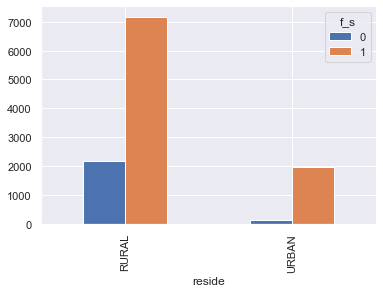

In [240]:
pd.crosstab(Add_f_s_rrd.reside,Add_f_s_rrd.f_s).plot(kind='bar')

In [241]:
pd.crosstab(Add_f_s_rrd.region,Add_f_s_rrd.f_s)

f_s,0,1
region,,
Central,1067,2883
North,175,2001
Southern,1043,4260


In [242]:
H = Add_f_s_rrd.region
counts = H.value_counts()
counts

Southern    5303
Central     3950
North       2176
Name: region, dtype: int64

In [243]:
percent100 = H.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
percent100

Southern     46.4%
Central     34.56%
North       19.04%
Name: region, dtype: object

<AxesSubplot:xlabel='region'>

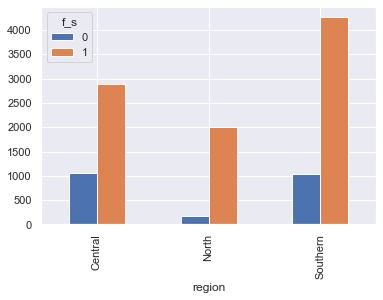

In [244]:
pd.crosstab(Add_f_s_rrd.region,Add_f_s_rrd.f_s).plot(kind='bar')

In [245]:
data_R_cleaned

,HHID,social_nets,Received
0,0004806a172546e99ae07674de291ed7,Free Maize (Specify),NO
1,0004806a172546e99ae07674de291ed7,Free Food (other than Maize) (Specify),NO
2,0004806a172546e99ae07674de291ed7,Inputs-For-Work Programme,NO
3,0004806a172546e99ae07674de291ed7,School Feeding Programme,YES
4,0004806a172546e99ae07674de291ed7,Free Distribution of Likuni Phala,NO
...,...,...,...
148644,fffe13ed0c28474c975af476cc1a33b7,Direct Cash Transfers from others,NO
148645,fffe13ed0c28474c975af476cc1a33b7,"Other, Specify",NO
148646,fffe13ed0c28474c975af476cc1a33b7,MASAF - Public Works Programme,NO
148647,fffe13ed0c28474c975af476cc1a33b7,Food/Cash-for-Work Programme,NO


In [246]:
data_R_cleaned

,HHID,social_nets,Received
0,0004806a172546e99ae07674de291ed7,Free Maize (Specify),NO
1,0004806a172546e99ae07674de291ed7,Free Food (other than Maize) (Specify),NO
2,0004806a172546e99ae07674de291ed7,Inputs-For-Work Programme,NO
3,0004806a172546e99ae07674de291ed7,School Feeding Programme,YES
4,0004806a172546e99ae07674de291ed7,Free Distribution of Likuni Phala,NO
...,...,...,...
148644,fffe13ed0c28474c975af476cc1a33b7,Direct Cash Transfers from others,NO
148645,fffe13ed0c28474c975af476cc1a33b7,"Other, Specify",NO
148646,fffe13ed0c28474c975af476cc1a33b7,MASAF - Public Works Programme,NO
148647,fffe13ed0c28474c975af476cc1a33b7,Food/Cash-for-Work Programme,NO


In [247]:
data_R_cleaned = pd.get_dummies(data_R_cleaned, columns = ['Received'])

In [248]:
data_R_cleaned

,HHID,social_nets,Received_NO,Received_YES
0,0004806a172546e99ae07674de291ed7,Free Maize (Specify),1,0
1,0004806a172546e99ae07674de291ed7,Free Food (other than Maize) (Specify),1,0
2,0004806a172546e99ae07674de291ed7,Inputs-For-Work Programme,1,0
3,0004806a172546e99ae07674de291ed7,School Feeding Programme,0,1
4,0004806a172546e99ae07674de291ed7,Free Distribution of Likuni Phala,1,0
...,...,...,...,...
148644,fffe13ed0c28474c975af476cc1a33b7,Direct Cash Transfers from others,1,0
148645,fffe13ed0c28474c975af476cc1a33b7,"Other, Specify",1,0
148646,fffe13ed0c28474c975af476cc1a33b7,MASAF - Public Works Programme,1,0
148647,fffe13ed0c28474c975af476cc1a33b7,Food/Cash-for-Work Programme,1,0


In [249]:
data_R_cleaned = data_R_cleaned.drop(['Received_NO'],axis=1)

In [250]:
data_R_cleaned

,HHID,social_nets,Received_YES
0,0004806a172546e99ae07674de291ed7,Free Maize (Specify),0
1,0004806a172546e99ae07674de291ed7,Free Food (other than Maize) (Specify),0
2,0004806a172546e99ae07674de291ed7,Inputs-For-Work Programme,0
3,0004806a172546e99ae07674de291ed7,School Feeding Programme,1
4,0004806a172546e99ae07674de291ed7,Free Distribution of Likuni Phala,0
...,...,...,...
148644,fffe13ed0c28474c975af476cc1a33b7,Direct Cash Transfers from others,0
148645,fffe13ed0c28474c975af476cc1a33b7,"Other, Specify",0
148646,fffe13ed0c28474c975af476cc1a33b7,MASAF - Public Works Programme,0
148647,fffe13ed0c28474c975af476cc1a33b7,Food/Cash-for-Work Programme,0


In [251]:
foodsec_rrd_social = pd.merge(Add_f_s_rrd, data_R_cleaned, left_index=True, right_index=True, how="inner")

In [252]:
foodsec_rrd_social

,HHID_x,district,region,reside,HHID_y,Food_security,f_s,HHID,social_nets,Received_YES
0,7d78f2c5da59436d9bde9b09ea8a8aaf,Chitipa,North,RURAL,7d78f2c5da59436d9bde9b09ea8a8aaf,36.0,1,0004806a172546e99ae07674de291ed7,Free Maize (Specify),0
1,7144cc6d29b3485d9e6d6188b255c756,Chitipa,North,RURAL,7144cc6d29b3485d9e6d6188b255c756,50.5,1,0004806a172546e99ae07674de291ed7,Free Food (other than Maize) (Specify),0
2,9936d103bf974a93afbc63d477b8b3f2,Chitipa,North,RURAL,9936d103bf974a93afbc63d477b8b3f2,39.0,1,0004806a172546e99ae07674de291ed7,Inputs-For-Work Programme,0
3,cc8f211413cd493e83e01a96aba95bbb,Chitipa,North,RURAL,cc8f211413cd493e83e01a96aba95bbb,62.0,1,0004806a172546e99ae07674de291ed7,School Feeding Programme,1
4,e50cfa8d11b44d56891e0fad015b07c7,Chitipa,North,RURAL,e50cfa8d11b44d56891e0fad015b07c7,35.5,1,0004806a172546e99ae07674de291ed7,Free Distribution of Likuni Phala,0
...,...,...,...,...,...,...,...,...,...,...
11428,2208f44e4c0e40299e6e9d5fa3742f3b,Blantyre City,Southern,URBAN,217455196b2e46a0996ca61da955e243,66.5,1,138fe65e4394456a9fc55fec3942e856,Free Maize (Specify),0
11429,217455196b2e46a0996ca61da955e243,Blantyre City,Southern,URBAN,23707c4144fb489ab5482403274f396f,100.0,1,138fe65e4394456a9fc55fec3942e856,Free Food (other than Maize) (Specify),0
11430,23707c4144fb489ab5482403274f396f,Blantyre City,Southern,URBAN,01d649e11c664fe580315f47328f99f8,49.0,1,138fe65e4394456a9fc55fec3942e856,Inputs-For-Work Programme,0
11431,01d649e11c664fe580315f47328f99f8,Blantyre City,Southern,URBAN,80b809e8c90b49e88996ae340a532820,104.0,1,138fe65e4394456a9fc55fec3942e856,School Feeding Programme,0


In [253]:
pd.crosstab(foodsec_rrd_social.Received_YES,foodsec_rrd_social.f_s)

f_s,0,1
Received_YES,,
0,2190,8773
1,95,371


<AxesSubplot:xlabel='Received_YES'>

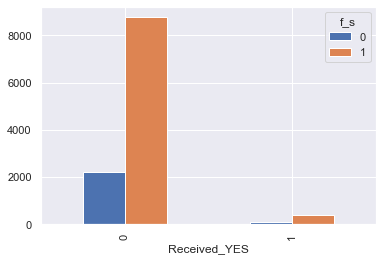

In [254]:
pd.crosstab(foodsec_rrd_social.Received_YES,foodsec_rrd_social.f_s).plot(kind='bar')

In [255]:
S = foodsec_rrd_social.Received_YES
counts = S.value_counts()
counts

0    10963
1      466
Name: Received_YES, dtype: int64

In [256]:
percent100 = S.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
percent100

0    95.92%
1     4.08%
Name: Received_YES, dtype: object

In [257]:
pd.crosstab(foodsec_rrd_social.Received_YES,foodsec_rrd_social.reside)

reside,RURAL,URBAN
Received_YES,,
0,8953,2010
1,385,81


<AxesSubplot:xlabel='Received_YES'>

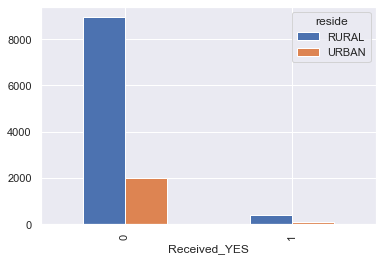

In [258]:
pd.crosstab(foodsec_rrd_social.Received_YES,foodsec_rrd_social.reside).plot(kind='bar')

In [259]:
data_B_cleaned

,HHID,HH_head,Marital_status
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER
5,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
6,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
...,...,...,...
50471,01d649e11c664fe580315f47328f99f8,MALE,DIVORCED
50472,80b809e8c90b49e88996ae340a532820,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50473,80b809e8c90b49e88996ae340a532820,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50474,80b809e8c90b49e88996ae340a532820,MALE,NEVER MARRIED


In [260]:
data_B_cleaned = data_B_cleaned.rename(columns={"Marital_status" : "Marriage"})

In [261]:
data_B_cleaned

,HHID,HH_head,Marriage
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER
5,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
6,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
...,...,...,...
50471,01d649e11c664fe580315f47328f99f8,MALE,DIVORCED
50472,80b809e8c90b49e88996ae340a532820,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50473,80b809e8c90b49e88996ae340a532820,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50474,80b809e8c90b49e88996ae340a532820,MALE,NEVER MARRIED


In [262]:
data_B_cleaned

,HHID,HH_head,Marriage
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER
5,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
6,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
...,...,...,...
50471,01d649e11c664fe580315f47328f99f8,MALE,DIVORCED
50472,80b809e8c90b49e88996ae340a532820,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50473,80b809e8c90b49e88996ae340a532820,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50474,80b809e8c90b49e88996ae340a532820,MALE,NEVER MARRIED


In [263]:
foodsec_rrd_social

,HHID_x,district,region,reside,HHID_y,Food_security,f_s,HHID,social_nets,Received_YES
0,7d78f2c5da59436d9bde9b09ea8a8aaf,Chitipa,North,RURAL,7d78f2c5da59436d9bde9b09ea8a8aaf,36.0,1,0004806a172546e99ae07674de291ed7,Free Maize (Specify),0
1,7144cc6d29b3485d9e6d6188b255c756,Chitipa,North,RURAL,7144cc6d29b3485d9e6d6188b255c756,50.5,1,0004806a172546e99ae07674de291ed7,Free Food (other than Maize) (Specify),0
2,9936d103bf974a93afbc63d477b8b3f2,Chitipa,North,RURAL,9936d103bf974a93afbc63d477b8b3f2,39.0,1,0004806a172546e99ae07674de291ed7,Inputs-For-Work Programme,0
3,cc8f211413cd493e83e01a96aba95bbb,Chitipa,North,RURAL,cc8f211413cd493e83e01a96aba95bbb,62.0,1,0004806a172546e99ae07674de291ed7,School Feeding Programme,1
4,e50cfa8d11b44d56891e0fad015b07c7,Chitipa,North,RURAL,e50cfa8d11b44d56891e0fad015b07c7,35.5,1,0004806a172546e99ae07674de291ed7,Free Distribution of Likuni Phala,0
...,...,...,...,...,...,...,...,...,...,...
11428,2208f44e4c0e40299e6e9d5fa3742f3b,Blantyre City,Southern,URBAN,217455196b2e46a0996ca61da955e243,66.5,1,138fe65e4394456a9fc55fec3942e856,Free Maize (Specify),0
11429,217455196b2e46a0996ca61da955e243,Blantyre City,Southern,URBAN,23707c4144fb489ab5482403274f396f,100.0,1,138fe65e4394456a9fc55fec3942e856,Free Food (other than Maize) (Specify),0
11430,23707c4144fb489ab5482403274f396f,Blantyre City,Southern,URBAN,01d649e11c664fe580315f47328f99f8,49.0,1,138fe65e4394456a9fc55fec3942e856,Inputs-For-Work Programme,0
11431,01d649e11c664fe580315f47328f99f8,Blantyre City,Southern,URBAN,80b809e8c90b49e88996ae340a532820,104.0,1,138fe65e4394456a9fc55fec3942e856,School Feeding Programme,0


In [264]:
foodsec_rrd_social = foodsec_rrd_social.drop(['HHID_x','HHID_y', 'district', 'social_nets' ],axis=1)

In [265]:
foodsec_rrd_social

,region,reside,Food_security,f_s,HHID,Received_YES
0,North,RURAL,36.0,1,0004806a172546e99ae07674de291ed7,0
1,North,RURAL,50.5,1,0004806a172546e99ae07674de291ed7,0
2,North,RURAL,39.0,1,0004806a172546e99ae07674de291ed7,0
3,North,RURAL,62.0,1,0004806a172546e99ae07674de291ed7,1
4,North,RURAL,35.5,1,0004806a172546e99ae07674de291ed7,0
...,...,...,...,...,...,...
11428,Southern,URBAN,66.5,1,138fe65e4394456a9fc55fec3942e856,0
11429,Southern,URBAN,100.0,1,138fe65e4394456a9fc55fec3942e856,0
11430,Southern,URBAN,49.0,1,138fe65e4394456a9fc55fec3942e856,0
11431,Southern,URBAN,104.0,1,138fe65e4394456a9fc55fec3942e856,0


In [266]:
foodsec_rrd_social = foodsec_rrd_social.rename(columns={"Received_YES" : "social_nets"})

In [267]:
foodsec_rrd_social

,region,reside,Food_security,f_s,HHID,social_nets
0,North,RURAL,36.0,1,0004806a172546e99ae07674de291ed7,0
1,North,RURAL,50.5,1,0004806a172546e99ae07674de291ed7,0
2,North,RURAL,39.0,1,0004806a172546e99ae07674de291ed7,0
3,North,RURAL,62.0,1,0004806a172546e99ae07674de291ed7,1
4,North,RURAL,35.5,1,0004806a172546e99ae07674de291ed7,0
...,...,...,...,...,...,...
11428,Southern,URBAN,66.5,1,138fe65e4394456a9fc55fec3942e856,0
11429,Southern,URBAN,100.0,1,138fe65e4394456a9fc55fec3942e856,0
11430,Southern,URBAN,49.0,1,138fe65e4394456a9fc55fec3942e856,0
11431,Southern,URBAN,104.0,1,138fe65e4394456a9fc55fec3942e856,0


In [268]:
data_B_cleaned

,HHID,HH_head,Marriage
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER
5,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
6,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED
...,...,...,...
50471,01d649e11c664fe580315f47328f99f8,MALE,DIVORCED
50472,80b809e8c90b49e88996ae340a532820,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50473,80b809e8c90b49e88996ae340a532820,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION
50474,80b809e8c90b49e88996ae340a532820,MALE,NEVER MARRIED


In [269]:
data_C_cleaned

,HHID,Education
0,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
2,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
4,7144cc6d29b3485d9e6d6188b255c756,YES
5,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...
50471,01d649e11c664fe580315f47328f99f8,YES
50472,80b809e8c90b49e88996ae340a532820,YES
50473,80b809e8c90b49e88996ae340a532820,YES
50474,80b809e8c90b49e88996ae340a532820,YES


In [270]:
Edu_Gender = pd.merge(data_B_cleaned, data_C_cleaned, left_index=True, right_index=True, how="inner")

In [271]:
Edu_Gender

,HHID_x,HH_head,Marriage,HHID_y,Education
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER,7144cc6d29b3485d9e6d6188b255c756,YES
5,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES
6,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...,...,...,...
50471,01d649e11c664fe580315f47328f99f8,MALE,DIVORCED,01d649e11c664fe580315f47328f99f8,YES
50472,80b809e8c90b49e88996ae340a532820,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,80b809e8c90b49e88996ae340a532820,YES
50473,80b809e8c90b49e88996ae340a532820,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,80b809e8c90b49e88996ae340a532820,YES
50474,80b809e8c90b49e88996ae340a532820,MALE,NEVER MARRIED,80b809e8c90b49e88996ae340a532820,YES


In [272]:
data_D_cleaned

,HHID,Chronic_illness
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
2,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
3,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,7144cc6d29b3485d9e6d6188b255c756,YES
...,...,...
50471,01d649e11c664fe580315f47328f99f8,NO
50472,80b809e8c90b49e88996ae340a532820,NO
50473,80b809e8c90b49e88996ae340a532820,NO
50474,80b809e8c90b49e88996ae340a532820,NO


In [273]:
Edu_Gender = pd.merge(Edu_Gender , data_D_cleaned, left_index=True, right_index=True, how="inner")

In [274]:
Edu_Gender

,HHID_x,HH_head,Marriage,HHID_y,Education,HHID,Chronic_illness
0,7d78f2c5da59436d9bde9b09ea8a8aaf,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7d78f2c5da59436d9bde9b09ea8a8aaf,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,7d78f2c5da59436d9bde9b09ea8a8aaf,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,7144cc6d29b3485d9e6d6188b255c756,FEMALE,WIDOW OR WIDOWER,7144cc6d29b3485d9e6d6188b255c756,YES,7144cc6d29b3485d9e6d6188b255c756,YES
5,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES,7144cc6d29b3485d9e6d6188b255c756,NO
6,7144cc6d29b3485d9e6d6188b255c756,MALE,NEVER MARRIED,7144cc6d29b3485d9e6d6188b255c756,YES,7144cc6d29b3485d9e6d6188b255c756,NO
...,...,...,...,...,...,...,...
50471,01d649e11c664fe580315f47328f99f8,MALE,DIVORCED,01d649e11c664fe580315f47328f99f8,YES,01d649e11c664fe580315f47328f99f8,NO
50472,80b809e8c90b49e88996ae340a532820,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,80b809e8c90b49e88996ae340a532820,YES,80b809e8c90b49e88996ae340a532820,NO
50473,80b809e8c90b49e88996ae340a532820,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,80b809e8c90b49e88996ae340a532820,YES,80b809e8c90b49e88996ae340a532820,NO
50474,80b809e8c90b49e88996ae340a532820,MALE,NEVER MARRIED,80b809e8c90b49e88996ae340a532820,YES,80b809e8c90b49e88996ae340a532820,NO


In [275]:
Edu_Gender =Edu_Gender .drop(['HHID_x','HHID_y'],axis=1)

In [276]:
Edu_Gender

,HH_head,Marriage,Education,HHID,Chronic_illness
0,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,FEMALE,WIDOW OR WIDOWER,YES,7144cc6d29b3485d9e6d6188b255c756,YES
5,MALE,NEVER MARRIED,YES,7144cc6d29b3485d9e6d6188b255c756,NO
6,MALE,NEVER MARRIED,YES,7144cc6d29b3485d9e6d6188b255c756,NO
...,...,...,...,...,...
50471,MALE,DIVORCED,YES,01d649e11c664fe580315f47328f99f8,NO
50472,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,80b809e8c90b49e88996ae340a532820,NO
50473,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,80b809e8c90b49e88996ae340a532820,NO
50474,MALE,NEVER MARRIED,YES,80b809e8c90b49e88996ae340a532820,NO


In [277]:
data_N1_cleaned

,HHID,Business_Ownership
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7144cc6d29b3485d9e6d6188b255c756,NO
2,9936d103bf974a93afbc63d477b8b3f2,NO
3,cc8f211413cd493e83e01a96aba95bbb,YES
4,e50cfa8d11b44d56891e0fad015b07c7,NO
...,...,...
11429,217455196b2e46a0996ca61da955e243,NO
11430,23707c4144fb489ab5482403274f396f,NO
11431,01d649e11c664fe580315f47328f99f8,NO
11432,80b809e8c90b49e88996ae340a532820,NO


In [278]:
data_P_cleaned

,HHID,Business_ownership
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
2,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
3,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
...,...,...
182939,de477d97327c42a3804781971d0b90cf,NO
182940,de477d97327c42a3804781971d0b90cf,NO
182941,de477d97327c42a3804781971d0b90cf,NO
182942,de477d97327c42a3804781971d0b90cf,NO


In [279]:
Edu_Gender = pd.merge(Edu_Gender , data_P_cleaned, left_index=True, right_index=True, how="inner")

In [280]:
Edu_Gender

,HH_head,Marriage,Education,HHID_x,Chronic_illness,HHID_y,Business_ownership
0,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,FEMALE,WIDOW OR WIDOWER,YES,7144cc6d29b3485d9e6d6188b255c756,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
5,MALE,NEVER MARRIED,YES,7144cc6d29b3485d9e6d6188b255c756,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
6,MALE,NEVER MARRIED,YES,7144cc6d29b3485d9e6d6188b255c756,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
...,...,...,...,...,...,...,...
50471,MALE,DIVORCED,YES,01d649e11c664fe580315f47328f99f8,NO,27a7200158b74134b0190181a8d543b5,NO
50472,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,80b809e8c90b49e88996ae340a532820,NO,27a7200158b74134b0190181a8d543b5,NO
50473,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,80b809e8c90b49e88996ae340a532820,NO,27a7200158b74134b0190181a8d543b5,NO
50474,MALE,NEVER MARRIED,YES,80b809e8c90b49e88996ae340a532820,NO,27a7200158b74134b0190181a8d543b5,NO


In [281]:
Edu_Gender = Edu_Gender.rename(columns={"Business_ownership" : "other_incomes"})

In [282]:
Edu_Gender

,HH_head,Marriage,Education,HHID_x,Chronic_illness,HHID_y,other_incomes
0,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
4,FEMALE,WIDOW OR WIDOWER,YES,7144cc6d29b3485d9e6d6188b255c756,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
5,MALE,NEVER MARRIED,YES,7144cc6d29b3485d9e6d6188b255c756,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
6,MALE,NEVER MARRIED,YES,7144cc6d29b3485d9e6d6188b255c756,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
...,...,...,...,...,...,...,...
50471,MALE,DIVORCED,YES,01d649e11c664fe580315f47328f99f8,NO,27a7200158b74134b0190181a8d543b5,NO
50472,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,80b809e8c90b49e88996ae340a532820,NO,27a7200158b74134b0190181a8d543b5,NO
50473,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,80b809e8c90b49e88996ae340a532820,NO,27a7200158b74134b0190181a8d543b5,NO
50474,MALE,NEVER MARRIED,YES,80b809e8c90b49e88996ae340a532820,NO,27a7200158b74134b0190181a8d543b5,NO


In [283]:
data_S1_cleaned

,HHID,Credit
0,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,7144cc6d29b3485d9e6d6188b255c756,YES
2,9936d103bf974a93afbc63d477b8b3f2,NO
3,cc8f211413cd493e83e01a96aba95bbb,YES
4,e50cfa8d11b44d56891e0fad015b07c7,YES
...,...,...
11768,217455196b2e46a0996ca61da955e243,NO
11769,23707c4144fb489ab5482403274f396f,YES
11770,01d649e11c664fe580315f47328f99f8,NO
11771,80b809e8c90b49e88996ae340a532820,NO


In [284]:
foodsec_rrd_social = pd.merge(foodsec_rrd_social, data_S1_cleaned, left_index=True, right_index=True, how="inner")

In [285]:
foodsec_rrd_social 

,region,reside,Food_security,f_s,HHID_x,social_nets,HHID_y,Credit
0,North,RURAL,36.0,1,0004806a172546e99ae07674de291ed7,0,7d78f2c5da59436d9bde9b09ea8a8aaf,YES
1,North,RURAL,50.5,1,0004806a172546e99ae07674de291ed7,0,7144cc6d29b3485d9e6d6188b255c756,YES
2,North,RURAL,39.0,1,0004806a172546e99ae07674de291ed7,0,9936d103bf974a93afbc63d477b8b3f2,NO
3,North,RURAL,62.0,1,0004806a172546e99ae07674de291ed7,1,cc8f211413cd493e83e01a96aba95bbb,YES
4,North,RURAL,35.5,1,0004806a172546e99ae07674de291ed7,0,e50cfa8d11b44d56891e0fad015b07c7,YES
...,...,...,...,...,...,...,...,...
11428,Southern,URBAN,66.5,1,138fe65e4394456a9fc55fec3942e856,0,3ad49d8614ce4e5a95f9e619d312fd2d,NO
11429,Southern,URBAN,100.0,1,138fe65e4394456a9fc55fec3942e856,0,de2295b511fc4e9492b4b2f265e924cb,YES
11430,Southern,URBAN,49.0,1,138fe65e4394456a9fc55fec3942e856,0,de2295b511fc4e9492b4b2f265e924cb,YES
11431,Southern,URBAN,104.0,1,138fe65e4394456a9fc55fec3942e856,0,a283d7ce013c45b5ad7cef33bab749a1,NO


In [286]:
foodsec_rrd_social = foodsec_rrd_social.drop(['HHID_x','HHID_y'],axis=1)

In [287]:
foodsec_rrd_social

,region,reside,Food_security,f_s,social_nets,Credit
0,North,RURAL,36.0,1,0,YES
1,North,RURAL,50.5,1,0,YES
2,North,RURAL,39.0,1,0,NO
3,North,RURAL,62.0,1,1,YES
4,North,RURAL,35.5,1,0,YES
...,...,...,...,...,...,...
11428,Southern,URBAN,66.5,1,0,NO
11429,Southern,URBAN,100.0,1,0,YES
11430,Southern,URBAN,49.0,1,0,YES
11431,Southern,URBAN,104.0,1,0,NO


In [288]:
data_W_cleaned

,HHID,Death
0,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,7144cc6d29b3485d9e6d6188b255c756,NO
2,9936d103bf974a93afbc63d477b8b3f2,NO
3,cc8f211413cd493e83e01a96aba95bbb,NO
4,e50cfa8d11b44d56891e0fad015b07c7,NO
...,...,...
11459,217455196b2e46a0996ca61da955e243,NO
11460,23707c4144fb489ab5482403274f396f,NO
11461,01d649e11c664fe580315f47328f99f8,NO
11462,80b809e8c90b49e88996ae340a532820,NO


In [289]:
data_death = pd.merge(foodsec_rrd_social , data_W_cleaned, left_index=True, right_index=True, how="inner")

In [290]:
data_death

,region,reside,Food_security,f_s,social_nets,Credit,HHID,Death
0,North,RURAL,36.0,1,0,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,North,RURAL,50.5,1,0,YES,7144cc6d29b3485d9e6d6188b255c756,NO
2,North,RURAL,39.0,1,0,NO,9936d103bf974a93afbc63d477b8b3f2,NO
3,North,RURAL,62.0,1,1,YES,cc8f211413cd493e83e01a96aba95bbb,NO
4,North,RURAL,35.5,1,0,YES,e50cfa8d11b44d56891e0fad015b07c7,NO
...,...,...,...,...,...,...,...,...
11428,Southern,URBAN,66.5,1,0,NO,6e77c4fddf6243a08417ff98e6010fba,NO
11429,Southern,URBAN,100.0,1,0,YES,3b8aa2fc55e3481b8b3a2935a916858f,NO
11430,Southern,URBAN,49.0,1,0,YES,4d3f41235e5e46a7b5df1cb3682bc945,NO
11431,Southern,URBAN,104.0,1,0,NO,8a2302e43ab84f4a9796a9e62c768e7a,YES


In [291]:
data_U_cleaned

,HHID,shocks
0,0004806a172546e99ae07674de291ed7,No
1,0004806a172546e99ae07674de291ed7,No
2,0004806a172546e99ae07674de291ed7,No
3,0004806a172546e99ae07674de291ed7,No
4,0004806a172546e99ae07674de291ed7,No
...,...,...
262977,fffe13ed0c28474c975af476cc1a33b7,No
262978,fffe13ed0c28474c975af476cc1a33b7,No
262979,fffe13ed0c28474c975af476cc1a33b7,No
262980,fffe13ed0c28474c975af476cc1a33b7,Yes


In [292]:
Edu_shock = pd.merge(Edu_Gender , data_U_cleaned, left_index=True, right_index=True, how="inner")

In [293]:
Edu_shock

,HH_head,Marriage,Education,HHID_x,Chronic_illness,HHID_y,other_incomes,HHID,shocks
0,MALE,POLYGAMOUS MARRIED OR NON-FORMAL UNION,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,0004806a172546e99ae07674de291ed7,No
1,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,0004806a172546e99ae07674de291ed7,No
4,FEMALE,WIDOW OR WIDOWER,YES,7144cc6d29b3485d9e6d6188b255c756,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,0004806a172546e99ae07674de291ed7,No
5,MALE,NEVER MARRIED,YES,7144cc6d29b3485d9e6d6188b255c756,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,0004806a172546e99ae07674de291ed7,No
6,MALE,NEVER MARRIED,YES,7144cc6d29b3485d9e6d6188b255c756,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,0004806a172546e99ae07674de291ed7,No
...,...,...,...,...,...,...,...,...,...
50471,MALE,DIVORCED,YES,01d649e11c664fe580315f47328f99f8,NO,27a7200158b74134b0190181a8d543b5,NO,30ff3d3716244f4d8ea0d347dbcd9f74,No
50472,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,80b809e8c90b49e88996ae340a532820,NO,27a7200158b74134b0190181a8d543b5,NO,30ff3d3716244f4d8ea0d347dbcd9f74,No
50473,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,80b809e8c90b49e88996ae340a532820,NO,27a7200158b74134b0190181a8d543b5,NO,30ff3d3716244f4d8ea0d347dbcd9f74,No
50474,MALE,NEVER MARRIED,YES,80b809e8c90b49e88996ae340a532820,NO,27a7200158b74134b0190181a8d543b5,NO,30ff3d3716244f4d8ea0d347dbcd9f74,No


In [294]:
data_E_cleaned

,HHID,combined_Occu
1,7d78f2c5da59436d9bde9b09ea8a8aaf,1
2,7d78f2c5da59436d9bde9b09ea8a8aaf,1
4,7144cc6d29b3485d9e6d6188b255c756,1
5,7144cc6d29b3485d9e6d6188b255c756,1
6,7144cc6d29b3485d9e6d6188b255c756,1
...,...,...
50440,6af1f4bf345741beb9f26a211540a911,1
50447,2c62a32d1151484a83c172b8a64b38cd,1
50448,2c62a32d1151484a83c172b8a64b38cd,1
50453,ada82bf4996446e2a1d50ed7c5bb6953,1


In [295]:
data_occu = pd.merge(Edu_shock , data_E_cleaned, left_index=True, right_index=True, how="inner")

C:\Users\AKCHINEX4\AppData\Local\Temp\ipykernel_2216\1163320693.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'HHID_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_occu = pd.merge(Edu_shock , data_E_cleaned, left_index=True, right_index=True, how="inner")


In [296]:
data_occu

,HH_head,Marriage,Education,HHID_x,Chronic_illness,HHID_y,other_incomes,HHID_x,shocks,HHID_y,combined_Occu
1,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,0004806a172546e99ae07674de291ed7,No,7d78f2c5da59436d9bde9b09ea8a8aaf,1
4,FEMALE,WIDOW OR WIDOWER,YES,7144cc6d29b3485d9e6d6188b255c756,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,0004806a172546e99ae07674de291ed7,No,7144cc6d29b3485d9e6d6188b255c756,1
5,MALE,NEVER MARRIED,YES,7144cc6d29b3485d9e6d6188b255c756,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,0004806a172546e99ae07674de291ed7,No,7144cc6d29b3485d9e6d6188b255c756,1
6,MALE,NEVER MARRIED,YES,7144cc6d29b3485d9e6d6188b255c756,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,0004806a172546e99ae07674de291ed7,No,7144cc6d29b3485d9e6d6188b255c756,1
7,MALE,NEVER MARRIED,YES,7144cc6d29b3485d9e6d6188b255c756,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,0004806a172546e99ae07674de291ed7,No,7144cc6d29b3485d9e6d6188b255c756,1
...,...,...,...,...,...,...,...,...,...,...,...
50440,FEMALE,NEVER MARRIED,YES,6af1f4bf345741beb9f26a211540a911,NO,d48adc3151074b869d8260bd9546cd3d,NO,30f8070a300c40d3bc15113a2cae702b,No,6af1f4bf345741beb9f26a211540a911,1
50447,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,2c62a32d1151484a83c172b8a64b38cd,NO,d48adc3151074b869d8260bd9546cd3d,NO,30f8070a300c40d3bc15113a2cae702b,No,2c62a32d1151484a83c172b8a64b38cd,1
50448,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,2c62a32d1151484a83c172b8a64b38cd,NO,82401bc1e3a245d4b9cda4187a546460,NO,30f8070a300c40d3bc15113a2cae702b,No,2c62a32d1151484a83c172b8a64b38cd,1
50453,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,ada82bf4996446e2a1d50ed7c5bb6953,YES,82401bc1e3a245d4b9cda4187a546460,NO,30f8070a300c40d3bc15113a2cae702b,No,ada82bf4996446e2a1d50ed7c5bb6953,1


In [297]:
data_occu = data_occu.drop(['HHID_x','HHID_y'],axis=1)

In [298]:
data_occu

,HH_head,Marriage,Education,Chronic_illness,other_incomes,shocks,combined_Occu
1,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1
4,FEMALE,WIDOW OR WIDOWER,YES,YES,NO,No,1
5,MALE,NEVER MARRIED,YES,NO,NO,No,1
6,MALE,NEVER MARRIED,YES,NO,NO,No,1
7,MALE,NEVER MARRIED,YES,NO,NO,No,1
...,...,...,...,...,...,...,...
50440,FEMALE,NEVER MARRIED,YES,NO,NO,No,1
50447,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1
50448,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1
50453,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,YES,NO,No,1


In [299]:
data_cleaned1 = data_death

In [300]:
data_cleaned1

,region,reside,Food_security,f_s,social_nets,Credit,HHID,Death
0,North,RURAL,36.0,1,0,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,North,RURAL,50.5,1,0,YES,7144cc6d29b3485d9e6d6188b255c756,NO
2,North,RURAL,39.0,1,0,NO,9936d103bf974a93afbc63d477b8b3f2,NO
3,North,RURAL,62.0,1,1,YES,cc8f211413cd493e83e01a96aba95bbb,NO
4,North,RURAL,35.5,1,0,YES,e50cfa8d11b44d56891e0fad015b07c7,NO
...,...,...,...,...,...,...,...,...
11428,Southern,URBAN,66.5,1,0,NO,6e77c4fddf6243a08417ff98e6010fba,NO
11429,Southern,URBAN,100.0,1,0,YES,3b8aa2fc55e3481b8b3a2935a916858f,NO
11430,Southern,URBAN,49.0,1,0,YES,4d3f41235e5e46a7b5df1cb3682bc945,NO
11431,Southern,URBAN,104.0,1,0,NO,8a2302e43ab84f4a9796a9e62c768e7a,YES


In [301]:
data_cleaned2 = pd.merge(data_cleaned1 , data_N1_cleaned, left_index=True, right_index=True, how="inner")

In [302]:
data_cleaned2

,region,reside,Food_security,f_s,social_nets,Credit,HHID_x,Death,HHID_y,Business_Ownership
0,North,RURAL,36.0,1,0,YES,7d78f2c5da59436d9bde9b09ea8a8aaf,NO,7d78f2c5da59436d9bde9b09ea8a8aaf,NO
1,North,RURAL,50.5,1,0,YES,7144cc6d29b3485d9e6d6188b255c756,NO,7144cc6d29b3485d9e6d6188b255c756,NO
2,North,RURAL,39.0,1,0,NO,9936d103bf974a93afbc63d477b8b3f2,NO,9936d103bf974a93afbc63d477b8b3f2,NO
3,North,RURAL,62.0,1,1,YES,cc8f211413cd493e83e01a96aba95bbb,NO,cc8f211413cd493e83e01a96aba95bbb,YES
4,North,RURAL,35.5,1,0,YES,e50cfa8d11b44d56891e0fad015b07c7,NO,e50cfa8d11b44d56891e0fad015b07c7,NO
...,...,...,...,...,...,...,...,...,...,...
11428,Southern,URBAN,66.5,1,0,NO,6e77c4fddf6243a08417ff98e6010fba,NO,2208f44e4c0e40299e6e9d5fa3742f3b,NO
11429,Southern,URBAN,100.0,1,0,YES,3b8aa2fc55e3481b8b3a2935a916858f,NO,217455196b2e46a0996ca61da955e243,NO
11430,Southern,URBAN,49.0,1,0,YES,4d3f41235e5e46a7b5df1cb3682bc945,NO,23707c4144fb489ab5482403274f396f,NO
11431,Southern,URBAN,104.0,1,0,NO,8a2302e43ab84f4a9796a9e62c768e7a,YES,01d649e11c664fe580315f47328f99f8,NO


In [303]:
Main_data= data_cleaned2.drop(['HHID_x','HHID_y'],axis=1)

In [304]:
Main_data

,region,reside,Food_security,f_s,social_nets,Credit,Death,Business_Ownership
0,North,RURAL,36.0,1,0,YES,NO,NO
1,North,RURAL,50.5,1,0,YES,NO,NO
2,North,RURAL,39.0,1,0,NO,NO,NO
3,North,RURAL,62.0,1,1,YES,NO,YES
4,North,RURAL,35.5,1,0,YES,NO,NO
...,...,...,...,...,...,...,...,...
11428,Southern,URBAN,66.5,1,0,NO,NO,NO
11429,Southern,URBAN,100.0,1,0,YES,NO,NO
11430,Southern,URBAN,49.0,1,0,YES,NO,NO
11431,Southern,URBAN,104.0,1,0,NO,YES,NO


In [305]:
data_occu

,HH_head,Marriage,Education,Chronic_illness,other_incomes,shocks,combined_Occu
1,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1
4,FEMALE,WIDOW OR WIDOWER,YES,YES,NO,No,1
5,MALE,NEVER MARRIED,YES,NO,NO,No,1
6,MALE,NEVER MARRIED,YES,NO,NO,No,1
7,MALE,NEVER MARRIED,YES,NO,NO,No,1
...,...,...,...,...,...,...,...
50440,FEMALE,NEVER MARRIED,YES,NO,NO,No,1
50447,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1
50448,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1
50453,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,YES,NO,No,1


In [306]:
data_I_combined

,HHID_x,HHID_y,non_food_exp,combined_amount
0,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
1,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
2,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
3,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
4,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
...,...,...,...,...
102901,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,Yes,1500.0
102902,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,No,0.0
102903,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,No,0.0
102904,de477d97327c42a3804781971d0b90cf,ec593897783c473ba890c1d4ef98fa58,Yes,600.0


In [307]:
data_food = pd.merge(data_occu , data_I_combined, left_index=True, right_index=True, how="inner")

In [308]:
data_food

,HH_head,Marriage,Education,Chronic_illness,other_incomes,shocks,combined_Occu,HHID_x,HHID_y,non_food_exp,combined_amount
1,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,500.0
4,FEMALE,WIDOW OR WIDOWER,YES,YES,NO,No,1,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
5,MALE,NEVER MARRIED,YES,NO,NO,No,1,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
6,MALE,NEVER MARRIED,YES,NO,NO,No,1,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,No,0.0
7,MALE,NEVER MARRIED,YES,NO,NO,No,1,7d78f2c5da59436d9bde9b09ea8a8aaf,7d78f2c5da59436d9bde9b09ea8a8aaf,Yes,1000.0
...,...,...,...,...,...,...,...,...,...,...,...
50440,FEMALE,NEVER MARRIED,YES,NO,NO,No,1,c48c9432352243a7806aa406b410daf9,e5da66343406483586be86d1c74a821c,Yes,850.0
50447,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1,ba0d7671fdb04fe2848b3e8acaaded83,e5da66343406483586be86d1c74a821c,No,0.0
50448,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1,ba0d7671fdb04fe2848b3e8acaaded83,e5da66343406483586be86d1c74a821c,Yes,600.0
50453,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,YES,NO,No,1,ba0d7671fdb04fe2848b3e8acaaded83,e5da66343406483586be86d1c74a821c,No,0.0


In [309]:
data_food = data_food.drop(['HHID_x','HHID_y'],axis=1)

In [310]:
data_food

,HH_head,Marriage,Education,Chronic_illness,other_incomes,shocks,combined_Occu,non_food_exp,combined_amount
1,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1,Yes,500.0
4,FEMALE,WIDOW OR WIDOWER,YES,YES,NO,No,1,No,0.0
5,MALE,NEVER MARRIED,YES,NO,NO,No,1,No,0.0
6,MALE,NEVER MARRIED,YES,NO,NO,No,1,No,0.0
7,MALE,NEVER MARRIED,YES,NO,NO,No,1,Yes,1000.0
...,...,...,...,...,...,...,...,...,...
50440,FEMALE,NEVER MARRIED,YES,NO,NO,No,1,Yes,850.0
50447,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1,No,0.0
50448,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1,Yes,600.0
50453,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,YES,NO,No,1,No,0.0


In [311]:
Main_data

,region,reside,Food_security,f_s,social_nets,Credit,Death,Business_Ownership
0,North,RURAL,36.0,1,0,YES,NO,NO
1,North,RURAL,50.5,1,0,YES,NO,NO
2,North,RURAL,39.0,1,0,NO,NO,NO
3,North,RURAL,62.0,1,1,YES,NO,YES
4,North,RURAL,35.5,1,0,YES,NO,NO
...,...,...,...,...,...,...,...,...
11428,Southern,URBAN,66.5,1,0,NO,NO,NO
11429,Southern,URBAN,100.0,1,0,YES,NO,NO
11430,Southern,URBAN,49.0,1,0,YES,NO,NO
11431,Southern,URBAN,104.0,1,0,NO,YES,NO


In [312]:
data_food = data_food.reset_index()
del data_food['index']

In [313]:
data_food

,HH_head,Marriage,Education,Chronic_illness,other_incomes,shocks,combined_Occu,non_food_exp,combined_amount
0,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1,Yes,500.0
1,FEMALE,WIDOW OR WIDOWER,YES,YES,NO,No,1,No,0.0
2,MALE,NEVER MARRIED,YES,NO,NO,No,1,No,0.0
3,MALE,NEVER MARRIED,YES,NO,NO,No,1,No,0.0
4,MALE,NEVER MARRIED,YES,NO,NO,No,1,Yes,1000.0
...,...,...,...,...,...,...,...,...,...
12552,FEMALE,NEVER MARRIED,YES,NO,NO,No,1,Yes,850.0
12553,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1,No,0.0
12554,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1,Yes,600.0
12555,MALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,YES,NO,No,1,No,0.0


In [314]:
Main_data = Main_data.reset_index()
del Main_data['index']

In [315]:
Main_data

,region,reside,Food_security,f_s,social_nets,Credit,Death,Business_Ownership
0,North,RURAL,36.0,1,0,YES,NO,NO
1,North,RURAL,50.5,1,0,YES,NO,NO
2,North,RURAL,39.0,1,0,NO,NO,NO
3,North,RURAL,62.0,1,1,YES,NO,YES
4,North,RURAL,35.5,1,0,YES,NO,NO
...,...,...,...,...,...,...,...,...
11422,Southern,URBAN,66.5,1,0,NO,NO,NO
11423,Southern,URBAN,100.0,1,0,YES,NO,NO
11424,Southern,URBAN,49.0,1,0,YES,NO,NO
11425,Southern,URBAN,104.0,1,0,NO,YES,NO


In [316]:
Data_Original = pd.merge(Main_data , data_food, left_index=True, right_index=True, how="inner")

In [317]:
Data_Original

,region,reside,Food_security,f_s,social_nets,Credit,Death,Business_Ownership,HH_head,Marriage,Education,Chronic_illness,other_incomes,shocks,combined_Occu,non_food_exp,combined_amount
0,North,RURAL,36.0,1,0,YES,NO,NO,FEMALE,MONOGAMOUS MARRIED OR NON-FORMAL UNION,YES,NO,NO,No,1,Yes,500.0
1,North,RURAL,50.5,1,0,YES,NO,NO,FEMALE,WIDOW OR WIDOWER,YES,YES,NO,No,1,No,0.0
2,North,RURAL,39.0,1,0,NO,NO,NO,MALE,NEVER MARRIED,YES,NO,NO,No,1,No,0.0
3,North,RURAL,62.0,1,1,YES,NO,YES,MALE,NEVER MARRIED,YES,NO,NO,No,1,No,0.0
4,North,RURAL,35.5,1,0,YES,NO,NO,MALE,NEVER MARRIED,YES,NO,NO,No,1,Yes,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,Southern,URBAN,66.5,1,0,NO,NO,NO,FEMALE,NEVER MARRIED,YES,NO,NO,No,1,Yes,6000.0
11423,Southern,URBAN,100.0,1,0,YES,NO,NO,FEMALE,NEVER MARRIED,YES,NO,NO,Yes,1,No,0.0
11424,Southern,URBAN,49.0,1,0,YES,NO,NO,FEMALE,NEVER MARRIED,YES,NO,NO,No,1,Yes,600.0
11425,Southern,URBAN,104.0,1,0,NO,YES,NO,MALE,NEVER MARRIED,YES,NO,NO,Yes,1,No,0.0


In [318]:
Data_Original = Data_Original.drop(['Marriage'],axis=1)

In [319]:
Data_Original

,region,reside,Food_security,f_s,social_nets,Credit,Death,Business_Ownership,HH_head,Education,Chronic_illness,other_incomes,shocks,combined_Occu,non_food_exp,combined_amount
0,North,RURAL,36.0,1,0,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,500.0
1,North,RURAL,50.5,1,0,YES,NO,NO,FEMALE,YES,YES,NO,No,1,No,0.0
2,North,RURAL,39.0,1,0,NO,NO,NO,MALE,YES,NO,NO,No,1,No,0.0
3,North,RURAL,62.0,1,1,YES,NO,YES,MALE,YES,NO,NO,No,1,No,0.0
4,North,RURAL,35.5,1,0,YES,NO,NO,MALE,YES,NO,NO,No,1,Yes,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,Southern,URBAN,66.5,1,0,NO,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,6000.0
11423,Southern,URBAN,100.0,1,0,YES,NO,NO,FEMALE,YES,NO,NO,Yes,1,No,0.0
11424,Southern,URBAN,49.0,1,0,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,600.0
11425,Southern,URBAN,104.0,1,0,NO,YES,NO,MALE,YES,NO,NO,Yes,1,No,0.0


In [320]:
Data_Original.columns.values

array(['region', 'reside', 'Food_security', 'f_s', 'social_nets',
       'Credit', 'Death', 'Business_Ownership', 'HH_head', 'Education',
       'Chronic_illness', 'other_incomes', 'shocks', 'combined_Occu',
       'non_food_exp', 'combined_amount'], dtype=object)

In [321]:
Column_names_reordered = ['f_s', 'Food_security', 'social_nets','region', 'reside',
       'Credit', 'Death', 'Business_Ownership', 'HH_head', 'Education',
       'Chronic_illness', 'other_incomes', 'shocks', 'combined_Occu',
       'non_food_exp', 'combined_amount']

In [322]:
Data_Original = Data_Original[Column_names_reordered]

In [323]:
Data_Original

,f_s,Food_security,social_nets,region,reside,Credit,Death,Business_Ownership,HH_head,Education,Chronic_illness,other_incomes,shocks,combined_Occu,non_food_exp,combined_amount
0,1,36.0,0,North,RURAL,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,500.0
1,1,50.5,0,North,RURAL,YES,NO,NO,FEMALE,YES,YES,NO,No,1,No,0.0
2,1,39.0,0,North,RURAL,NO,NO,NO,MALE,YES,NO,NO,No,1,No,0.0
3,1,62.0,1,North,RURAL,YES,NO,YES,MALE,YES,NO,NO,No,1,No,0.0
4,1,35.5,0,North,RURAL,YES,NO,NO,MALE,YES,NO,NO,No,1,Yes,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,Southern,URBAN,NO,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,6000.0
11423,1,100.0,0,Southern,URBAN,YES,NO,NO,FEMALE,YES,NO,NO,Yes,1,No,0.0
11424,1,49.0,0,Southern,URBAN,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,600.0
11425,1,104.0,0,Southern,URBAN,NO,YES,NO,MALE,YES,NO,NO,Yes,1,No,0.0


In [324]:
H = Data_Original.reside

In [325]:
counts = H.value_counts()
counts

RURAL    9337
URBAN    2090
Name: reside, dtype: int64

In [326]:
percent100 = H.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
percent100

RURAL    81.71%
URBAN    18.29%
Name: reside, dtype: object

In [327]:
pd.crosstab(Data_Original.reside,Data_Original.f_s)

f_s,0,1
reside,,
RURAL,2160,7177
URBAN,125,1965


<AxesSubplot:xlabel='reside'>

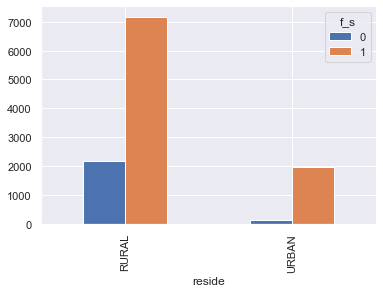

In [328]:
pd.crosstab(Data_Original.reside,Data_Original.f_s).plot(kind='bar')

In [329]:
pd.crosstab(Data_Original.region,Data_Original.f_s)

f_s,0,1
region,,
Central,1067,2883
North,175,2001
Southern,1043,4258


In [330]:
H = Data_Original.region
counts = H.value_counts()
counts

Southern    5301
Central     3950
North       2176
Name: region, dtype: int64

In [331]:
percent100 = H.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
percent100

Southern    46.39%
Central     34.57%
North       19.04%
Name: region, dtype: object

<AxesSubplot:xlabel='region'>

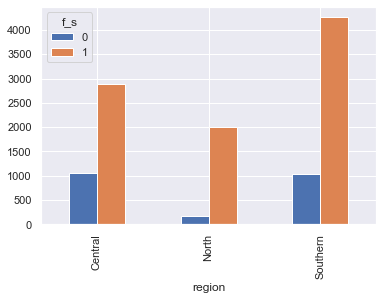

In [332]:
pd.crosstab(Data_Original.region,Data_Original.f_s).plot(kind='bar')

In [333]:
Data_Original

,f_s,Food_security,social_nets,region,reside,Credit,Death,Business_Ownership,HH_head,Education,Chronic_illness,other_incomes,shocks,combined_Occu,non_food_exp,combined_amount
0,1,36.0,0,North,RURAL,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,500.0
1,1,50.5,0,North,RURAL,YES,NO,NO,FEMALE,YES,YES,NO,No,1,No,0.0
2,1,39.0,0,North,RURAL,NO,NO,NO,MALE,YES,NO,NO,No,1,No,0.0
3,1,62.0,1,North,RURAL,YES,NO,YES,MALE,YES,NO,NO,No,1,No,0.0
4,1,35.5,0,North,RURAL,YES,NO,NO,MALE,YES,NO,NO,No,1,Yes,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,Southern,URBAN,NO,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,6000.0
11423,1,100.0,0,Southern,URBAN,YES,NO,NO,FEMALE,YES,NO,NO,Yes,1,No,0.0
11424,1,49.0,0,Southern,URBAN,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,600.0
11425,1,104.0,0,Southern,URBAN,NO,YES,NO,MALE,YES,NO,NO,Yes,1,No,0.0


In [334]:
S = Data_Original.social_nets
counts = S.value_counts()
counts

0    10961
1      466
Name: social_nets, dtype: int64

In [335]:
percent100 = S.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
percent100

0    95.92%
1     4.08%
Name: social_nets, dtype: object

In [336]:
pd.crosstab(Data_Original.social_nets,Data_Original.f_s)

f_s,0,1
social_nets,,
0,2190,8771
1,95,371


<AxesSubplot:xlabel='social_nets'>

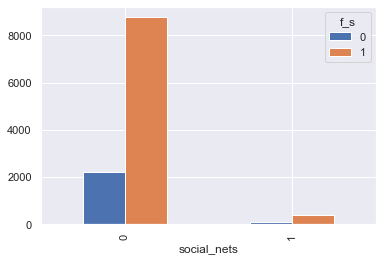

In [337]:
pd.crosstab(Data_Original.social_nets,Data_Original.f_s).plot(kind='bar')

In [338]:
pd.crosstab(Data_Original.HH_head,Data_Original.social_nets)

social_nets,0,1
HH_head,,
FEMALE,5282,229
MALE,5679,237


<AxesSubplot:xlabel='HH_head'>

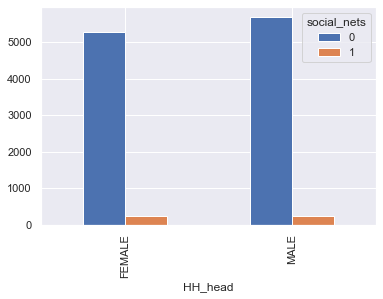

In [339]:
pd.crosstab(Data_Original.HH_head,Data_Original.social_nets).plot(kind='bar')

In [340]:
S_H = Data_Original.HH_head
counts = S_H.value_counts()
counts

MALE      5916
FEMALE    5511
Name: HH_head, dtype: int64

In [341]:
percent100 = S_H.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
percent100

MALE      51.77%
FEMALE    48.23%
Name: HH_head, dtype: object

In [342]:
F = Data_Original.f_s
counts = F.value_counts()
counts

1    9142
0    2285
Name: f_s, dtype: int64

In [343]:
percent100 = F.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
percent100

1    80.0%
0    20.0%
Name: f_s, dtype: object

In [344]:
A1

,HHID,region,district,reside,credit,death_rate,hhsize
0,7d78f2c5da59436d9bde9b09ea8a8aaf,North,Chitipa,RURAL,YES,NO,4
1,7144cc6d29b3485d9e6d6188b255c756,North,Chitipa,RURAL,YES,NO,4
2,9936d103bf974a93afbc63d477b8b3f2,North,Chitipa,RURAL,NO,NO,4
3,cc8f211413cd493e83e01a96aba95bbb,North,Chitipa,RURAL,YES,NO,5
4,e50cfa8d11b44d56891e0fad015b07c7,North,Chitipa,RURAL,YES,NO,5
...,...,...,...,...,...,...,...
11429,217455196b2e46a0996ca61da955e243,Southern,Blantyre City,URBAN,NO,NO,3
11430,23707c4144fb489ab5482403274f396f,Southern,Blantyre City,URBAN,YES,NO,3
11431,01d649e11c664fe580315f47328f99f8,Southern,Blantyre City,URBAN,NO,NO,1
11432,80b809e8c90b49e88996ae340a532820,Southern,Blantyre City,URBAN,NO,NO,3


In [345]:
HHS = A1.loc[:, ['hhsize']]

In [346]:
HHS

,hhsize
0,4
1,4
2,4
3,5
4,5
...,...
11429,3
11430,3
11431,1
11432,3


In [347]:
Data_Real = pd.merge(Data_Original, HHS, left_index=True, right_index=True, how="inner")

In [348]:
Data_Real

,f_s,Food_security,social_nets,region,reside,Credit,Death,Business_Ownership,HH_head,Education,Chronic_illness,other_incomes,shocks,combined_Occu,non_food_exp,combined_amount,hhsize
0,1,36.0,0,North,RURAL,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,500.0,4
1,1,50.5,0,North,RURAL,YES,NO,NO,FEMALE,YES,YES,NO,No,1,No,0.0,4
2,1,39.0,0,North,RURAL,NO,NO,NO,MALE,YES,NO,NO,No,1,No,0.0,4
3,1,62.0,1,North,RURAL,YES,NO,YES,MALE,YES,NO,NO,No,1,No,0.0,5
4,1,35.5,0,North,RURAL,YES,NO,NO,MALE,YES,NO,NO,No,1,Yes,1000.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,Southern,URBAN,NO,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,6000.0,6
11423,1,100.0,0,Southern,URBAN,YES,NO,NO,FEMALE,YES,NO,NO,Yes,1,No,0.0,5
11424,1,49.0,0,Southern,URBAN,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,600.0,1
11425,1,104.0,0,Southern,URBAN,NO,YES,NO,MALE,YES,NO,NO,Yes,1,No,0.0,2


In [349]:
E = Data_Real.Education
counts = E.value_counts()
counts

YES    10011
NO      1416
Name: Education, dtype: int64

In [350]:
percent100 = E.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
percent100

YES    87.61%
NO     12.39%
Name: Education, dtype: object

In [351]:
pd.crosstab(Data_Real.Education,Data_Real.social_nets)

social_nets,0,1
Education,,
NO,1360,56
YES,9601,410


<AxesSubplot:xlabel='Education'>

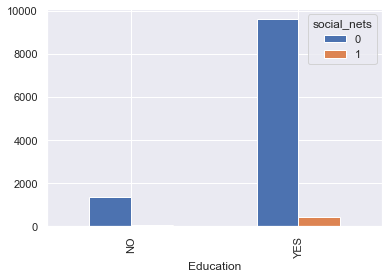

In [352]:
pd.crosstab(Data_Real.Education,Data_Real.social_nets).plot(kind='bar')

In [353]:
Data_Real

,f_s,Food_security,social_nets,region,reside,Credit,Death,Business_Ownership,HH_head,Education,Chronic_illness,other_incomes,shocks,combined_Occu,non_food_exp,combined_amount,hhsize
0,1,36.0,0,North,RURAL,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,500.0,4
1,1,50.5,0,North,RURAL,YES,NO,NO,FEMALE,YES,YES,NO,No,1,No,0.0,4
2,1,39.0,0,North,RURAL,NO,NO,NO,MALE,YES,NO,NO,No,1,No,0.0,4
3,1,62.0,1,North,RURAL,YES,NO,YES,MALE,YES,NO,NO,No,1,No,0.0,5
4,1,35.5,0,North,RURAL,YES,NO,NO,MALE,YES,NO,NO,No,1,Yes,1000.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,Southern,URBAN,NO,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,6000.0,6
11423,1,100.0,0,Southern,URBAN,YES,NO,NO,FEMALE,YES,NO,NO,Yes,1,No,0.0,5
11424,1,49.0,0,Southern,URBAN,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,600.0,1
11425,1,104.0,0,Southern,URBAN,NO,YES,NO,MALE,YES,NO,NO,Yes,1,No,0.0,2


In [354]:
Data_Real = pd.get_dummies(Data_Real, columns = ['reside'])

In [355]:
Data_Real

,f_s,Food_security,social_nets,region,Credit,Death,Business_Ownership,HH_head,Education,Chronic_illness,other_incomes,shocks,combined_Occu,non_food_exp,combined_amount,hhsize,reside_RURAL,reside_URBAN
0,1,36.0,0,North,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,500.0,4,1,0
1,1,50.5,0,North,YES,NO,NO,FEMALE,YES,YES,NO,No,1,No,0.0,4,1,0
2,1,39.0,0,North,NO,NO,NO,MALE,YES,NO,NO,No,1,No,0.0,4,1,0
3,1,62.0,1,North,YES,NO,YES,MALE,YES,NO,NO,No,1,No,0.0,5,1,0
4,1,35.5,0,North,YES,NO,NO,MALE,YES,NO,NO,No,1,Yes,1000.0,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,Southern,NO,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,6000.0,6,0,1
11423,1,100.0,0,Southern,YES,NO,NO,FEMALE,YES,NO,NO,Yes,1,No,0.0,5,0,1
11424,1,49.0,0,Southern,YES,NO,NO,FEMALE,YES,NO,NO,No,1,Yes,600.0,1,0,1
11425,1,104.0,0,Southern,NO,YES,NO,MALE,YES,NO,NO,Yes,1,No,0.0,2,0,1


In [356]:
Data_Real = pd.get_dummies(Data_Real, columns = ['Credit','Death','Business_Ownership','HH_head','Education','Chronic_illness', 'other_incomes','shocks','non_food_exp'])

In [357]:
Data_Real

,f_s,Food_security,social_nets,region,combined_Occu,combined_amount,hhsize,reside_RURAL,reside_URBAN,Credit_NO,...,Education_NO,Education_YES,Chronic_illness_NO,Chronic_illness_YES,other_incomes_NO,other_incomes_YES,shocks_No,shocks_Yes,non_food_exp_No,non_food_exp_Yes
0,1,36.0,0,North,1,500.0,4,1,0,0,...,0,1,1,0,1,0,1,0,0,1
1,1,50.5,0,North,1,0.0,4,1,0,0,...,0,1,0,1,1,0,1,0,1,0
2,1,39.0,0,North,1,0.0,4,1,0,1,...,0,1,1,0,1,0,1,0,1,0
3,1,62.0,1,North,1,0.0,5,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4,1,35.5,0,North,1,1000.0,5,1,0,0,...,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,Southern,1,6000.0,6,0,1,1,...,0,1,1,0,1,0,1,0,0,1
11423,1,100.0,0,Southern,1,0.0,5,0,1,0,...,0,1,1,0,1,0,0,1,1,0
11424,1,49.0,0,Southern,1,600.0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
11425,1,104.0,0,Southern,1,0.0,2,0,1,1,...,0,1,1,0,1,0,0,1,1,0


In [358]:
Data_Real = Data_Real.drop(['reside_RURAL', 'Education_NO', 'Chronic_illness_NO', 'other_incomes_NO', 'shocks_No', 'non_food_exp_No' ],axis=1)

In [359]:
Data_Real

,f_s,Food_security,social_nets,region,combined_Occu,combined_amount,hhsize,reside_URBAN,Credit_NO,Credit_YES,...,Death_YES,Business_Ownership_NO,Business_Ownership_YES,HH_head_FEMALE,HH_head_MALE,Education_YES,Chronic_illness_YES,other_incomes_YES,shocks_Yes,non_food_exp_Yes
0,1,36.0,0,North,1,500.0,4,0,0,1,...,0,1,0,1,0,1,0,0,0,1
1,1,50.5,0,North,1,0.0,4,0,0,1,...,0,1,0,1,0,1,1,0,0,0
2,1,39.0,0,North,1,0.0,4,0,1,0,...,0,1,0,0,1,1,0,0,0,0
3,1,62.0,1,North,1,0.0,5,0,0,1,...,0,0,1,0,1,1,0,0,0,0
4,1,35.5,0,North,1,1000.0,5,0,0,1,...,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,Southern,1,6000.0,6,1,1,0,...,0,1,0,1,0,1,0,0,0,1
11423,1,100.0,0,Southern,1,0.0,5,1,0,1,...,0,1,0,1,0,1,0,0,1,0
11424,1,49.0,0,Southern,1,600.0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,1
11425,1,104.0,0,Southern,1,0.0,2,1,1,0,...,1,1,0,0,1,1,0,0,1,0


In [360]:
Data_Real = Data_Real.drop(['Credit_NO', 'Business_Ownership_NO', 'HH_head_FEMALE'] ,axis=1)

In [361]:
Data_Real

,f_s,Food_security,social_nets,region,combined_Occu,combined_amount,hhsize,reside_URBAN,Credit_YES,Death_NO,Death_YES,Business_Ownership_YES,HH_head_MALE,Education_YES,Chronic_illness_YES,other_incomes_YES,shocks_Yes,non_food_exp_Yes
0,1,36.0,0,North,1,500.0,4,0,1,1,0,0,0,1,0,0,0,1
1,1,50.5,0,North,1,0.0,4,0,1,1,0,0,0,1,1,0,0,0
2,1,39.0,0,North,1,0.0,4,0,0,1,0,0,1,1,0,0,0,0
3,1,62.0,1,North,1,0.0,5,0,1,1,0,1,1,1,0,0,0,0
4,1,35.5,0,North,1,1000.0,5,0,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,Southern,1,6000.0,6,1,0,1,0,0,0,1,0,0,0,1
11423,1,100.0,0,Southern,1,0.0,5,1,1,1,0,0,0,1,0,0,1,0
11424,1,49.0,0,Southern,1,600.0,1,1,1,1,0,0,0,1,0,0,0,1
11425,1,104.0,0,Southern,1,0.0,2,1,0,0,1,0,1,1,0,0,1,0


In [362]:
Data_Real = Data_Real.drop(['Death_NO','region'] ,axis=1)

In [363]:
Data_Real

,f_s,Food_security,social_nets,combined_Occu,combined_amount,hhsize,reside_URBAN,Credit_YES,Death_YES,Business_Ownership_YES,HH_head_MALE,Education_YES,Chronic_illness_YES,other_incomes_YES,shocks_Yes,non_food_exp_Yes
0,1,36.0,0,1,500.0,4,0,1,0,0,0,1,0,0,0,1
1,1,50.5,0,1,0.0,4,0,1,0,0,0,1,1,0,0,0
2,1,39.0,0,1,0.0,4,0,0,0,0,1,1,0,0,0,0
3,1,62.0,1,1,0.0,5,0,1,0,1,1,1,0,0,0,0
4,1,35.5,0,1,1000.0,5,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,1,6000.0,6,1,0,0,0,0,1,0,0,0,1
11423,1,100.0,0,1,0.0,5,1,1,0,0,0,1,0,0,1,0
11424,1,49.0,0,1,600.0,1,1,1,0,0,0,1,0,0,0,1
11425,1,104.0,0,1,0.0,2,1,0,1,0,1,1,0,0,1,0


In [364]:
Data_Real = Data_Real.rename(columns={"reside_URBAN" : "reside", "Credit_YES" : "Credit", "Death_YES" : 'Death'})

In [365]:
Data_Real

,f_s,Food_security,social_nets,combined_Occu,combined_amount,hhsize,reside,Credit,Death,Business_Ownership_YES,HH_head_MALE,Education_YES,Chronic_illness_YES,other_incomes_YES,shocks_Yes,non_food_exp_Yes
0,1,36.0,0,1,500.0,4,0,1,0,0,0,1,0,0,0,1
1,1,50.5,0,1,0.0,4,0,1,0,0,0,1,1,0,0,0
2,1,39.0,0,1,0.0,4,0,0,0,0,1,1,0,0,0,0
3,1,62.0,1,1,0.0,5,0,1,0,1,1,1,0,0,0,0
4,1,35.5,0,1,1000.0,5,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,1,6000.0,6,1,0,0,0,0,1,0,0,0,1
11423,1,100.0,0,1,0.0,5,1,1,0,0,0,1,0,0,1,0
11424,1,49.0,0,1,600.0,1,1,1,0,0,0,1,0,0,0,1
11425,1,104.0,0,1,0.0,2,1,0,1,0,1,1,0,0,1,0


In [366]:
Data_Real = Data_Real.rename(columns={"Business_Ownership_YES" : "Business_Ownership", "HH_head_MALE" : "Gender_HH_Head", "Education_YES" : 'Education', "Chronic_illness_YES" : "Chronic_illness", "other_incomes_YES" : "other_incomes", "shocks_Yes" : "shocks", "non_food_exp_Yes" : "non_food_exp" })

In [367]:
Data_Real

,f_s,Food_security,social_nets,combined_Occu,combined_amount,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp
0,1,36.0,0,1,500.0,4,0,1,0,0,0,1,0,0,0,1
1,1,50.5,0,1,0.0,4,0,1,0,0,0,1,1,0,0,0
2,1,39.0,0,1,0.0,4,0,0,0,0,1,1,0,0,0,0
3,1,62.0,1,1,0.0,5,0,1,0,1,1,1,0,0,0,0
4,1,35.5,0,1,1000.0,5,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,1,6000.0,6,1,0,0,0,0,1,0,0,0,1
11423,1,100.0,0,1,0.0,5,1,1,0,0,0,1,0,0,1,0
11424,1,49.0,0,1,600.0,1,1,1,0,0,0,1,0,0,0,1
11425,1,104.0,0,1,0.0,2,1,0,1,0,1,1,0,0,1,0


In [368]:
Data_Real = Data_Real.rename(columns={"combined_Occu" : "Occupation"})

In [369]:
Data_Real

,f_s,Food_security,social_nets,Occupation,combined_amount,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp
0,1,36.0,0,1,500.0,4,0,1,0,0,0,1,0,0,0,1
1,1,50.5,0,1,0.0,4,0,1,0,0,0,1,1,0,0,0
2,1,39.0,0,1,0.0,4,0,0,0,0,1,1,0,0,0,0
3,1,62.0,1,1,0.0,5,0,1,0,1,1,1,0,0,0,0
4,1,35.5,0,1,1000.0,5,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,1,6000.0,6,1,0,0,0,0,1,0,0,0,1
11423,1,100.0,0,1,0.0,5,1,1,0,0,0,1,0,0,1,0
11424,1,49.0,0,1,600.0,1,1,1,0,0,0,1,0,0,0,1
11425,1,104.0,0,1,0.0,2,1,0,1,0,1,1,0,0,1,0


In [370]:
Data_Real.columns.values

array(['f_s', 'Food_security', 'social_nets', 'Occupation',
       'combined_amount', 'hhsize', 'reside', 'Credit', 'Death',
       'Business_Ownership', 'Gender_HH_Head', 'Education',
       'Chronic_illness', 'other_incomes', 'shocks', 'non_food_exp'],
      dtype=object)

In [371]:
Column_names_reordered = ['f_s', 'Food_security', 'social_nets', 'Occupation', 'hhsize', 'reside', 'Credit', 'Death',
       'Business_Ownership', 'Gender_HH_Head', 'Education',
       'Chronic_illness', 'other_incomes', 'shocks', 'non_food_exp',
       'combined_amount']

In [372]:
Data_Real = Data_Real[Column_names_reordered]

In [373]:
Data_Real

,f_s,Food_security,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp,combined_amount
0,1,36.0,0,1,4,0,1,0,0,0,1,0,0,0,1,500.0
1,1,50.5,0,1,4,0,1,0,0,0,1,1,0,0,0,0.0
2,1,39.0,0,1,4,0,0,0,0,1,1,0,0,0,0,0.0
3,1,62.0,1,1,5,0,1,0,1,1,1,0,0,0,0,0.0
4,1,35.5,0,1,5,0,1,0,0,1,1,0,0,0,1,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,1,6,1,0,0,0,0,1,0,0,0,1,6000.0
11423,1,100.0,0,1,5,1,1,0,0,0,1,0,0,1,0,0.0
11424,1,49.0,0,1,1,1,1,0,0,0,1,0,0,0,1,600.0
11425,1,104.0,0,1,2,1,0,1,0,1,1,0,0,1,0,0.0


In [374]:
Total_combined_amount = Data_Real['combined_amount'].sum()
print(Total_combined_amount)

7422965.0


In [375]:
Data_Real.describe(include='all')

,f_s,Food_security,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp,combined_amount
count,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.00000,11427.000000,11427.000000,11427.000000,11427.000000
mean,0.800035,51.399886,0.040781,0.851755,4.415245,0.182900,0.308480,0.061521,0.079636,0.517721,0.876083,0.10694,0.054082,0.173624,0.362037,649.598757
std,0.399991,19.814768,0.197790,0.355359,2.090602,0.386602,0.461886,0.240294,0.270741,0.499708,0.329501,0.30905,0.226190,0.378802,0.480611,5812.744886
min,0.000000,7.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,37.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,48.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,62.500000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,400.000000
max,1.000000,126.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,350000.000000


In [376]:
pd.crosstab(Data_Real.Occupation,Data_Real.f_s)

f_s,0,1
Occupation,,
0,306,1388
1,1979,7754


<AxesSubplot:xlabel='Occupation'>

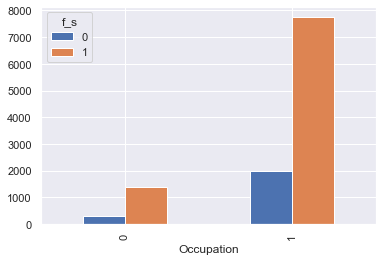

In [377]:
pd.crosstab(Data_Real.Occupation,Data_Real.f_s).plot(kind='bar')

In [378]:
Data_Real.describe(include='all')

,f_s,Food_security,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp,combined_amount
count,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.00000,11427.000000,11427.000000,11427.000000,11427.000000
mean,0.800035,51.399886,0.040781,0.851755,4.415245,0.182900,0.308480,0.061521,0.079636,0.517721,0.876083,0.10694,0.054082,0.173624,0.362037,649.598757
std,0.399991,19.814768,0.197790,0.355359,2.090602,0.386602,0.461886,0.240294,0.270741,0.499708,0.329501,0.30905,0.226190,0.378802,0.480611,5812.744886
min,0.000000,7.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,37.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,48.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,62.500000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,400.000000
max,1.000000,126.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,350000.000000


In [379]:
Data_Real

,f_s,Food_security,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp,combined_amount
0,1,36.0,0,1,4,0,1,0,0,0,1,0,0,0,1,500.0
1,1,50.5,0,1,4,0,1,0,0,0,1,1,0,0,0,0.0
2,1,39.0,0,1,4,0,0,0,0,1,1,0,0,0,0,0.0
3,1,62.0,1,1,5,0,1,0,1,1,1,0,0,0,0,0.0
4,1,35.5,0,1,5,0,1,0,0,1,1,0,0,0,1,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,1,6,1,0,0,0,0,1,0,0,0,1,6000.0
11423,1,100.0,0,1,5,1,1,0,0,0,1,0,0,1,0,0.0
11424,1,49.0,0,1,1,1,1,0,0,0,1,0,0,0,1,600.0
11425,1,104.0,0,1,2,1,0,1,0,1,1,0,0,1,0,0.0


In [380]:
Data_Real.to_csv('Thesis_Data_cleaned')

In [381]:
food_secured = Data_Real[Data_Real['f_s'] == 1]

In [383]:
food_secured

,f_s,Food_security,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp,combined_amount
0,1,36.0,0,1,4,0,1,0,0,0,1,0,0,0,1,500.0
1,1,50.5,0,1,4,0,1,0,0,0,1,1,0,0,0,0.0
2,1,39.0,0,1,4,0,0,0,0,1,1,0,0,0,0,0.0
3,1,62.0,1,1,5,0,1,0,1,1,1,0,0,0,0,0.0
4,1,35.5,0,1,5,0,1,0,0,1,1,0,0,0,1,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,1,6,1,0,0,0,0,1,0,0,0,1,6000.0
11423,1,100.0,0,1,5,1,1,0,0,0,1,0,0,1,0,0.0
11424,1,49.0,0,1,1,1,1,0,0,0,1,0,0,0,1,600.0
11425,1,104.0,0,1,2,1,0,1,0,1,1,0,0,1,0,0.0


In [384]:
food_secured.describe(include='all')

,f_s,Food_security,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp,combined_amount
count,9142.0,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.00000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000
mean,1.0,57.237913,0.040582,0.848173,4.428790,0.214942,0.30606,0.059724,0.086196,0.517502,0.878364,0.106760,0.051958,0.175454,0.356924,609.702472
std,0.0,17.715396,0.197330,0.358872,2.105809,0.410805,0.46088,0.236988,0.280668,0.499721,0.326883,0.308825,0.221954,0.380376,0.479118,5058.876202
min,1.0,35.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,43.500000,0.000000,1.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,53.000000,0.000000,1.000000,4.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,66.500000,0.000000,1.000000,6.000000,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,360.000000
max,1.0,126.000000,1.000000,1.000000,22.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300000.000000


In [385]:
not_food_secured =  Data_Real[Data_Real['f_s'] == 0]

In [386]:
not_food_secured

,f_s,Food_security,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp,combined_amount
10,0,23.0,0,1,3,0,0,0,0,1,1,0,0,1,1,1600.0
16,0,32.0,0,1,7,0,0,0,0,1,1,0,0,0,0,0.0
17,0,34.5,0,1,5,0,0,0,0,0,1,0,0,0,1,30.0
52,0,32.5,0,1,4,0,0,0,0,1,1,0,0,0,0,0.0
85,0,34.5,0,1,4,0,0,0,0,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11296,0,29.0,0,1,8,1,1,0,0,0,1,1,0,0,1,350.0
11317,0,21.0,0,1,3,1,0,0,0,0,1,0,0,0,1,550.0
11318,0,22.5,0,1,6,1,0,0,0,0,1,0,1,1,0,0.0
11355,0,32.0,0,1,3,1,0,0,0,0,1,1,0,0,0,0.0


In [387]:
not_food_secured.describe(include='all')

,f_s,Food_security,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp,combined_amount
count,2285.0,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000
mean,0.0,28.042670,0.041575,0.866083,4.361050,0.054705,0.318162,0.068709,0.053392,0.518600,0.866958,0.107659,0.062582,0.166302,0.382495,809.218818
std,0.0,5.090215,0.199661,0.340638,2.028166,0.227453,0.465865,0.253014,0.224862,0.499763,0.339694,0.310017,0.242263,0.372433,0.486103,8159.165161
min,0.0,7.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,25.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,29.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,32.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,450.000000
max,0.0,34.500000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,350000.000000


In [388]:
pd.crosstab(Data_Real.Occupation,Data_Real.social_nets)

social_nets,0,1
Occupation,,
0,1631,63
1,9330,403


In [389]:
pd.crosstab(Data_Real.Business_Ownership,Data_Real.social_nets)

social_nets,0,1
Business_Ownership,,
0,10083,434
1,878,32


In [390]:
pd.crosstab(Data_Real.Business_Ownership,Data_Real.f_s)

f_s,0,1
Business_Ownership,,
0,2163,8354
1,122,788


In [391]:
pd.crosstab(Data_Real.other_incomes,Data_Real.social_nets)

social_nets,0,1
other_incomes,,
0,10361,448
1,600,18


In [392]:
pd.crosstab(Data_Real.other_incomes,Data_Real.f_s)

f_s,0,1
other_incomes,,
0,2142,8667
1,143,475


In [393]:
pd.crosstab(Data_Real.shocks,Data_Real.f_s)

f_s,0,1
shocks,,
0,1905,7538
1,380,1604


In [394]:
pd.crosstab(Data_Real.shocks,Data_Real.social_nets)

social_nets,0,1
shocks,,
0,9052,391
1,1909,75


In [395]:
Data_Real

,f_s,Food_security,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp,combined_amount
0,1,36.0,0,1,4,0,1,0,0,0,1,0,0,0,1,500.0
1,1,50.5,0,1,4,0,1,0,0,0,1,1,0,0,0,0.0
2,1,39.0,0,1,4,0,0,0,0,1,1,0,0,0,0,0.0
3,1,62.0,1,1,5,0,1,0,1,1,1,0,0,0,0,0.0
4,1,35.5,0,1,5,0,1,0,0,1,1,0,0,0,1,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,1,6,1,0,0,0,0,1,0,0,0,1,6000.0
11423,1,100.0,0,1,5,1,1,0,0,0,1,0,0,1,0,0.0
11424,1,49.0,0,1,1,1,1,0,0,0,1,0,0,0,1,600.0
11425,1,104.0,0,1,2,1,0,1,0,1,1,0,0,1,0,0.0


In [396]:
Data4reg = Data_Real.drop(['Food_security' ,'non_food_exp'],axis=1)

In [397]:
Data4reg

,f_s,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount
0,1,0,1,4,0,1,0,0,0,1,0,0,0,500.0
1,1,0,1,4,0,1,0,0,0,1,1,0,0,0.0
2,1,0,1,4,0,0,0,0,1,1,0,0,0,0.0
3,1,1,1,5,0,1,0,1,1,1,0,0,0,0.0
4,1,0,1,5,0,1,0,0,1,1,0,0,0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,0,1,6,1,0,0,0,0,1,0,0,0,6000.0
11423,1,0,1,5,1,1,0,0,0,1,0,0,1,0.0
11424,1,0,1,1,1,1,0,0,0,1,0,0,0,600.0
11425,1,0,1,2,1,0,1,0,1,1,0,0,1,0.0


In [398]:
Data4reg.iloc[:,:1]

,f_s
0,1
1,1
2,1
3,1
4,1
...,...
11422,1
11423,1
11424,1
11425,1


In [399]:
loctargets = Data4reg.iloc[:,:1]

In [400]:
np.ravel(loctargets)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [401]:
targets = np.ravel(loctargets)

In [402]:
targets

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [403]:
print(type(targets))

<class 'numpy.ndarray'>


In [404]:
targets

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [405]:
Data4reg.iloc[:,1:14]

,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount
0,0,1,4,0,1,0,0,0,1,0,0,0,500.0
1,0,1,4,0,1,0,0,0,1,1,0,0,0.0
2,0,1,4,0,0,0,0,1,1,0,0,0,0.0
3,1,1,5,0,1,0,1,1,1,0,0,0,0.0
4,0,1,5,0,1,0,0,1,1,0,0,0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,0,1,6,1,0,0,0,0,1,0,0,0,6000.0
11423,0,1,5,1,1,0,0,0,1,0,0,1,0.0
11424,0,1,1,1,1,0,0,0,1,0,0,0,600.0
11425,0,1,2,1,0,1,0,1,1,0,0,1,0.0


In [406]:
unscaled_inputs = Data4reg.iloc[:,1:14]

In [407]:
from sklearn.preprocessing import StandardScaler
food_security_scaler = StandardScaler()

In [408]:
All_inputs = unscaled_inputs

In [409]:
All_inputs

,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount
0,0,1,4,0,1,0,0,0,1,0,0,0,500.0
1,0,1,4,0,1,0,0,0,1,1,0,0,0.0
2,0,1,4,0,0,0,0,1,1,0,0,0,0.0
3,1,1,5,0,1,0,1,1,1,0,0,0,0.0
4,0,1,5,0,1,0,0,1,1,0,0,0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,0,1,6,1,0,0,0,0,1,0,0,0,6000.0
11423,0,1,5,1,1,0,0,0,1,0,0,1,0.0
11424,0,1,1,1,1,0,0,0,1,0,0,0,600.0
11425,0,1,2,1,0,1,0,1,1,0,0,1,0.0


In [410]:
inputs_to_scale = unscaled_inputs.loc[:, ['hhsize']]

In [411]:
inputs_to_scale

,hhsize
0,4
1,4
2,4
3,5
4,5
...,...
11422,6
11423,5
11424,1
11425,2


In [412]:
food_security_scaler.fit(inputs_to_scale)

StandardScaler()

In [413]:
scaled_inputs_hhsize = food_security_scaler.transform(inputs_to_scale)

In [414]:
scaled_inputs_hhsize

array([[-0.19863311],
       [-0.19863311],
       [-0.19863311],
       ...,
       [-1.6336893 ],
       [-1.15533724],
       [ 0.75807102]])

In [415]:
All_inputs['Scaled_hhsize'] = scaled_inputs_hhsize

In [416]:
All_inputs

,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount,Scaled_hhsize
0,0,1,4,0,1,0,0,0,1,0,0,0,500.0,-0.198633
1,0,1,4,0,1,0,0,0,1,1,0,0,0.0,-0.198633
2,0,1,4,0,0,0,0,1,1,0,0,0,0.0,-0.198633
3,1,1,5,0,1,0,1,1,1,0,0,0,0.0,0.279719
4,0,1,5,0,1,0,0,1,1,0,0,0,1000.0,0.279719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,0,1,6,1,0,0,0,0,1,0,0,0,6000.0,0.758071
11423,0,1,5,1,1,0,0,0,1,0,0,1,0.0,0.279719
11424,0,1,1,1,1,0,0,0,1,0,0,0,600.0,-1.633689
11425,0,1,2,1,0,1,0,1,1,0,0,1,0.0,-1.155337


In [417]:
inputs_to_scale = unscaled_inputs.loc[:, ['combined_amount']]
inputs_to_scale
food_security_scaler.fit(inputs_to_scale)
scaled_inputs_combined_amount = food_security_scaler.transform(inputs_to_scale)
scaled_inputs_combined_amount
All_inputs['Scaled_combined_amount'] = scaled_inputs_combined_amount
All_inputs

,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount,Scaled_hhsize,Scaled_combined_amount
0,0,1,4,0,1,0,0,0,1,0,0,0,500.0,-0.198633,-0.025737
1,0,1,4,0,1,0,0,0,1,1,0,0,0.0,-0.198633,-0.111759
2,0,1,4,0,0,0,0,1,1,0,0,0,0.0,-0.198633,-0.111759
3,1,1,5,0,1,0,1,1,1,0,0,0,0.0,0.279719,-0.111759
4,0,1,5,0,1,0,0,1,1,0,0,0,1000.0,0.279719,0.060284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,0,1,6,1,0,0,0,0,1,0,0,0,6000.0,0.758071,0.920501
11423,0,1,5,1,1,0,0,0,1,0,0,1,0.0,0.279719,-0.111759
11424,0,1,1,1,1,0,0,0,1,0,0,0,600.0,-1.633689,-0.008533
11425,0,1,2,1,0,1,0,1,1,0,0,1,0.0,-1.155337,-0.111759


In [418]:
All_scaled_inputs = All_inputs.drop(['hhsize','combined_amount','Scaled_combined_amount', 'other_incomes', 'Credit', 'Occupation', 'Death', 'Chronic_illness', 'Gender_HH_Head', 'shocks' ],axis=1) 

In [419]:
All_scaled_inputs

,social_nets,reside,Business_Ownership,Education,Scaled_hhsize
0,0,0,0,1,-0.198633
1,0,0,0,1,-0.198633
2,0,0,0,1,-0.198633
3,1,0,1,1,0.279719
4,0,0,0,1,0.279719
...,...,...,...,...,...
11422,0,1,0,1,0.758071
11423,0,1,0,1,0.279719
11424,0,1,0,1,-1.633689
11425,0,1,0,1,-1.155337


In [444]:
from sklearn.model_selection import train_test_split

In [445]:
train_test_split(All_scaled_inputs, targets)

[      social_nets  reside  Business_Ownership  Education  Scaled_hhsize
 9332            0       0                   0          1      -0.198633
 6045            0       1                   0          1      -0.198633
 6299            0       0                   0          1      -0.198633
 4152            0       0                   0          1       2.193127
 4471            0       0                   0          1       0.279719
 ...           ...     ...                 ...        ...            ...
 7161            1       0                   0          1      -1.155337
 3151            0       0                   0          1      -0.676985
 8470            0       0                   0          1      -1.155337
 2040            0       1                   0          1       0.758071
 677             0       0                   0          1       1.236423
 
 [8570 rows x 5 columns],
        social_nets  reside  Business_Ownership  Education  Scaled_hhsize
 8956             0   

In [457]:
x_train, x_test, y_train, y_test = train_test_split(All_scaled_inputs, targets, train_size = 0.8, random_state = 20)

In [458]:
print (x_train.shape, y_train.shape)

(9141, 5) (9141,)


In [459]:
print(x_test.shape, y_test.shape)

(2286, 5) (2286,)


In [460]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [461]:
reg = LogisticRegression()

In [462]:
reg.fit(x_train,y_train)

LogisticRegression()

In [463]:
reg.score(x_train,y_train)

0.7999124822229515

In [464]:
y_train

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [454]:
model_outputs == y_train

array([ True,  True,  True, ...,  True,  True,  True])

In [455]:
np.sum((model_outputs==y_train))

9141

In [456]:
model_outputs.shape[0]

9141

In [465]:
np.sum((model_outputs==y_train)) / model_outputs.shape[0]

1.0

In [466]:
reg.intercept_

array([0.98589212])

In [467]:
reg.coef_

array([[0.06490763, 1.52003923, 0.45592578, 0.20652043, 0.05336758]])

In [468]:
All_scaled_inputs.columns.values

array(['social_nets', 'reside', 'Business_Ownership', 'Education',
       'Scaled_hhsize'], dtype=object)

In [469]:
feature_name = All_scaled_inputs.columns.values

In [470]:
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table

,Feature name,Coefficient
0,social_nets,0.064908
1,reside,1.520039
2,Business_Ownership,0.455926
3,Education,0.206520
4,Scaled_hhsize,0.053368


In [2011]:
####p-values

In [471]:
from sklearn.feature_selection import f_regression

In [472]:
f_regression(x_train,y_train)

(array([7.17801527e-02, 2.60452938e+02, 2.74313805e+01, 2.73210182e+00,
        1.61343911e+00]),
 array([7.88768344e-01, 8.56625737e-58, 1.66392490e-07, 9.83841244e-02,
        2.04041380e-01]))

In [473]:
p_values = f_regression(x_train,y_train)[1]
p_values

array([7.88768344e-01, 8.56625737e-58, 1.66392490e-07, 9.83841244e-02,
       2.04041380e-01])

In [474]:
p_values.round(3)

array([0.789, 0.   , 0.   , 0.098, 0.204])

In [475]:
summary_table['p-values'] = p_values.round(3)

In [476]:
summary_table

,Feature name,Coefficient,p-values
0,social_nets,0.064908,0.789
1,reside,1.520039,0.000
2,Business_Ownership,0.455926,0.000
3,Education,0.206520,0.098
4,Scaled_hhsize,0.053368,0.204


In [477]:
#summary_table.index = summary_table.index + 1
#summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
#summary_table = summary_table.sort_index()
#summary_table

In [478]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [479]:
summary_table

,Feature name,Coefficient,p-values,Odds_ratio
0,social_nets,0.064908,0.789,1.067060
1,reside,1.520039,0.000,4.572405
2,Business_Ownership,0.455926,0.000,1.577633
3,Education,0.206520,0.098,1.229393
4,Scaled_hhsize,0.053368,0.204,1.054817


In [480]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,p-values,Odds_ratio
1,reside,1.520039,0.000,4.572405
2,Business_Ownership,0.455926,0.000,1.577633
3,Education,0.206520,0.098,1.229393
0,social_nets,0.064908,0.789,1.067060
4,Scaled_hhsize,0.053368,0.204,1.054817


In [481]:
####test data

In [482]:
reg.score(x_test,y_test)

0.800524934383202

In [483]:
predicted_proba = reg.predict_proba(x_test)
predicted_proba

array([[0.07800245, 0.92199755],
       [0.22124988, 0.77875012],
       [0.22124988, 0.77875012],
       ...,
       [0.28931647, 0.71068353],
       [0.24876189, 0.75123811],
       [0.28409586, 0.71590414]])

In [484]:
predicted_proba.shape

(2286, 2)

In [485]:
predicted_proba[:,1]

array([0.92199755, 0.77875012, 0.77875012, ..., 0.71068353, 0.75123811,
       0.71590414])

In [487]:
###logistic results for rural and urban residing households 

In [606]:
Data4reg

,f_s,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount
0,1,0,1,4,0,1,0,0,0,1,0,0,0,500.0
1,1,0,1,4,0,1,0,0,0,1,1,0,0,0.0
2,1,0,1,4,0,0,0,0,1,1,0,0,0,0.0
3,1,1,1,5,0,1,0,1,1,1,0,0,0,0.0
4,1,0,1,5,0,1,0,0,1,1,0,0,0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,0,1,6,1,0,0,0,0,1,0,0,0,6000.0
11423,1,0,1,5,1,1,0,0,0,1,0,0,1,0.0
11424,1,0,1,1,1,1,0,0,0,1,0,0,0,600.0
11425,1,0,1,2,1,0,1,0,1,1,0,0,1,0.0


In [607]:
Urban_households = Data4reg[Data4reg['reside'] == 1]

In [608]:
Urban_households

,f_s,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount
352,1,0,1,3,1,0,0,0,1,1,1,0,0,450.0
353,1,0,1,8,1,0,0,0,0,1,0,0,0,0.0
354,1,1,1,5,1,0,0,0,1,1,0,0,0,3500.0
355,1,0,1,7,1,1,0,1,1,1,0,0,0,700.0
356,1,0,1,2,1,1,0,0,1,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,0,1,6,1,0,0,0,0,1,0,0,0,6000.0
11423,1,0,1,5,1,1,0,0,0,1,0,0,1,0.0
11424,1,0,1,1,1,1,0,0,0,1,0,0,0,600.0
11425,1,0,1,2,1,0,1,0,1,1,0,0,1,0.0


In [609]:
Rural_households = Data4reg[Data4reg['reside']==0]

In [610]:
Rural_households

,f_s,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount
0,1,0,1,4,0,1,0,0,0,1,0,0,0,500.0
1,1,0,1,4,0,1,0,0,0,1,1,0,0,0.0
2,1,0,1,4,0,0,0,0,1,1,0,0,0,0.0
3,1,1,1,5,0,1,0,1,1,1,0,0,0,0.0
4,1,0,1,5,0,1,0,0,1,1,0,0,0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10738,1,0,0,3,0,1,0,0,0,1,0,0,0,0.0
10739,1,0,1,4,0,0,1,0,1,1,0,0,0,0.0
10740,1,1,0,6,0,1,0,0,0,0,0,0,0,0.0
10741,0,0,1,6,0,1,0,0,1,1,1,0,1,0.0


In [640]:
#####Logistic regression for urban household

In [641]:
U_target = Urban_households.iloc[:,:1]

In [642]:
U_target

,f_s
352,1
353,1
354,1
355,1
356,1
...,...
11422,1
11423,1
11424,1
11425,1


In [643]:
Urban_target = np.ravel(U_target)


In [644]:
print(type(Urban_target))

<class 'numpy.ndarray'>


In [645]:
unscaled_urban_inputs = Urban_households.iloc[:,1:14]

In [646]:
Urban_inputs_to_scale = unscaled_urban_inputs.loc[:, ['hhsize']]
Urban_inputs_to_scale
All_Urban_inputs = unscaled_urban_inputs
food_security_scaler.fit(Urban_inputs_to_scale)
scaled_inputs_hhsize = food_security_scaler.transform(Urban_inputs_to_scale)
All_Urban_inputs['Scaled_hhsize'] = scaled_inputs_hhsize
All_Urban_inputs




,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount,Scaled_hhsize
352,0,1,3,1,0,0,0,1,1,1,0,0,450.0,-0.570440
353,0,1,8,1,0,0,0,0,1,0,0,0,0.0,1.799778
354,1,1,5,1,0,0,0,1,1,0,0,0,3500.0,0.377647
355,0,1,7,1,1,0,1,1,1,0,0,0,700.0,1.325734
356,0,1,2,1,1,0,0,1,1,0,0,1,0.0,-1.044483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,0,1,6,1,0,0,0,0,1,0,0,0,6000.0,0.851691
11423,0,1,5,1,1,0,0,0,1,0,0,1,0.0,0.377647
11424,0,1,1,1,1,0,0,0,1,0,0,0,600.0,-1.518527
11425,0,1,2,1,0,1,0,1,1,0,0,1,0.0,-1.044483


In [647]:
Urban_inputs_to_scale = unscaled_urban_inputs.loc[:, ['combined_amount']]
Urban_inputs_to_scale
All_Urban_inputs = unscaled_urban_inputs
food_security_scaler.fit(Urban_inputs_to_scale)
scaled_inputs_combined_amount = food_security_scaler.transform(Urban_inputs_to_scale)
All_Urban_inputs['Scaled_combined_amount'] = scaled_inputs_hhsize
All_Urban_inputs

,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount,Scaled_hhsize,Scaled_combined_amount
352,0,1,3,1,0,0,0,1,1,1,0,0,450.0,-0.570440,-0.570440
353,0,1,8,1,0,0,0,0,1,0,0,0,0.0,1.799778,1.799778
354,1,1,5,1,0,0,0,1,1,0,0,0,3500.0,0.377647,0.377647
355,0,1,7,1,1,0,1,1,1,0,0,0,700.0,1.325734,1.325734
356,0,1,2,1,1,0,0,1,1,0,0,1,0.0,-1.044483,-1.044483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,0,1,6,1,0,0,0,0,1,0,0,0,6000.0,0.851691,0.851691
11423,0,1,5,1,1,0,0,0,1,0,0,1,0.0,0.377647,0.377647
11424,0,1,1,1,1,0,0,0,1,0,0,0,600.0,-1.518527,-1.518527
11425,0,1,2,1,0,1,0,1,1,0,0,1,0.0,-1.044483,-1.044483


In [648]:
All_scaled_Urban_inputs = All_Urban_inputs.drop(['hhsize','combined_amount','reside'],axis=1) 

In [649]:
All_scaled_Urban_inputs

,social_nets,Occupation,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,Scaled_hhsize,Scaled_combined_amount
352,0,1,0,0,0,1,1,1,0,0,-0.570440,-0.570440
353,0,1,0,0,0,0,1,0,0,0,1.799778,1.799778
354,1,1,0,0,0,1,1,0,0,0,0.377647,0.377647
355,0,1,1,0,1,1,1,0,0,0,1.325734,1.325734
356,0,1,1,0,0,1,1,0,0,1,-1.044483,-1.044483
...,...,...,...,...,...,...,...,...,...,...,...,...
11422,0,1,0,0,0,0,1,0,0,0,0.851691,0.851691
11423,0,1,1,0,0,0,1,0,0,1,0.377647,0.377647
11424,0,1,1,0,0,0,1,0,0,0,-1.518527,-1.518527
11425,0,1,0,1,0,1,1,0,0,1,-1.044483,-1.044483


In [650]:
Urban_target

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [651]:
train_test_split(All_scaled_Urban_inputs, Urban_target)

[       social_nets  Occupation  Credit  Death  Business_Ownership  \
 10791            0           0       1      0                   0   
 709              0           1       0      0                   0   
 6084             0           1       0      0                   1   
 11040            0           1       0      0                   0   
 1866             0           1       0      0                   0   
 ...            ...         ...     ...    ...                 ...   
 5589             0           1       1      0                   0   
 11273            0           1       0      0                   1   
 5931             0           1       0      0                   0   
 371              0           1       1      0                   0   
 5741             0           1       0      0                   1   
 
        Gender_HH_Head  Education  Chronic_illness  other_incomes  shocks  \
 10791               1          1                0              0       0   
 709

In [652]:
x_train, x_test, y_train, y_test = train_test_split(All_scaled_Urban_inputs, Urban_target, train_size = 0.8, random_state = 20)

In [653]:
print (x_train.shape, y_train.shape)

(1672, 12) (1672,)


In [654]:
print(x_test.shape, y_test.shape)

(418, 12) (418,)


In [655]:
reg = LogisticRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.9395933014354066

In [656]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [657]:
reg.intercept_

array([2.68903589])

In [658]:
reg.coef_

array([[ 0.22049148,  0.14882658, -0.31784764,  0.25080335,  0.2429811 ,
         0.06064757, -0.08245982, -0.37055273, -0.15722104,  0.63872344,
        -0.01170307, -0.01170307]])

In [659]:
All_scaled_Urban_inputs.columns.values

array(['social_nets', 'Occupation', 'Credit', 'Death',
       'Business_Ownership', 'Gender_HH_Head', 'Education',
       'Chronic_illness', 'other_incomes', 'shocks', 'Scaled_hhsize',
       'Scaled_combined_amount'], dtype=object)

In [660]:
feature_name = All_scaled_Urban_inputs.columns.values

In [670]:
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table

,Feature name,Coefficient
0,social_nets,0.220491
1,Occupation,0.148827
2,Credit,-0.317848
3,Death,0.250803
4,Business_Ownership,0.242981
5,Gender_HH_Head,0.060648
6,Education,-0.082460
7,Chronic_illness,-0.370553
8,other_incomes,-0.157221
9,shocks,0.638723


In [672]:
from sklearn.feature_selection import f_regression

In [673]:
f_regression(x_train,y_train)

(array([0.2417995 , 0.31326341, 2.30431806, 0.33634326, 0.53118542,
        0.11829306, 0.07104625, 1.51366561, 0.18909507, 4.44119436,
        0.06418807, 0.06418807]),
 array([0.62297406, 0.57575956, 0.12920417, 0.56202584, 0.4662111 ,
        0.73093653, 0.78985239, 0.21875387, 0.66372703, 0.03523043,
        0.80002613, 0.80002613]))

In [674]:
p_values = f_regression(x_train,y_train)[1]
p_values

array([0.62297406, 0.57575956, 0.12920417, 0.56202584, 0.4662111 ,
       0.73093653, 0.78985239, 0.21875387, 0.66372703, 0.03523043,
       0.80002613, 0.80002613])

In [675]:
p_values.round(3)

array([0.623, 0.576, 0.129, 0.562, 0.466, 0.731, 0.79 , 0.219, 0.664,
       0.035, 0.8  , 0.8  ])

In [676]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,2.689036
1,Intercept,2.689036
2,social_nets,0.220491
3,Occupation,0.148827
4,Credit,-0.317848
5,Death,0.250803
6,Business_Ownership,0.242981
7,Gender_HH_Head,0.060648
8,Education,-0.082460
9,Chronic_illness,-0.370553


In [677]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [678]:
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,2.689036,14.717480
1,Intercept,2.689036,14.717480
2,social_nets,0.220491,1.246689
3,Occupation,0.148827,1.160472
4,Credit,-0.317848,0.727714
5,Death,0.250803,1.285057
6,Business_Ownership,0.242981,1.275045
7,Gender_HH_Head,0.060648,1.062524
8,Education,-0.082460,0.920848
9,Chronic_illness,-0.370553,0.690353


In [679]:
#logistic regression for Rural households

In [680]:
Data4reg

,f_s,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount
0,1,0,1,4,0,1,0,0,0,1,0,0,0,500.0
1,1,0,1,4,0,1,0,0,0,1,1,0,0,0.0
2,1,0,1,4,0,0,0,0,1,1,0,0,0,0.0
3,1,1,1,5,0,1,0,1,1,1,0,0,0,0.0
4,1,0,1,5,0,1,0,0,1,1,0,0,0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,0,1,6,1,0,0,0,0,1,0,0,0,6000.0
11423,1,0,1,5,1,1,0,0,0,1,0,0,1,0.0
11424,1,0,1,1,1,1,0,0,0,1,0,0,0,600.0
11425,1,0,1,2,1,0,1,0,1,1,0,0,1,0.0


In [682]:
rural_households = Data4reg[Data4reg['reside'] == 0]

In [683]:
rural_households

,f_s,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount
0,1,0,1,4,0,1,0,0,0,1,0,0,0,500.0
1,1,0,1,4,0,1,0,0,0,1,1,0,0,0.0
2,1,0,1,4,0,0,0,0,1,1,0,0,0,0.0
3,1,1,1,5,0,1,0,1,1,1,0,0,0,0.0
4,1,0,1,5,0,1,0,0,1,1,0,0,0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10738,1,0,0,3,0,1,0,0,0,1,0,0,0,0.0
10739,1,0,1,4,0,0,1,0,1,1,0,0,0,0.0
10740,1,1,0,6,0,1,0,0,0,0,0,0,0,0.0
10741,0,0,1,6,0,1,0,0,1,1,1,0,1,0.0


In [684]:
r_target = Urban_households.iloc[:,:1]

In [685]:
r_target

,f_s
0,1
1,1
2,1
3,1
4,1
...,...
10738,1
10739,1
10740,1
10741,0


In [686]:
rural_target = np.ravel(r_target)

In [687]:
print(type(rural_target))

<class 'numpy.ndarray'>


In [688]:
unscaled_rural_inputs = rural_households.iloc[:,1:14]

In [689]:
rural_inputs_to_scale = unscaled_rural_inputs.loc[:, ['hhsize']]
rural_inputs_to_scale
All_rural_inputs = unscaled_rural_inputs
food_security_scaler.fit(rural_inputs_to_scale)
scaled_inputs_hhsize = food_security_scaler.transform(rural_inputs_to_scale)
All_rural_inputs['Scaled_hhsize'] = scaled_inputs_hhsize
All_rural_inputs



,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount,Scaled_hhsize
0,0,1,4,0,1,0,0,0,1,0,0,0,500.0,-0.222089
1,0,1,4,0,1,0,0,0,1,1,0,0,0.0,-0.222089
2,0,1,4,0,0,0,0,1,1,0,0,0,0.0,-0.222089
3,1,1,5,0,1,0,1,1,1,0,0,0,0.0,0.257922
4,0,1,5,0,1,0,0,1,1,0,0,0,1000.0,0.257922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10738,0,0,3,0,1,0,0,0,1,0,0,0,0.0,-0.702101
10739,0,1,4,0,0,1,0,1,1,0,0,0,0.0,-0.222089
10740,1,0,6,0,1,0,0,0,0,0,0,0,0.0,0.737933
10741,0,1,6,0,1,0,0,1,1,1,0,1,0.0,0.737933


In [690]:
rural_inputs_to_scale = unscaled_rural_inputs.loc[:, ['combined_amount']]
rural_inputs_to_scale
All_rural_inputs = unscaled_rural_inputs
food_security_scaler.fit(rural_inputs_to_scale)
scaled_inputs_combined_amount = food_security_scaler.transform(rural_inputs_to_scale)
All_rural_inputs['Scaled_combined_amount'] = scaled_inputs_hhsize
All_rural_inputs

,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount,Scaled_hhsize,Scaled_combined_amount
0,0,1,4,0,1,0,0,0,1,0,0,0,500.0,-0.222089,-0.222089
1,0,1,4,0,1,0,0,0,1,1,0,0,0.0,-0.222089,-0.222089
2,0,1,4,0,0,0,0,1,1,0,0,0,0.0,-0.222089,-0.222089
3,1,1,5,0,1,0,1,1,1,0,0,0,0.0,0.257922,0.257922
4,0,1,5,0,1,0,0,1,1,0,0,0,1000.0,0.257922,0.257922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10738,0,0,3,0,1,0,0,0,1,0,0,0,0.0,-0.702101,-0.702101
10739,0,1,4,0,0,1,0,1,1,0,0,0,0.0,-0.222089,-0.222089
10740,1,0,6,0,1,0,0,0,0,0,0,0,0.0,0.737933,0.737933
10741,0,1,6,0,1,0,0,1,1,1,0,1,0.0,0.737933,0.737933


In [691]:
All_scaled_rural_inputs = All_rural_inputs.drop(['hhsize','combined_amount','reside'],axis=1) 

In [692]:
All_scaled_rural_inputs

,social_nets,Occupation,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,Scaled_hhsize,Scaled_combined_amount
0,0,1,1,0,0,0,1,0,0,0,-0.222089,-0.222089
1,0,1,1,0,0,0,1,1,0,0,-0.222089,-0.222089
2,0,1,0,0,0,1,1,0,0,0,-0.222089,-0.222089
3,1,1,1,0,1,1,1,0,0,0,0.257922,0.257922
4,0,1,1,0,0,1,1,0,0,0,0.257922,0.257922
...,...,...,...,...,...,...,...,...,...,...,...,...
10738,0,0,1,0,0,0,1,0,0,0,-0.702101,-0.702101
10739,0,1,0,1,0,1,1,0,0,0,-0.222089,-0.222089
10740,1,0,1,0,0,0,0,0,0,0,0.737933,0.737933
10741,0,1,1,0,0,1,1,1,0,1,0.737933,0.737933


In [693]:
rural_target

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [694]:
train_test_split(All_scaled_rural_inputs, rural_target)

[      social_nets  Occupation  Credit  Death  Business_Ownership  \
 8752            0           1       0      0                   0   
 820             0           1       0      0                   0   
 3717            0           1       0      0                   0   
 3863            0           1       0      0                   0   
 4833            0           1       0      0                   0   
 ...           ...         ...     ...    ...                 ...   
 3661            0           1       0      0                   0   
 6511            1           1       0      0                   0   
 8971            0           1       0      0                   0   
 8141            0           1       0      0                   0   
 8039            0           1       1      0                   0   
 
       Gender_HH_Head  Education  Chronic_illness  other_incomes  shocks  \
 8752               1          1                0              0       0   
 820              

In [695]:
x_train, x_test, y_train, y_test = train_test_split(All_scaled_rural_inputs, rural_target, train_size = 0.8, random_state = 20)

In [696]:
print (x_train.shape, y_train.shape)

(7469, 12) (7469,)


In [697]:
print(x_test.shape, y_test.shape)

(1868, 12) (1868,)


In [698]:
reg = LogisticRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.7681081804793145

In [699]:
y_train

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [700]:
reg.intercept_

array([1.12569412])

In [701]:
reg.coef_

array([[-0.10136068, -0.10321553, -0.04492549, -0.12980342,  0.33145173,
        -0.01751347,  0.20882612,  0.00223371, -0.17836518,  0.01542381,
         0.02778321,  0.02778321]])

In [702]:
All_scaled_rural_inputs.columns.values

array(['social_nets', 'Occupation', 'Credit', 'Death',
       'Business_Ownership', 'Gender_HH_Head', 'Education',
       'Chronic_illness', 'other_incomes', 'shocks', 'Scaled_hhsize',
       'Scaled_combined_amount'], dtype=object)

In [703]:
feature_name = All_scaled_Urban_inputs.columns.values

In [704]:
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table   

,Feature name,Coefficient
0,social_nets,-0.101361
1,Occupation,-0.103216
2,Credit,-0.044925
3,Death,-0.129803
4,Business_Ownership,0.331452
5,Gender_HH_Head,-0.017513
6,Education,0.208826
7,Chronic_illness,0.002234
8,other_incomes,-0.178365
9,shocks,0.015424


In [705]:
from sklearn.feature_selection import f_regression

In [706]:
f_regression(x_train,y_train)

(array([6.82074783e-01, 2.22096322e+00, 6.82518259e-01, 1.14874488e+00,
        8.33684415e+00, 4.30558005e-04, 6.59195343e+00, 2.28332152e-02,
        2.14025283e+00, 1.36573207e-02, 4.43633503e+00, 4.43633503e+00]),
 array([0.40889958, 0.13619033, 0.40874731, 0.28384668, 0.00389606,
        0.98344572, 0.01026336, 0.87989568, 0.14352033, 0.90697054,
        0.03521498, 0.03521498]))

In [707]:
p_values = f_regression(x_train,y_train)[1]
p_values

array([0.40889958, 0.13619033, 0.40874731, 0.28384668, 0.00389606,
       0.98344572, 0.01026336, 0.87989568, 0.14352033, 0.90697054,
       0.03521498, 0.03521498])

In [708]:
p_values.round(3)

array([0.409, 0.136, 0.409, 0.284, 0.004, 0.983, 0.01 , 0.88 , 0.144,
       0.907, 0.035, 0.035])

In [709]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,1.125694
1,social_nets,-0.101361
2,Occupation,-0.103216
3,Credit,-0.044925
4,Death,-0.129803
5,Business_Ownership,0.331452
6,Gender_HH_Head,-0.017513
7,Education,0.208826
8,Chronic_illness,0.002234
9,other_incomes,-0.178365


In [520]:
#test Urban data

In [521]:
reg.score(x_test,y_test)

0.9425837320574163

In [522]:
#Robustness analysis with OLS

In [523]:
Data_Real

,f_s,Food_security,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,non_food_exp,combined_amount
0,1,36.0,0,1,4,0,1,0,0,0,1,0,0,0,1,500.0
1,1,50.5,0,1,4,0,1,0,0,0,1,1,0,0,0,0.0
2,1,39.0,0,1,4,0,0,0,0,1,1,0,0,0,0,0.0
3,1,62.0,1,1,5,0,1,0,1,1,1,0,0,0,0,0.0
4,1,35.5,0,1,5,0,1,0,0,1,1,0,0,0,1,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,1,66.5,0,1,6,1,0,0,0,0,1,0,0,0,1,6000.0
11423,1,100.0,0,1,5,1,1,0,0,0,1,0,0,1,0,0.0
11424,1,49.0,0,1,1,1,1,0,0,0,1,0,0,0,1,600.0
11425,1,104.0,0,1,2,1,0,1,0,1,1,0,0,1,0,0.0


In [524]:
Data4regols = Data_Real.drop(['f_s' ,'non_food_exp'],axis=1)

In [525]:
Data4regols

,Food_security,social_nets,Occupation,hhsize,reside,Credit,Death,Business_Ownership,Gender_HH_Head,Education,Chronic_illness,other_incomes,shocks,combined_amount
0,36.0,0,1,4,0,1,0,0,0,1,0,0,0,500.0
1,50.5,0,1,4,0,1,0,0,0,1,1,0,0,0.0
2,39.0,0,1,4,0,0,0,0,1,1,0,0,0,0.0
3,62.0,1,1,5,0,1,0,1,1,1,0,0,0,0.0
4,35.5,0,1,5,0,1,0,0,1,1,0,0,0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,66.5,0,1,6,1,0,0,0,0,1,0,0,0,6000.0
11423,100.0,0,1,5,1,1,0,0,0,1,0,0,1,0.0
11424,49.0,0,1,1,1,1,0,0,0,1,0,0,0,600.0
11425,104.0,0,1,2,1,0,1,0,1,1,0,0,1,0.0


In [526]:
All_scaled_inputs

,social_nets,reside,Business_Ownership,Education,Scaled_hhsize
0,0,0,0,1,-0.198633
1,0,0,0,1,-0.198633
2,0,0,0,1,-0.198633
3,1,0,1,1,0.279719
4,0,0,0,1,0.279719
...,...,...,...,...,...
11422,0,1,0,1,0.758071
11423,0,1,0,1,0.279719
11424,0,1,0,1,-1.633689
11425,0,1,0,1,-1.155337


In [527]:
###with trained data

In [528]:
Data4regols.iloc[:,:1]

,Food_security
0,36.0
1,50.5
2,39.0
3,62.0
4,35.5
...,...
11422,66.5
11423,100.0
11424,49.0
11425,104.0


In [529]:
olstargets = Data4regols.iloc[:,:1]

In [530]:
np.ravel(olstargets)

array([ 36. ,  50.5,  39. , ...,  49. , 104. ,  43. ])

In [531]:
targets = np.ravel(olstargets)

In [532]:
targets

array([ 36. ,  50.5,  39. , ...,  49. , 104. ,  43. ])

In [533]:
train_test_split(All_scaled_inputs, targets)

[       social_nets  reside  Business_Ownership  Education  Scaled_hhsize
 22               0       0                   1          1      -0.676985
 6458             0       0                   0          1      -0.676985
 9079             0       0                   0          1      -0.676985
 9092             0       0                   0          1      -0.676985
 4647             0       0                   0          0      -1.155337
 ...            ...     ...                 ...        ...            ...
 6030             0       1                   0          1       0.279719
 10013            0       0                   0          1      -0.676985
 10869            0       1                   0          0      -0.676985
 4175             0       0                   0          1       0.279719
 1142             0       0                   0          1       4.584888
 
 [8570 rows x 5 columns],
        social_nets  reside  Business_Ownership  Education  Scaled_hhsize
 6098     

In [534]:
x_train, x_test, y_train, y_test = train_test_split(All_scaled_inputs, targets, train_size = 0.8, random_state = 20)

In [535]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [536]:
reg.coef_

array([ 0.29603053, 17.51490358,  4.4469203 ,  1.69730847,  0.72317992])

In [537]:
reg.intercept_

46.42201504519874

In [538]:
reg.score(x_train,y_train)

0.1237949461320319

In [539]:
f_regression(x_train,y_train)

(array([1.86825870e-02, 1.22292601e+03, 7.88345428e+01, 7.63509959e-01,
        4.12405749e+00]),
 array([8.91283382e-001, 1.43333078e-251, 8.03157820e-019, 3.82255277e-001,
        4.23064552e-002]))

In [540]:
p_values = f_regression(x_train,y_train)[1]
p_values

array([8.91283382e-001, 1.43333078e-251, 8.03157820e-019, 3.82255277e-001,
       4.23064552e-002])

In [541]:
p_values.round(3)

array([0.891, 0.   , 0.   , 0.382, 0.042])

In [542]:
reg_summary = pd.DataFrame(data= x_train.columns.values, columns=['Features']) 
reg_summary

,Features
0,social_nets
1,reside
2,Business_Ownership
3,Education
4,Scaled_hhsize


In [543]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,social_nets,0.296031,0.891
1,reside,17.514904,0.000
2,Business_Ownership,4.446920,0.000
3,Education,1.697308,0.382
4,Scaled_hhsize,0.723180,0.042


In [544]:
x = Data4regols[['social_nets','hhsize','reside','Business_Ownership','Education',]]
y = Data4regols['Food_security']

In [545]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [546]:
reg.coef_

array([ 0.61828499,  0.34141171, 17.43263097,  3.72395038,  1.67181607])

In [547]:
reg.intercept_

44.91761528044508

In [548]:
reg.score(x,y)

0.12152659590064752

In [549]:
f_regression(x,y)

(array([1.55402883e-01, 5.19588387e+00, 1.51064828e+03, 7.83763569e+01,
        1.36624887e+00]),
 array([6.93432089e-001, 2.26587931e-002, 1.78869195e-310, 9.76899995e-019,
        2.42481813e-001]))

In [550]:
p_values = f_regression(x,y)[1]
p_values

array([6.93432089e-001, 2.26587931e-002, 1.78869195e-310, 9.76899995e-019,
       2.42481813e-001])

In [551]:
p_values.round(3)

array([0.693, 0.023, 0.   , 0.   , 0.242])

In [552]:
reg_summary = pd.DataFrame(data= x.columns.values, columns=['Features']) 
reg_summary

,Features
0,social_nets
1,hhsize
2,reside
3,Business_Ownership
4,Education


In [553]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,social_nets,0.618285,0.693
1,hhsize,0.341412,0.023
2,reside,17.432631,0.000
3,Business_Ownership,3.723950,0.000
4,Education,1.671816,0.242
